In [303]:
import torch
import numpy as np

pt_file = torch.load("data/cifar10/partition_1000/client_0/train.pt")

In [304]:
pt_file.dataset.indices

array([40662, 39690,  1986, 20538, 42894, 14014, 47978, 14791, 27741,
       13737,   366,   444, 34500, 33878,  5336, 25125, 27939, 44587,
        4753, 30882,  3623, 35919, 46463,  9324, 21387, 32643, 15362,
       44888, 28065, 15488, 12794, 38526, 21536, 47410, 42333, 32393,
        8200, 22360, 18422, 16991,  3862,  9766, 31319,  7087, 41618,
       37456, 47385, 42109, 41537,  6965, 25986, 24542, 15518, 11786,
       15344, 25383, 49315, 17975, 22311, 12012, 11872, 45219,  4922,
       28139, 34276, 10016, 44237, 28772, 39881, 14423, 46523, 33243,
       47044,  3301,  7563, 42596, 15302, 37958,  3208, 28526, 12908,
       33462, 34267, 32059,   339, 45745,  3638, 12049,  6506, 15103,
       33531, 48888, 25786,  1067, 36750, 42238, 26132, 12201, 32203,
         610, 27651, 47279, 10606, 18802,  2422, 24387, 34899, 41974,
       13973, 38181, 47697, 46741, 32092,  9834, 36955, 19090, 14622,
       28524,  2995,  5266,  7877, 28969, 21315, 10788, 32874, 29464,
       10698, 47066,

In [305]:
np.array(pt_file.dataset.dataset.targets)[pt_file.dataset.indices]

array([5, 4, 5, 2, 2, 3, 8, 5, 6, 7, 7, 9, 0, 5, 7, 2, 4, 4, 4, 8, 7, 3,
       1, 8, 0, 4, 5, 8, 9, 5, 7, 4, 3, 3, 8, 5, 0, 4, 3, 8, 4, 1, 1, 1,
       4, 0, 4, 4, 6, 5, 3, 9, 1, 9, 7, 4, 5, 9, 9, 5, 4, 5, 5, 6, 8, 8,
       5, 3, 2, 2, 0, 0, 3, 2, 4, 7, 9, 5, 7, 1, 5, 2, 4, 2, 5, 7, 8, 1,
       6, 5, 2, 6, 0, 2, 0, 7, 3, 8, 8, 8, 6, 1, 8, 7, 1, 0, 7, 7, 1, 6,
       9, 1, 8, 7, 0, 8, 6, 7, 4, 0, 2, 7, 3, 3, 0, 3, 9, 9, 5, 6, 5, 3,
       1, 9, 3, 6, 4, 7, 5, 1, 6, 8, 3, 7, 6, 3, 5, 3, 5, 8, 3, 4, 9, 2,
       2, 0, 2, 5, 4, 6, 3, 2, 9, 0, 6, 7, 8, 5, 7, 3, 9, 7, 2, 4, 7, 8,
       4, 9, 0, 5, 6, 0, 5, 5, 7, 8, 4, 1, 2, 8, 3, 1, 9, 9, 1, 4, 0, 8,
       7, 5, 8, 3, 7, 1, 2, 5, 5, 5, 7, 5, 7, 1, 7, 1, 5, 4, 1, 9, 9, 1,
       1, 6, 8, 8, 1, 1, 0, 9, 4, 2, 9, 6, 0, 4, 9, 9, 3, 1, 8, 1, 4, 4,
       8, 3, 4, 9, 3, 0, 4, 8, 6, 2, 0, 7, 3, 3, 9, 2, 3, 7, 8, 4, 2, 2,
       2, 6, 7, 1, 6, 6, 6, 4, 2, 9, 3, 7, 8, 1, 4, 5, 1, 0, 7, 3, 3, 3,
       6, 0, 1, 1, 9, 8, 3, 1, 3, 2, 1, 0, 9, 6, 2,

In [306]:
with open(
    "outputs/2024-03-27/14-36-54/results/state/parameters/parameters_0.bin", mode="rb"
) as file:  # b is important -> binary
    fileContent = file.read()
fileContent[:200]

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/2024-03-27/14-36-54/results/state/parameters/parameters_0.bin'

In [ ]:
t1 = np.array([[1, 2], [3]])
t2 = np.array([[1, 3], [3]])
t1 - t2

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
from flwr.common import parameters_to_ndarrays

In [ ]:
from torch import nn


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False
        )
        self.bn1 = nn.GroupNorm(32, planes)
        self.conv2 = nn.Conv2d(
            planes, planes, kernel_size=3, stride=1, padding=1, bias=False
        )
        self.bn2 = nn.GroupNorm(32, planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(
                    in_planes,
                    self.expansion * planes,
                    kernel_size=1,
                    stride=stride,
                    bias=False,
                ),
                nn.GroupNorm(32, self.expansion * planes),
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.GroupNorm(32, 64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512 * block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def resnet18(**kwargs):
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    return model

In [ ]:
model = resnet18()

In [ ]:
parameters_to_ndarrays(model)

AttributeError: 'ResNet' object has no attribute 'tensors'

In [ ]:
from numpy import linalg as LA

a = np.array([1, 2, 3, 4, 5])
LA.norm(a, 2)

7.416198487095663

In [ ]:
test = {"t1": 1, "t2": 2, "t3": 3}
test["t1", "t2"]

KeyError: ('t1', 't2')

In [ ]:
temp = {}
temp["t1"] = test["t1"]
temp["t2"] = test["t2"]

In [ ]:
temp

{'t1': 1, 't2': 2}

In [ ]:
with open(
    "outputs/2024-03-30/FedAdam_B0.9_LDA01_run2/results/state/histories/history.json"
) as f:
    test = json.load(f)

In [ ]:
c01_b09_run1["metrics_distributed_fit"]["local_distribution"]

[[1,
  [[447, 2, 0, 0, 0, 0, 1, 0, 0, 0],
   [0, 0, 0, 0, 0, 30, 420, 0, 0, 0],
   [0, 121, 11, 37, 13, 0, 0, 48, 0, 220],
   [127, 0, 22, 301, 0, 0, 0, 0, 0, 0],
   [442, 0, 5, 1, 0, 1, 0, 1, 0, 0],
   [0, 392, 0, 0, 58, 0, 0, 0, 0, 0],
   [0, 419, 0, 2, 10, 15, 1, 0, 0, 3],
   [0, 0, 6, 0, 333, 0, 0, 0, 0, 111],
   [279, 170, 0, 1, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 4, 11, 435, 0, 0, 0, 0]]],
 [2,
  [[0, 4, 0, 0, 5, 0, 441, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 65, 383, 2],
   [2, 1, 0, 0, 3, 97, 0, 0, 121, 226],
   [0, 21, 0, 0, 419, 0, 0, 0, 0, 10],
   [442, 0, 5, 1, 0, 1, 0, 1, 0, 0],
   [11, 0, 20, 0, 3, 2, 399, 15, 0, 0],
   [0, 0, 0, 0, 0, 20, 24, 158, 54, 194],
   [0, 450, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 178, 0, 0, 0, 108, 164, 0, 0],
   [0, 24, 0, 425, 0, 0, 1, 0, 0, 0]]],
 [3,
  [[124, 37, 0, 0, 182, 104, 0, 3, 0, 0],
   [0, 0, 3, 0, 0, 0, 1, 4, 0, 442],
   [2, 1, 0, 0, 3, 97, 0, 0, 121, 226],
   [0, 385, 65, 0, 0, 0, 0, 0, 0, 0],
   [0, 9, 0, 0, 3, 5, 0, 0, 433, 0],
   [0, 0, 

In [ ]:
test["metrics_distributed_fit"]["local_distribution"]

[[1,
  [[227, 0, 0, 0, 0, 221, 0, 0, 2, 0],
   [1, 5, 0, 0, 0, 429, 0, 0, 15, 0],
   [0, 0, 0, 0, 0, 20, 24, 158, 54, 194],
   [9, 0, 426, 5, 0, 8, 0, 2, 0, 0],
   [328, 8, 0, 36, 0, 0, 78, 0, 0, 0],
   [0, 37, 310, 0, 103, 0, 0, 0, 0, 0],
   [3, 1, 0, 7, 8, 423, 7, 0, 0, 1],
   [0, 392, 0, 0, 58, 0, 0, 0, 0, 0],
   [1, 0, 342, 46, 5, 0, 0, 49, 6, 1],
   [0, 0, 308, 0, 0, 0, 7, 0, 0, 135]]],
 [2,
  [[0, 0, 0, 0, 450, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 20, 24, 158, 54, 194],
   [0, 0, 87, 21, 33, 114, 0, 153, 0, 42],
   [0, 24, 0, 425, 0, 0, 1, 0, 0, 0],
   [72, 2, 0, 33, 174, 58, 0, 11, 27, 73],
   [0, 0, 178, 0, 0, 0, 108, 164, 0, 0],
   [66, 3, 9, 0, 0, 0, 22, 34, 316, 0],
   [0, 385, 65, 0, 0, 0, 0, 0, 0, 0],
   [129, 41, 10, 76, 0, 50, 75, 0, 6, 63],
   [0, 0, 0, 41, 0, 0, 146, 241, 2, 20]]],
 [3,
  [[0, 0, 308, 0, 0, 0, 7, 0, 0, 135],
   [0, 4, 0, 0, 5, 0, 441, 0, 0, 0],
   [0, 0, 0, 0, 0, 30, 420, 0, 0, 0],
   [447, 2, 0, 0, 0, 0, 1, 0, 0, 0],
   [72, 2, 0, 33, 174, 58, 0, 11, 27

In [ ]:
import matplotlib.pyplot as plt

In [1179]:
import json

with open(
    "outputs/2024-03-30/FedAdagrad_LDA0.1_run1/results/state/histories/history.json"
) as f:
    ada_c01_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA0.1_run2/results/state/histories/history.json"
) as f:
    ada_c01_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA0.1_run3/results/state/histories/history.json"
) as f:
    ada_c01_run3 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA1_run1/results/state/histories/history.json"
) as f:
    ada_c1_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA1_run2/results/state/histories/history.json"
) as f:
    ada_c1_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA1_run3/results/state/histories/history.json"
) as f:
    ada_c1_run3 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA1000_run1/results/state/histories/history.json"
) as f:
    ada_c1000_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA1000_run2/results/state/histories/history.json"
) as f:
    ada_c1000_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdagrad_LDA1000_run3/results/state/histories/history.json"
) as f:
    ada_c1000_run3 = json.load(f)

with open(
    "outputs/2024-03-30/FedAdam_LDA0.1_run1/results/state/histories/history.json"
) as f:
    adam_c01_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA0.1_run2/results/state/histories/history.json"
) as f:
    adam_c01_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA0.1_run3/results/state/histories/history.json"
) as f:
    adam_c01_run3 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA1_run1/results/state/histories/history.json"
) as f:
    adam_c1_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA1_run2/results/state/histories/history.json"
) as f:
    adam_c1_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA1_run3/results/state/histories/history.json"
) as f:
    adam_c1_run3 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA1000_run1/results/state/histories/history.json"
) as f:
    adam_c1000_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA1000_run2/results/state/histories/history.json"
) as f:
    adam_c1000_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_LDA1000_run3/results/state/histories/history.json"
) as f:
    adam_c1000_run3 = json.load(f)

with open(
    "outputs/2024-03-30/FedAvg_LDA0.1_run1/results/state/histories/history.json"
) as f:
    avg_c01_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA0.1_run2/results/state/histories/history.json"
) as f:
    avg_c01_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA0.1_run3/results/state/histories/history.json"
) as f:
    avg_c01_run3 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA1_run1/results/state/histories/history.json"
) as f:
    avg_c1_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA1_run2/results/state/histories/history.json"
) as f:
    avg_c1_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA1_run3/results/state/histories/history.json"
) as f:
    avg_c1_run3 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA1000_run1/results/state/histories/history.json"
) as f:
    avg_c1000_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA1000_run2/results/state/histories/history.json"
) as f:
    avg_c1000_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAvg_LDA1000_run3/results/state/histories/history.json"
) as f:
    avg_c1000_run3 = json.load(f)


with open(
    "outputs/2024-03-30/FedAdam_lr_LDA0.1_run1/results/state/histories/history.json"
) as f:
    adam_lr_c01_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_lr_LDA0.1_run2/results/state/histories/history.json"
) as f:
    adam_lr_c01_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_lr_LDA0.1_run3/results/state/histories/history.json"
) as f:
    adam_lr_c01_run3 = json.load(f)

with open(
    "outputs/2024-03-30/FedAdam_epoch_LDA0.1_run1/results/state/histories/history.json"
) as f:
    adam_epoch_c01_run1 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_epoch_LDA0.1_run2/results/state/histories/history.json"
) as f:
    adam_epoch_c01_run2 = json.load(f)
with open(
    "outputs/2024-03-30/FedAdam_epoch_LDA0.1_run3/results/state/histories/history.json"
) as f:
    adam_epoch_c01_run3 = json.load(f)

Text(0.5, 14.722222222222216, 'round')

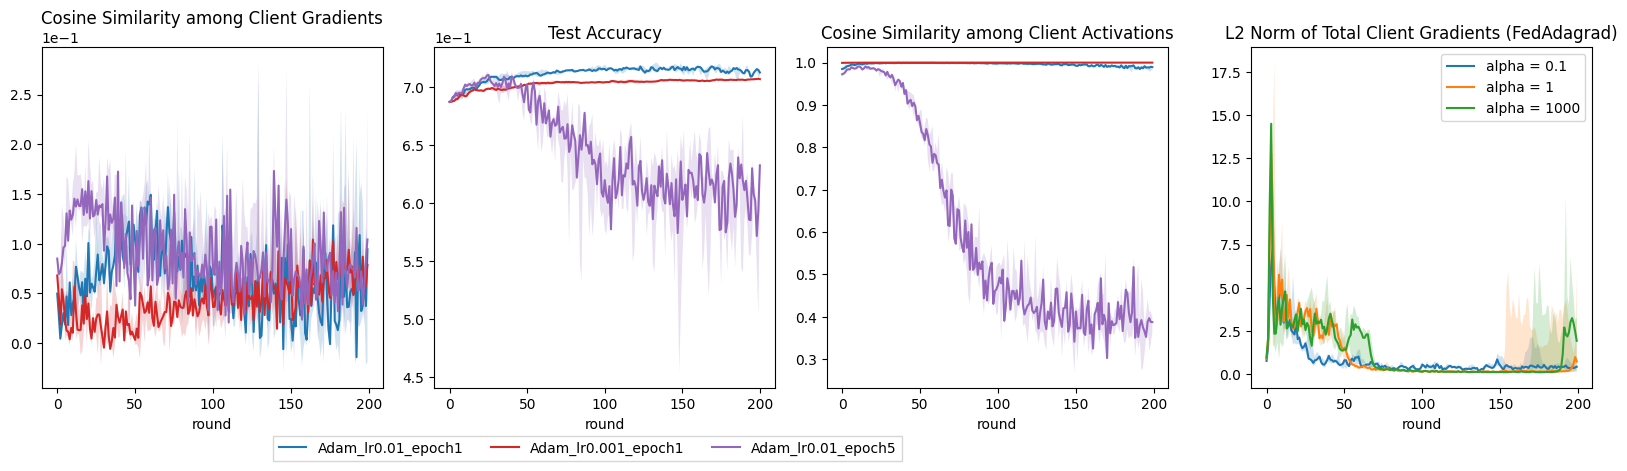

In [1370]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))


adam_lr_c01_run1_cs_gradient_sum = []
for cs_gradients in adam_lr_c01_run1["metrics_distributed_fit"]["cs_gradients"]:
    adam_lr_c01_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_lr_c01_run2_cs_gradient_sum = []
for cs_gradients in adam_lr_c01_run2["metrics_distributed_fit"]["cs_gradients"]:
    adam_lr_c01_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_lr_c01_run3_cs_gradient_sum = []
for cs_gradients in adam_lr_c01_run3["metrics_distributed_fit"]["cs_gradients"]:
    adam_lr_c01_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

adam_epoch_c01_run1_cs_gradient_sum = []
for cs_gradients in adam_epoch_c01_run1["metrics_distributed_fit"]["cs_gradients"]:
    adam_epoch_c01_run1_cs_gradient_sum.append(
        (np.array(cs_gradients[1]).sum() - 10) / 90
    )
adam_epoch_c01_run2_cs_gradient_sum = []
for cs_gradients in adam_epoch_c01_run2["metrics_distributed_fit"]["cs_gradients"]:
    adam_epoch_c01_run2_cs_gradient_sum.append(
        (np.array(cs_gradients[1]).sum() - 10) / 90
    )
adam_epoch_c01_run3_cs_gradient_sum = []
for cs_gradients in adam_epoch_c01_run3["metrics_distributed_fit"]["cs_gradients"]:
    adam_epoch_c01_run3_cs_gradient_sum.append(
        (np.array(cs_gradients[1]).sum() - 10) / 90
    )


adam_lr_c01_run1_cs_activation_mean_sum = []
for cs_activation_mean in adam_lr_c01_run1["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_lr_c01_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_lr_c01_run2_cs_activation_mean_sum = []
for cs_activation_mean in adam_lr_c01_run2["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_lr_c01_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_lr_c01_run3_cs_activation_mean_sum = []
for cs_activation_mean in adam_lr_c01_run3["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_lr_c01_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

adam_epoch_c01_run1_cs_activation_mean_sum = []
for cs_activation_mean in adam_epoch_c01_run1["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_epoch_c01_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_epoch_c01_run2_cs_activation_mean_sum = []
for cs_activation_mean in adam_epoch_c01_run2["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_epoch_c01_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_epoch_c01_run3_cs_activation_mean_sum = []
for cs_activation_mean in adam_epoch_c01_run3["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_epoch_c01_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )


adam_c01_cs_gradient_sum_stacked = np.array([
    adam_c01_run1_cs_gradient_sum,
    adam_c01_run2_cs_gradient_sum,
    adam_c01_run3_cs_gradient_sum,
])
axs[0].plot(
    np.median(adam_c01_cs_gradient_sum_stacked, axis=0), label="Adam_lr0.01_epoch1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_cs_gradient_sum_stacked, axis=0),
    np.min(adam_c01_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

adam_lr_c01_cs_gradient_sum_stacked = np.array([
    adam_lr_c01_run1_cs_gradient_sum,
    adam_lr_c01_run2_cs_gradient_sum,
    adam_lr_c01_run3_cs_gradient_sum,
])
axs[0].plot(
    np.median(adam_lr_c01_cs_gradient_sum_stacked, axis=0),
    color="tab:red",
    label="Adam_lr0.001_epoch1",
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(adam_lr_c01_cs_gradient_sum_stacked, axis=0),
    np.min(adam_lr_c01_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:red",
    edgecolor="none",
)

adam_epoch_c01_cs_gradient_sum_stacked = np.array([
    adam_epoch_c01_run1_cs_gradient_sum,
    adam_epoch_c01_run2_cs_gradient_sum,
    adam_epoch_c01_run3_cs_gradient_sum,
])
axs[0].plot(
    np.median(adam_epoch_c01_cs_gradient_sum_stacked, axis=0),
    color="tab:purple",
    label="Adam_lr0.01_epoch5",
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(adam_epoch_c01_cs_gradient_sum_stacked, axis=0),
    np.min(adam_epoch_c01_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:purple",
    edgecolor="none",
)


adam_c01_run1_accuracy = np.array(
    adam_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_run2_accuracy = np.array(
    adam_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_run3_accuracy = np.array(
    adam_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_accuracy_stacked = np.array(
    [adam_c01_run1_accuracy, adam_c01_run2_accuracy, adam_c01_run3_accuracy]
)
axs[1].plot(np.median(adam_c01_accuracy_stacked, axis=0), label="Adam_lr0.01_epoch1")
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c01_accuracy_stacked, axis=0),
    np.min(adam_c01_accuracy_stacked, axis=0),
    alpha=0.2,
)

adam_lr_c01_run1_accuracy = np.array(
    adam_lr_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_lr_c01_run2_accuracy = np.array(
    adam_lr_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_lr_c01_run3_accuracy = np.array(
    adam_lr_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_lr_c01_accuracy_stacked = np.array(
    [adam_lr_c01_run1_accuracy, adam_lr_c01_run2_accuracy, adam_lr_c01_run3_accuracy]
)
axs[1].plot(
    np.median(adam_lr_c01_accuracy_stacked, axis=0),
    label="Adam_lr0.001_epoch1",
    color="tab:red",
)
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_lr_c01_accuracy_stacked, axis=0),
    np.min(adam_lr_c01_accuracy_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:red",
    edgecolor="none",
)

adam_epoch_c01_run1_accuracy = np.array(
    adam_epoch_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_epoch_c01_run2_accuracy = np.array(
    adam_epoch_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_epoch_c01_run3_accuracy = np.array(
    adam_epoch_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_epoch_c01_accuracy_stacked = np.array([
    adam_epoch_c01_run1_accuracy,
    adam_epoch_c01_run2_accuracy,
    adam_epoch_c01_run3_accuracy,
])
axs[1].plot(
    np.median(adam_epoch_c01_accuracy_stacked, axis=0),
    label="Adam_lr0.01_epoch5",
    color="tab:purple",
)
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_epoch_c01_accuracy_stacked, axis=0),
    np.min(adam_epoch_c01_accuracy_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:purple",
)

adam_c01_cs_activation_mean_sum_stacked = np.array([
    adam_c01_run1_cs_activation_mean_sum,
    adam_c01_run2_cs_activation_mean_sum,
    adam_c01_run3_cs_activation_mean_sum,
])
axs[2].plot(np.median(adam_c01_cs_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_cs_activation_mean_sum_stacked, axis=0),
    np.min(adam_c01_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_lr_c01_cs_activation_mean_sum_stacked = np.array([
    adam_lr_c01_run1_cs_activation_mean_sum,
    adam_lr_c01_run2_cs_activation_mean_sum,
    adam_lr_c01_run3_cs_activation_mean_sum,
])
axs[2].plot(
    np.median(adam_lr_c01_cs_activation_mean_sum_stacked, axis=0), color="tab:red"
)
axs[2].fill_between(
    [x for x in range(200)],
    np.max(adam_lr_c01_cs_activation_mean_sum_stacked, axis=0),
    np.min(adam_lr_c01_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:red",
    edgecolor="none",
)

adam_epoch_c01_cs_activation_mean_sum_stacked = np.array([
    adam_epoch_c01_run1_cs_activation_mean_sum,
    adam_epoch_c01_run2_cs_activation_mean_sum,
    adam_epoch_c01_run3_cs_activation_mean_sum,
])
axs[2].plot(
    np.median(adam_epoch_c01_cs_activation_mean_sum_stacked, axis=0), color="tab:purple"
)
axs[2].fill_between(
    [x for x in range(200)],
    np.max(adam_epoch_c01_cs_activation_mean_sum_stacked, axis=0),
    np.min(adam_epoch_c01_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:purple",
)


fig.tight_layout()
axs[0].legend(
    loc="upper center",
    bbox_to_anchor=(1.6, -0.12),
    fancybox=False,
    shadow=False,
    ncol=6,
)
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15)

ada_c01_run1_total_gradients = np.array(
    ada_c01_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_run2_total_gradients = np.array(
    ada_c01_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_run3_total_gradients = np.array(
    ada_c01_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_total_gradients_stacked = np.array([
    ada_c01_run1_total_gradients,
    ada_c01_run2_total_gradients,
    ada_c01_run3_total_gradients,
])
axs[3].plot(np.median(ada_c01_total_gradients_stacked, axis=0), label="alpha = 0.1")
axs[3].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_total_gradients_stacked, axis=0),
    np.min(ada_c01_total_gradients_stacked, axis=0),
    alpha=0.2,
)


ada_c1_run1_total_gradients = np.array(
    ada_c1_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_run2_total_gradients = np.array(
    ada_c1_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_run3_total_gradients = np.array(
    ada_c1_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_total_gradients_stacked = np.array([
    ada_c1_run1_total_gradients,
    ada_c1_run2_total_gradients,
    ada_c1_run3_total_gradients,
])
axs[3].plot(np.median(ada_c1_total_gradients_stacked, axis=0), label="alpha = 1")
axs[3].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_total_gradients_stacked, axis=0),
    np.min(ada_c1_total_gradients_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_run1_total_gradients = np.array(
    ada_c1000_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_run2_total_gradients = np.array(
    ada_c1000_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_run3_total_gradients = np.array(
    ada_c1000_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_total_gradients_stacked = np.array([
    ada_c1000_run1_total_gradients,
    ada_c1000_run2_total_gradients,
    ada_c1000_run3_total_gradients,
])
axs[3].plot(np.median(ada_c1000_total_gradients_stacked, axis=0), label="alpha = 1000")
axs[3].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_total_gradients_stacked, axis=0),
    np.min(ada_c1000_total_gradients_stacked, axis=0),
    alpha=0.2,
)

axs[3].legend()

pos = axs[3].get_position()
new_pos = [pos.x0 + 0.02, pos.y0, pos.width, pos.height]
axs[3].set_position(new_pos)

axs[0].set_title("Cosine Similarity among Client Gradients")
axs[1].set_title("Test Accuracy")
axs[2].set_title("Cosine Similarity among Client Activations")
axs[3].set_title("L2 Norm of Total Client Gradients (FedAdagrad)")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")
axs[3].set_xlabel("round")

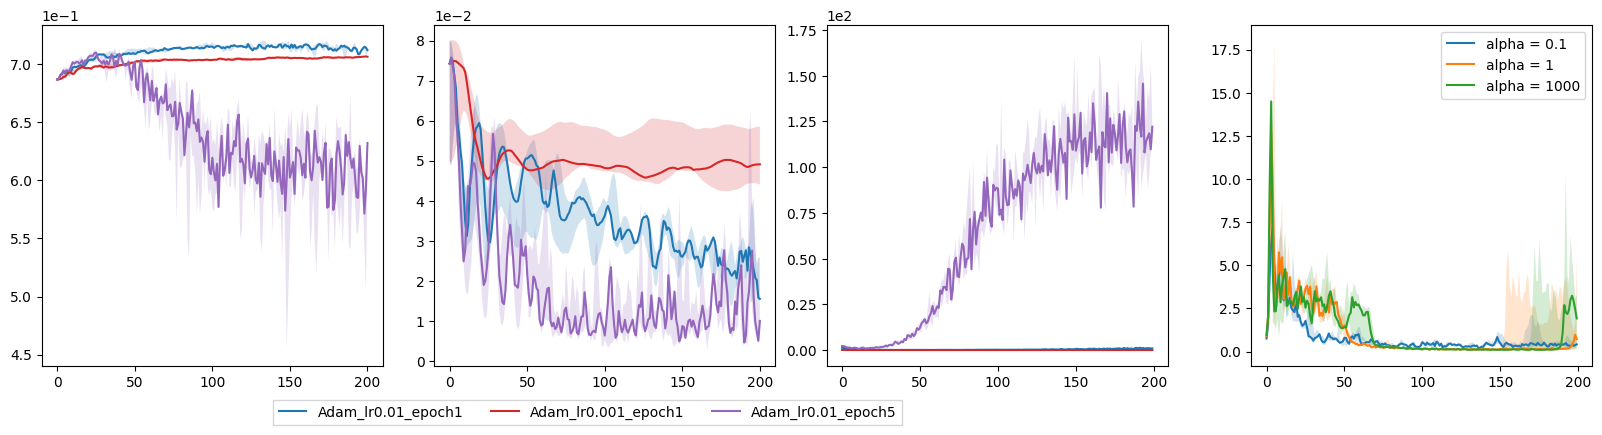

In [1213]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))


adam_lr_c01_run1_random_activation = []
for random_activation in adam_lr_c01_run1["metrics_centralized"]["random_activation"]:
    adam_lr_c01_run1_random_activation.append(np.array(random_activation[1][0]).var())
adam_lr_c01_run2_random_activation = []
for random_activation in adam_lr_c01_run2["metrics_centralized"]["random_activation"]:
    adam_lr_c01_run2_random_activation.append(np.array(random_activation[1][0]).var())
adam_lr_c01_run3_random_activation = []
for random_activation in adam_lr_c01_run3["metrics_centralized"]["random_activation"]:
    adam_lr_c01_run3_random_activation.append(np.array(random_activation[1][0]).var())

adam_epoch_c01_run1_random_activation = []
for random_activation in adam_epoch_c01_run1["metrics_centralized"][
    "random_activation"
]:
    adam_epoch_c01_run1_random_activation.append(
        np.array(random_activation[1][0]).var()
    )
adam_epoch_c01_run2_random_activation = []
for random_activation in adam_epoch_c01_run2["metrics_centralized"][
    "random_activation"
]:
    adam_epoch_c01_run2_random_activation.append(
        np.array(random_activation[1][0]).var()
    )
adam_epoch_c01_run3_random_activation = []
for random_activation in adam_epoch_c01_run3["metrics_centralized"][
    "random_activation"
]:
    adam_epoch_c01_run3_random_activation.append(
        np.array(random_activation[1][0]).var()
    )


adam_lr_c01_run1_kl_activation_mean_sum = []
for kl_activation_mean in adam_lr_c01_run1["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_lr_c01_run1_kl_activation_mean_sum.append(
        np.array(kl_activation_mean[1]).sum()
    )
adam_lr_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_lr_c01_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_lr_c01_run2_kl_activation_mean_sum.append(
        np.array(kl_activation_mean[1]).sum()
    )
adam_lr_c01_run3_kl_activation_mean_sum = []
for kl_activation_mean in adam_lr_c01_run3["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_lr_c01_run3_kl_activation_mean_sum.append(
        np.array(kl_activation_mean[1]).sum()
    )

adam_epoch_c01_run1_kl_activation_mean_sum = []
for kl_activation_mean in adam_epoch_c01_run1["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_epoch_c01_run1_kl_activation_mean_sum.append(
        np.array(kl_activation_mean[1]).sum()
    )
adam_epoch_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_epoch_c01_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_epoch_c01_run2_kl_activation_mean_sum.append(
        np.array(kl_activation_mean[1]).sum()
    )
adam_epoch_c01_run3_kl_activation_mean_sum = []
for kl_activation_mean in adam_epoch_c01_run3["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_epoch_c01_run3_kl_activation_mean_sum.append(
        np.array(kl_activation_mean[1]).sum()
    )


adam_c01_run1_accuracy = np.array(
    adam_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_run2_accuracy = np.array(
    adam_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_run3_accuracy = np.array(
    adam_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_accuracy_stacked = np.array(
    [adam_c01_run1_accuracy, adam_c01_run2_accuracy, adam_c01_run3_accuracy]
)
axs[1].plot(np.median(adam_c01_accuracy_stacked, axis=0), label="Adam_lr0.01_epoch1")
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c01_accuracy_stacked, axis=0),
    np.min(adam_c01_accuracy_stacked, axis=0),
    alpha=0.2,
)

adam_lr_c01_run1_accuracy = np.array(
    adam_lr_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_lr_c01_run2_accuracy = np.array(
    adam_lr_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_lr_c01_run3_accuracy = np.array(
    adam_lr_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_lr_c01_accuracy_stacked = np.array(
    [adam_lr_c01_run1_accuracy, adam_lr_c01_run2_accuracy, adam_lr_c01_run3_accuracy]
)
axs[1].plot(
    np.median(adam_lr_c01_accuracy_stacked, axis=0),
    label="Adam_lr0.001_epoch1",
    color="tab:red",
)
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_lr_c01_accuracy_stacked, axis=0),
    np.min(adam_lr_c01_accuracy_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:red",
    edgecolor="none",
)

adam_epoch_c01_run1_accuracy = np.array(
    adam_epoch_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_epoch_c01_run2_accuracy = np.array(
    adam_epoch_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_epoch_c01_run3_accuracy = np.array(
    adam_epoch_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_epoch_c01_accuracy_stacked = np.array([
    adam_epoch_c01_run1_accuracy,
    adam_epoch_c01_run2_accuracy,
    adam_epoch_c01_run3_accuracy,
])
axs[1].plot(
    np.median(adam_epoch_c01_accuracy_stacked, axis=0),
    label="Adam_lr0.01_epoch5",
    color="tab:purple",
)
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_epoch_c01_accuracy_stacked, axis=0),
    np.min(adam_epoch_c01_accuracy_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:purple",
)


adam_c01_kl_activation_mean_sum_stacked = np.array([
    adam_c01_run1_kl_activation_mean_sum,
    adam_c01_run2_kl_activation_mean_sum,
    adam_c01_run3_kl_activation_mean_sum,
])
axs[2].plot(np.median(adam_c01_kl_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_kl_activation_mean_sum_stacked, axis=0),
    np.min(adam_c01_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_lr_c01_kl_activation_mean_sum_stacked = np.array([
    adam_lr_c01_run1_kl_activation_mean_sum,
    adam_lr_c01_run2_kl_activation_mean_sum,
    adam_lr_c01_run3_kl_activation_mean_sum,
])
axs[2].plot(
    np.median(adam_lr_c01_kl_activation_mean_sum_stacked, axis=0), color="tab:red"
)
axs[2].fill_between(
    [x for x in range(200)],
    np.max(adam_lr_c01_kl_activation_mean_sum_stacked, axis=0),
    np.min(adam_lr_c01_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:red",
    edgecolor="none",
)

adam_epoch_c01_kl_activation_mean_sum_stacked = np.array([
    adam_epoch_c01_run1_kl_activation_mean_sum,
    adam_epoch_c01_run2_kl_activation_mean_sum,
    adam_epoch_c01_run3_kl_activation_mean_sum,
])
axs[2].plot(
    np.median(adam_epoch_c01_kl_activation_mean_sum_stacked, axis=0), color="tab:purple"
)
axs[2].fill_between(
    [x for x in range(200)],
    np.max(adam_epoch_c01_kl_activation_mean_sum_stacked, axis=0),
    np.min(adam_epoch_c01_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
    facecolor="tab:purple",
)


fig.tight_layout()
axs[0].legend(
    loc="upper center",
    bbox_to_anchor=(1.6, -0.08),
    fancybox=False,
    shadow=False,
    ncol=6,
)
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15)

ada_c01_run1_total_gradients = np.array(
    ada_c01_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_run2_total_gradients = np.array(
    ada_c01_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_run3_total_gradients = np.array(
    ada_c01_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_total_gradients_stacked = np.array([
    ada_c01_run1_total_gradients,
    ada_c01_run2_total_gradients,
    ada_c01_run3_total_gradients,
])
axs[3].plot(np.median(ada_c01_total_gradients_stacked, axis=0), label="alpha = 0.1")
axs[3].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_total_gradients_stacked, axis=0),
    np.min(ada_c01_total_gradients_stacked, axis=0),
    alpha=0.2,
)


ada_c1_run1_total_gradients = np.array(
    ada_c1_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_run2_total_gradients = np.array(
    ada_c1_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_run3_total_gradients = np.array(
    ada_c1_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_total_gradients_stacked = np.array([
    ada_c1_run1_total_gradients,
    ada_c1_run2_total_gradients,
    ada_c1_run3_total_gradients,
])
axs[3].plot(np.median(ada_c1_total_gradients_stacked, axis=0), label="alpha = 1")
axs[3].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_total_gradients_stacked, axis=0),
    np.min(ada_c1_total_gradients_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_run1_total_gradients = np.array(
    ada_c1000_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_run2_total_gradients = np.array(
    ada_c1000_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_run3_total_gradients = np.array(
    ada_c1000_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_total_gradients_stacked = np.array([
    ada_c1000_run1_total_gradients,
    ada_c1000_run2_total_gradients,
    ada_c1000_run3_total_gradients,
])
axs[3].plot(np.median(ada_c1000_total_gradients_stacked, axis=0), label="alpha = 1000")
axs[3].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_total_gradients_stacked, axis=0),
    np.min(ada_c1000_total_gradients_stacked, axis=0),
    alpha=0.2,
)

axs[3].legend()

pos = axs[3].get_position()
new_pos = [pos.x0 + 0.02, pos.y0, pos.width, pos.height]
axs[3].set_position(new_pos)

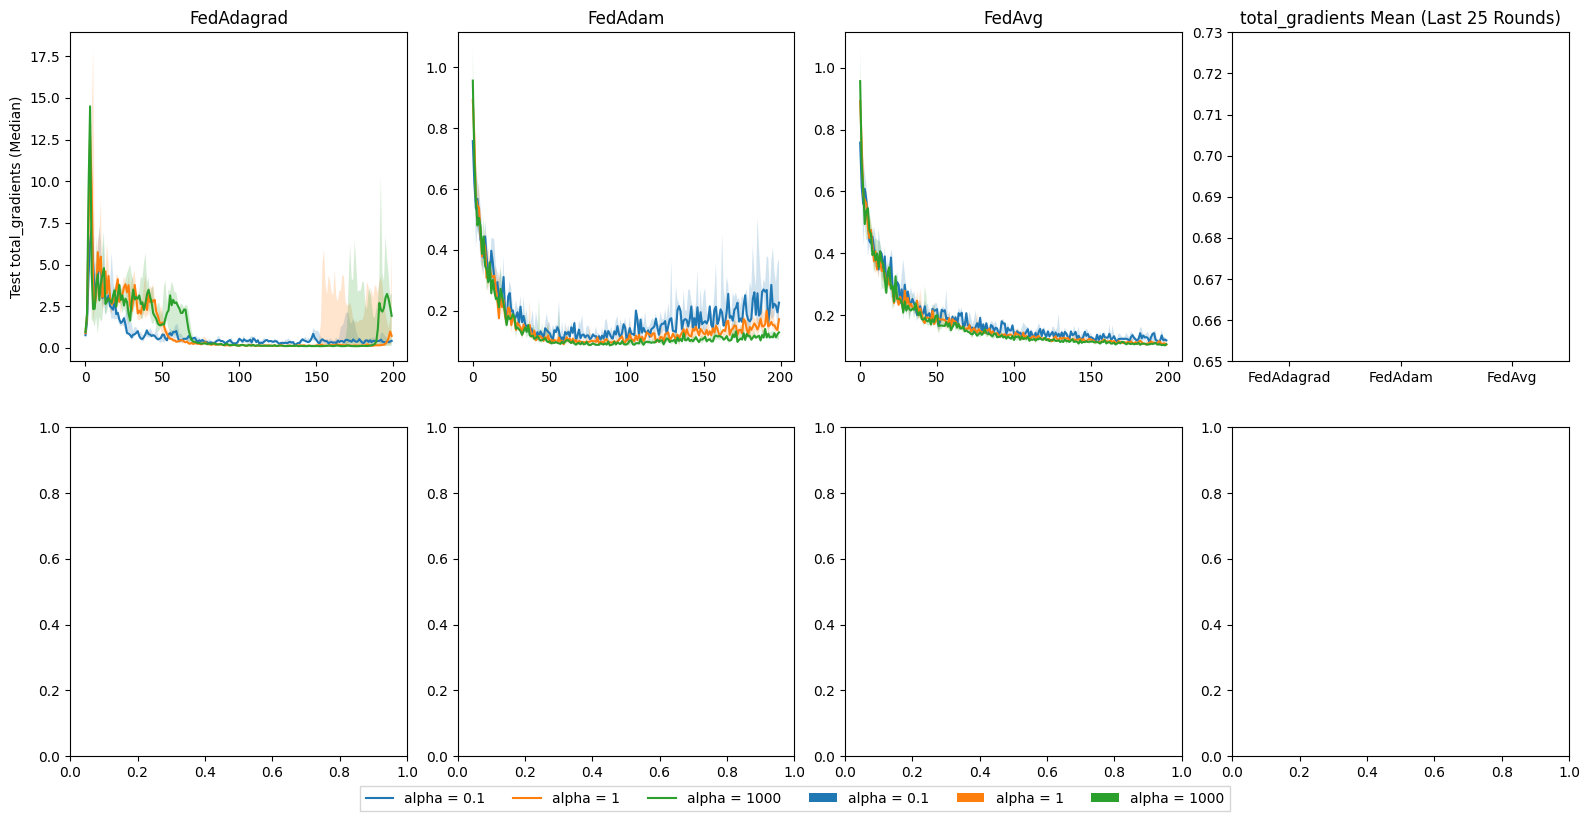

In [1178]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0][0].set_title("FedAdagrad")
axs[0][1].set_title("FedAdam")
axs[0][2].set_title("FedAvg")
axs[0][3].set_title("total_gradients Mean (Last 25 Rounds)")
axs[0][0].set_ylabel("Test total_gradients (Median)")


ada_c01_run1_total_gradients = np.array(
    ada_c01_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_run2_total_gradients = np.array(
    ada_c01_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_run3_total_gradients = np.array(
    ada_c01_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c01_total_gradients_stacked = np.array([
    ada_c01_run1_total_gradients,
    ada_c01_run2_total_gradients,
    ada_c01_run3_total_gradients,
])
axs[0][0].plot(np.median(ada_c01_total_gradients_stacked, axis=0), label="alpha = 0.1")
axs[0][0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_total_gradients_stacked, axis=0),
    np.min(ada_c01_total_gradients_stacked, axis=0),
    alpha=0.2,
)


ada_c1_run1_total_gradients = np.array(
    ada_c1_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_run2_total_gradients = np.array(
    ada_c1_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_run3_total_gradients = np.array(
    ada_c1_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1_total_gradients_stacked = np.array([
    ada_c1_run1_total_gradients,
    ada_c1_run2_total_gradients,
    ada_c1_run3_total_gradients,
])
axs[0][0].plot(np.median(ada_c1_total_gradients_stacked, axis=0), label="alpha = 1")
axs[0][0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_total_gradients_stacked, axis=0),
    np.min(ada_c1_total_gradients_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_run1_total_gradients = np.array(
    ada_c1000_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_run2_total_gradients = np.array(
    ada_c1000_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_run3_total_gradients = np.array(
    ada_c1000_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
ada_c1000_total_gradients_stacked = np.array([
    ada_c1000_run1_total_gradients,
    ada_c1000_run2_total_gradients,
    ada_c1000_run3_total_gradients,
])
axs[0][0].plot(
    np.median(ada_c1000_total_gradients_stacked, axis=0), label="alpha = 1000"
)
axs[0][0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_total_gradients_stacked, axis=0),
    np.min(ada_c1000_total_gradients_stacked, axis=0),
    alpha=0.2,
)


adam_c01_run1_total_gradients = np.array(
    adam_c01_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c01_run2_total_gradients = np.array(
    adam_c01_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c01_run3_total_gradients = np.array(
    adam_c01_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c01_total_gradients_stacked = np.array([
    adam_c01_run1_total_gradients,
    adam_c01_run2_total_gradients,
    adam_c01_run3_total_gradients,
])
axs[0][1].plot(np.median(adam_c01_total_gradients_stacked, axis=0))
axs[0][1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_total_gradients_stacked, axis=0),
    np.min(adam_c01_total_gradients_stacked, axis=0),
    alpha=0.2,
)


adam_c1_run1_total_gradients = np.array(
    adam_c1_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c1_run2_total_gradients = np.array(
    adam_c1_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c1_run3_total_gradients = np.array(
    adam_c1_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c1_total_gradients_stacked = np.array([
    adam_c1_run1_total_gradients,
    adam_c1_run2_total_gradients,
    adam_c1_run3_total_gradients,
])
axs[0][1].plot(np.median(adam_c1_total_gradients_stacked, axis=0))
axs[0][1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_total_gradients_stacked, axis=0),
    np.min(adam_c1_total_gradients_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_run1_total_gradients = np.array(
    adam_c1000_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c1000_run2_total_gradients = np.array(
    adam_c1000_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c1000_run3_total_gradients = np.array(
    adam_c1000_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
adam_c1000_total_gradients_stacked = np.array([
    adam_c1000_run1_total_gradients,
    adam_c1000_run2_total_gradients,
    adam_c1000_run3_total_gradients,
])
axs[0][1].plot(np.median(adam_c1000_total_gradients_stacked, axis=0))
axs[0][1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_total_gradients_stacked, axis=0),
    np.min(adam_c1000_total_gradients_stacked, axis=0),
    alpha=0.2,
)


avg_c01_run1_total_gradients = np.array(
    avg_c01_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c01_run2_total_gradients = np.array(
    avg_c01_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c01_run3_total_gradients = np.array(
    avg_c01_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c01_total_gradients_stacked = np.array([
    avg_c01_run1_total_gradients,
    avg_c01_run2_total_gradients,
    avg_c01_run3_total_gradients,
])
axs[0][2].plot(np.median(avg_c01_total_gradients_stacked, axis=0))
axs[0][2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_total_gradients_stacked, axis=0),
    np.min(avg_c01_total_gradients_stacked, axis=0),
    alpha=0.2,
)


avg_c1_run1_total_gradients = np.array(
    avg_c1_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c1_run2_total_gradients = np.array(
    avg_c1_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c1_run3_total_gradients = np.array(
    avg_c1_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c1_total_gradients_stacked = np.array([
    avg_c1_run1_total_gradients,
    avg_c1_run2_total_gradients,
    avg_c1_run3_total_gradients,
])
axs[0][2].plot(np.median(avg_c1_total_gradients_stacked, axis=0))
axs[0][2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_total_gradients_stacked, axis=0),
    np.min(avg_c1_total_gradients_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_run1_total_gradients = np.array(
    avg_c1000_run1["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c1000_run2_total_gradients = np.array(
    avg_c1000_run2["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c1000_run3_total_gradients = np.array(
    avg_c1000_run3["metrics_distributed_fit"]["total_gradients"]
)[:, 1]
avg_c1000_total_gradients_stacked = np.array([
    avg_c1000_run1_total_gradients,
    avg_c1000_run2_total_gradients,
    avg_c1000_run3_total_gradients,
])
axs[0][2].plot(np.median(avg_c1000_total_gradients_stacked, axis=0))
axs[0][2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_total_gradients_stacked, axis=0),
    np.min(avg_c1000_total_gradients_stacked, axis=0),
    alpha=0.2,
)

algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_total_gradients_stacked_mean = np.mean(
    ada_c01_total_gradients_stacked[:, 126:151], axis=-1
)
ada_c1_total_gradients_stacked_mean = np.mean(
    ada_c1_total_gradients_stacked[:, 126:151], axis=-1
)
ada_c1000_total_gradients_stacked_mean = np.mean(
    ada_c1000_total_gradients_stacked[:, 126:151], axis=-1
)

adam_c01_total_gradients_stacked_mean = np.mean(
    adam_c01_total_gradients_stacked[:, 176:201], axis=-1
)
adam_c1_total_gradients_stacked_mean = np.mean(
    adam_c1_total_gradients_stacked[:, 176:201], axis=-1
)
adam_c1000_total_gradients_stacked_mean = np.mean(
    adam_c1000_total_gradients_stacked[:, 176:201], axis=-1
)

avg_c01_total_gradients_stacked_mean = np.mean(
    avg_c01_total_gradients_stacked[:, 176:201], axis=-1
)
avg_c1_total_gradients_stacked_mean = np.mean(
    avg_c1_total_gradients_stacked[:, 176:201], axis=-1
)
avg_c1000_total_gradients_stacked_mean = np.mean(
    avg_c1000_total_gradients_stacked[:, 176:201], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

total_gradients = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_total_gradients_stacked_mean),
            np.median(adam_c01_total_gradients_stacked_mean),
            np.median(avg_c01_total_gradients_stacked_mean),
        ],
        [
            ada_c01_total_gradients_stacked_mean.min(),
            adam_c01_total_gradients_stacked_mean.min(),
            avg_c01_total_gradients_stacked_mean.min(),
        ],
        [
            ada_c01_total_gradients_stacked_mean.max(),
            adam_c01_total_gradients_stacked_mean.max(),
            avg_c01_total_gradients_stacked_mean.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_total_gradients_stacked_mean),
            np.median(adam_c1_total_gradients_stacked_mean),
            np.median(avg_c1_total_gradients_stacked_mean),
        ],
        [
            ada_c1_total_gradients_stacked_mean.min(),
            adam_c1_total_gradients_stacked_mean.min(),
            avg_c1_total_gradients_stacked_mean.min(),
        ],
        [
            ada_c1_total_gradients_stacked_mean.max(),
            adam_c1_total_gradients_stacked_mean.max(),
            avg_c1_total_gradients_stacked_mean.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_total_gradients_stacked_mean),
            np.median(adam_c1000_total_gradients_stacked_mean),
            np.median(avg_c1000_total_gradients_stacked_mean),
        ],
        [
            ada_c1000_total_gradients_stacked_mean.min(),
            adam_c1000_total_gradients_stacked_mean.min(),
            avg_c1000_total_gradients_stacked_mean.min(),
        ],
        [
            ada_c1000_total_gradients_stacked_mean.max(),
            adam_c1000_total_gradients_stacked_mean.max(),
            avg_c1000_total_gradients_stacked_mean.max(),
        ],
    ]),
}

for attribute, measurement in total_gradients.items():
    offset = width * multiplier
    rects = axs[0][3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[0].bar_label(rects, padding=3, fmt='{:.3}')
    multiplier += 1

axs[0][3].set_xticks(x + width, algorithms)

custom_ylim = (0.65, 0.73)
plt.setp([axs[0][3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.02), fancybox=False, shadow=False, ncol=6
)
plt.subplots_adjust(wspace=0.15, hspace=0.2)

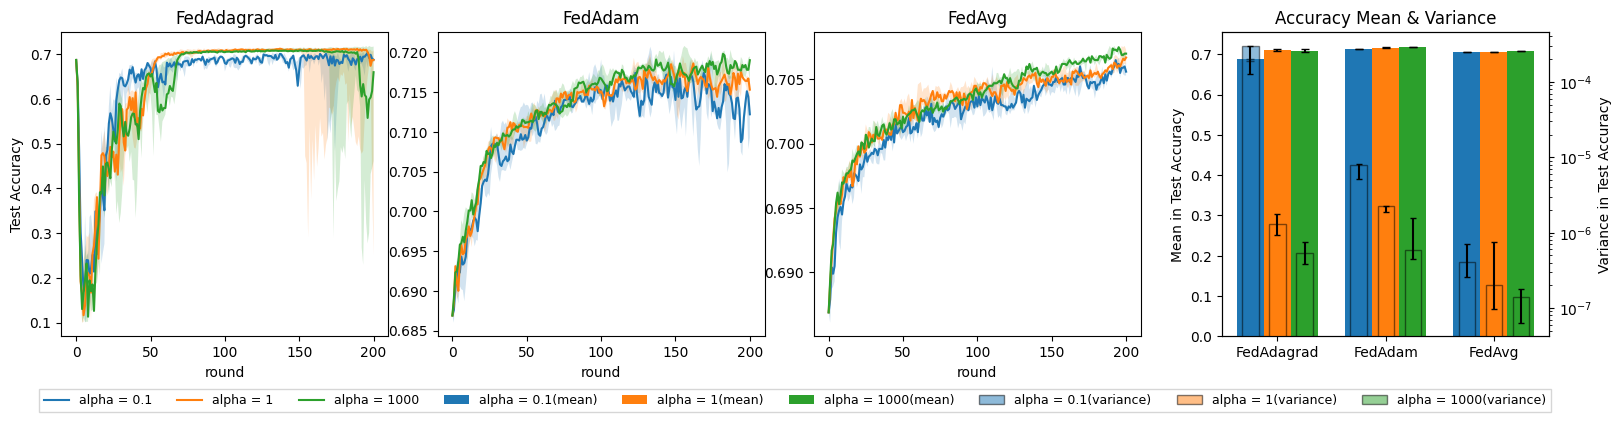

In [1314]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Accuracy Mean & Variance")
axs[0].set_ylabel("Test Accuracy")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_run1_accuracy = np.array(ada_c01_run1["metrics_centralized"]["test_accuracy"])[
    :, 1
]
ada_c01_run2_accuracy = np.array(ada_c01_run2["metrics_centralized"]["test_accuracy"])[
    :, 1
]
ada_c01_run3_accuracy = np.array(ada_c01_run3["metrics_centralized"]["test_accuracy"])[
    :, 1
]
ada_c01_accuracy_stacked = np.array(
    [ada_c01_run1_accuracy, ada_c01_run2_accuracy, ada_c01_run3_accuracy]
)
axs[0].plot(np.median(ada_c01_accuracy_stacked, axis=0), label="alpha = 0.1")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c01_accuracy_stacked, axis=0),
    np.min(ada_c01_accuracy_stacked, axis=0),
    alpha=0.2,
)


ada_c1_run1_accuracy = np.array(ada_c1_run1["metrics_centralized"]["test_accuracy"])[
    :, 1
]
ada_c1_run2_accuracy = np.array(ada_c1_run2["metrics_centralized"]["test_accuracy"])[
    :, 1
]
ada_c1_run3_accuracy = np.array(ada_c1_run3["metrics_centralized"]["test_accuracy"])[
    :, 1
]
ada_c1_accuracy_stacked = np.array(
    [ada_c1_run1_accuracy, ada_c1_run2_accuracy, ada_c1_run3_accuracy]
)
axs[0].plot(np.median(ada_c1_accuracy_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c1_accuracy_stacked, axis=0),
    np.min(ada_c1_accuracy_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_run1_accuracy = np.array(
    ada_c1000_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
ada_c1000_run2_accuracy = np.array(
    ada_c1000_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
ada_c1000_run3_accuracy = np.array(
    ada_c1000_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
ada_c1000_accuracy_stacked = np.array(
    [ada_c1000_run1_accuracy, ada_c1000_run2_accuracy, ada_c1000_run3_accuracy]
)
axs[0].plot(np.median(ada_c1000_accuracy_stacked, axis=0), label="alpha = 1000")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c1000_accuracy_stacked, axis=0),
    np.min(ada_c1000_accuracy_stacked, axis=0),
    alpha=0.2,
)


adam_c01_run1_accuracy = np.array(
    adam_c01_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_run2_accuracy = np.array(
    adam_c01_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_run3_accuracy = np.array(
    adam_c01_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c01_accuracy_stacked = np.array(
    [adam_c01_run1_accuracy, adam_c01_run2_accuracy, adam_c01_run3_accuracy]
)
axs[1].plot(np.median(adam_c01_accuracy_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c01_accuracy_stacked, axis=0),
    np.min(adam_c01_accuracy_stacked, axis=0),
    alpha=0.2,
)


adam_c1_run1_accuracy = np.array(adam_c1_run1["metrics_centralized"]["test_accuracy"])[
    :, 1
]
adam_c1_run2_accuracy = np.array(adam_c1_run2["metrics_centralized"]["test_accuracy"])[
    :, 1
]
adam_c1_run3_accuracy = np.array(adam_c1_run3["metrics_centralized"]["test_accuracy"])[
    :, 1
]
adam_c1_accuracy_stacked = np.array(
    [adam_c1_run1_accuracy, adam_c1_run2_accuracy, adam_c1_run3_accuracy]
)
axs[1].plot(np.median(adam_c1_accuracy_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c1_accuracy_stacked, axis=0),
    np.min(adam_c1_accuracy_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_run1_accuracy = np.array(
    adam_c1000_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c1000_run2_accuracy = np.array(
    adam_c1000_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c1000_run3_accuracy = np.array(
    adam_c1000_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
adam_c1000_accuracy_stacked = np.array(
    [adam_c1000_run1_accuracy, adam_c1000_run2_accuracy, adam_c1000_run3_accuracy]
)
axs[1].plot(np.median(adam_c1000_accuracy_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c1000_accuracy_stacked, axis=0),
    np.min(adam_c1000_accuracy_stacked, axis=0),
    alpha=0.2,
)


avg_c01_run1_accuracy = np.array(avg_c01_run1["metrics_centralized"]["test_accuracy"])[
    :, 1
]
avg_c01_run2_accuracy = np.array(avg_c01_run2["metrics_centralized"]["test_accuracy"])[
    :, 1
]
avg_c01_run3_accuracy = np.array(avg_c01_run3["metrics_centralized"]["test_accuracy"])[
    :, 1
]
avg_c01_accuracy_stacked = np.array(
    [avg_c01_run1_accuracy, avg_c01_run2_accuracy, avg_c01_run3_accuracy]
)
axs[2].plot(np.median(avg_c01_accuracy_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c01_accuracy_stacked, axis=0),
    np.min(avg_c01_accuracy_stacked, axis=0),
    alpha=0.2,
)


avg_c1_run1_accuracy = np.array(avg_c1_run1["metrics_centralized"]["test_accuracy"])[
    :, 1
]
avg_c1_run2_accuracy = np.array(avg_c1_run2["metrics_centralized"]["test_accuracy"])[
    :, 1
]
avg_c1_run3_accuracy = np.array(avg_c1_run3["metrics_centralized"]["test_accuracy"])[
    :, 1
]
avg_c1_accuracy_stacked = np.array(
    [avg_c1_run1_accuracy, avg_c1_run2_accuracy, avg_c1_run3_accuracy]
)
axs[2].plot(np.median(avg_c1_accuracy_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c1_accuracy_stacked, axis=0),
    np.min(avg_c1_accuracy_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_run1_accuracy = np.array(
    avg_c1000_run1["metrics_centralized"]["test_accuracy"]
)[:, 1]
avg_c1000_run2_accuracy = np.array(
    avg_c1000_run2["metrics_centralized"]["test_accuracy"]
)[:, 1]
avg_c1000_run3_accuracy = np.array(
    avg_c1000_run3["metrics_centralized"]["test_accuracy"]
)[:, 1]
avg_c1000_accuracy_stacked = np.array(
    [avg_c1000_run1_accuracy, avg_c1000_run2_accuracy, avg_c1000_run3_accuracy]
)
axs[2].plot(np.median(avg_c1000_accuracy_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c1000_accuracy_stacked, axis=0),
    np.min(avg_c1000_accuracy_stacked, axis=0),
    alpha=0.2,
)

algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_accuracy_stacked_mean = np.mean(ada_c01_accuracy_stacked[:, 126:151], axis=-1)
ada_c1_accuracy_stacked_mean = np.mean(ada_c1_accuracy_stacked[:, 126:151], axis=-1)
ada_c1000_accuracy_stacked_mean = np.mean(
    ada_c1000_accuracy_stacked[:, 126:151], axis=-1
)

adam_c01_accuracy_stacked_mean = np.mean(adam_c01_accuracy_stacked[:, 176:201], axis=-1)
adam_c1_accuracy_stacked_mean = np.mean(adam_c1_accuracy_stacked[:, 176:201], axis=-1)
adam_c1000_accuracy_stacked_mean = np.mean(
    adam_c1000_accuracy_stacked[:, 176:201], axis=-1
)

avg_c01_accuracy_stacked_mean = np.mean(avg_c01_accuracy_stacked[:, 176:201], axis=-1)
avg_c1_accuracy_stacked_mean = np.mean(avg_c1_accuracy_stacked[:, 176:201], axis=-1)
avg_c1000_accuracy_stacked_mean = np.mean(
    avg_c1000_accuracy_stacked[:, 176:201], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

accuracy = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_accuracy_stacked_mean),
            np.median(adam_c01_accuracy_stacked_mean),
            np.median(avg_c01_accuracy_stacked_mean),
        ],
        [
            ada_c01_accuracy_stacked_mean.min(),
            adam_c01_accuracy_stacked_mean.min(),
            avg_c01_accuracy_stacked_mean.min(),
        ],
        [
            ada_c01_accuracy_stacked_mean.max(),
            adam_c01_accuracy_stacked_mean.max(),
            avg_c01_accuracy_stacked_mean.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_accuracy_stacked_mean),
            np.median(adam_c1_accuracy_stacked_mean),
            np.median(avg_c1_accuracy_stacked_mean),
        ],
        [
            ada_c1_accuracy_stacked_mean.min(),
            adam_c1_accuracy_stacked_mean.min(),
            avg_c1_accuracy_stacked_mean.min(),
        ],
        [
            ada_c1_accuracy_stacked_mean.max(),
            adam_c1_accuracy_stacked_mean.max(),
            avg_c1_accuracy_stacked_mean.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_accuracy_stacked_mean),
            np.median(adam_c1000_accuracy_stacked_mean),
            np.median(avg_c1000_accuracy_stacked_mean),
        ],
        [
            ada_c1000_accuracy_stacked_mean.min(),
            adam_c1000_accuracy_stacked_mean.min(),
            avg_c1000_accuracy_stacked_mean.min(),
        ],
        [
            ada_c1000_accuracy_stacked_mean.max(),
            adam_c1000_accuracy_stacked_mean.max(),
            avg_c1000_accuracy_stacked_mean.max(),
        ],
    ]),
}

for attribute, measurement in accuracy.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute + "(mean)",
    )
    # axs[0].bar_label(rects, padding=3, fmt='{:.3}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

ada_c01_accuracy_stacked_var = np.var(ada_c01_accuracy_stacked[:, 126:151], axis=-1)
ada_c1_accuracy_stacked_var = np.var(ada_c1_accuracy_stacked[:, 126:151], axis=-1)
ada_c1000_accuracy_stacked_var = np.var(ada_c1000_accuracy_stacked[:, 126:151], axis=-1)

adam_c01_accuracy_stacked_var = np.var(adam_c01_accuracy_stacked[:, 176:201], axis=-1)
adam_c1_accuracy_stacked_var = np.var(adam_c1_accuracy_stacked[:, 176:201], axis=-1)
adam_c1000_accuracy_stacked_var = np.var(
    adam_c1000_accuracy_stacked[:, 176:201], axis=-1
)

avg_c01_accuracy_stacked_var = np.var(avg_c01_accuracy_stacked[:, 176:201], axis=-1)
avg_c1_accuracy_stacked_var = np.var(avg_c1_accuracy_stacked[:, 176:201], axis=-1)
avg_c1000_accuracy_stacked_var = np.var(avg_c1000_accuracy_stacked[:, 176:201], axis=-1)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

accuracy = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_accuracy_stacked_var),
            np.median(adam_c01_accuracy_stacked_var),
            np.median(avg_c01_accuracy_stacked_var),
        ],
        [
            ada_c01_accuracy_stacked_var.min(),
            adam_c01_accuracy_stacked_var.min(),
            avg_c01_accuracy_stacked_var.min(),
        ],
        [
            ada_c01_accuracy_stacked_var.max(),
            adam_c01_accuracy_stacked_var.max(),
            avg_c01_accuracy_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_accuracy_stacked_var),
            np.median(adam_c1_accuracy_stacked_var),
            np.median(avg_c1_accuracy_stacked_var),
        ],
        [
            ada_c1_accuracy_stacked_var.min(),
            adam_c1_accuracy_stacked_var.min(),
            avg_c1_accuracy_stacked_var.min(),
        ],
        [
            ada_c1_accuracy_stacked_var.max(),
            adam_c1_accuracy_stacked_var.max(),
            avg_c1_accuracy_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_accuracy_stacked_var),
            np.median(adam_c1000_accuracy_stacked_var),
            np.median(avg_c1000_accuracy_stacked_var),
        ],
        [
            ada_c1000_accuracy_stacked_var.min(),
            adam_c1000_accuracy_stacked_var.min(),
            avg_c1000_accuracy_stacked_var.min(),
        ],
        [
            ada_c1000_accuracy_stacked_var.max(),
            adam_c1000_accuracy_stacked_var.max(),
            avg_c1000_accuracy_stacked_var.max(),
        ],
    ]),
}

ax2 = axs[3].twinx()
for attribute, measurement in accuracy.items():
    offset = width * multiplier
    rects = ax2.bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=2,
        width=width - 0.1,
        alpha=0.5,
        edgecolor="black",
        label=attribute + "(variance)",
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

ax2.set_yscale("log")
axs[3].set_ylabel("Mean in Test Accuracy")
ax2.set_ylabel("Variance in Test Accuracy")

# custom_ylim = (0.68, 0.73)
# plt.setp([axs[3],axs[3]], ylim=custom_ylim)
# custom_ylim = (0.685, 0.725)
# plt.setp([axs[:3]], ylim=custom_ylim)


fig.tight_layout()
fig.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 0.03),
    fancybox=False,
    shadow=False,
    ncol=9,
    fontsize=9,
)
# ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.subplots_adjust(wspace=0.15, hspace=0.2)

pos = axs[3].get_position()
new_pos = [pos.x0 + 0.02, pos.y0, pos.width, pos.height]
axs[3].set_position(new_pos)

In [998]:
ada_c1000_run1_f1_var = []
for f1_by_class in ada_c1000_run1["metrics_centralized"]["f1_score"]:
    ada_c1000_run1_f1_var.append(np.array(f1_by_class[1]).var())
ada_c1_run1_f1_var = []
for f1_by_class in ada_c1_run1["metrics_centralized"]["f1_score"]:
    ada_c1_run1_f1_var.append(np.array(f1_by_class[1]).var())
ada_c01_run1_f1_var = []
for f1_by_class in ada_c01_run1["metrics_centralized"]["f1_score"]:
    ada_c01_run1_f1_var.append(np.array(f1_by_class[1]).var())
adam_c1000_run1_f1_var = []
for f1_by_class in adam_c1000_run1["metrics_centralized"]["f1_score"]:
    adam_c1000_run1_f1_var.append(np.array(f1_by_class[1]).var())
adam_c1_run1_f1_var = []
for f1_by_class in adam_c1_run1["metrics_centralized"]["f1_score"]:
    adam_c1_run1_f1_var.append(np.array(f1_by_class[1]).var())
adam_c01_run1_f1_var = []
for f1_by_class in adam_c01_run1["metrics_centralized"]["f1_score"]:
    adam_c01_run1_f1_var.append(np.array(f1_by_class[1]).var())
avg_c1000_run1_f1_var = []
for f1_by_class in avg_c1000_run1["metrics_centralized"]["f1_score"]:
    avg_c1000_run1_f1_var.append(np.array(f1_by_class[1]).var())
avg_c1_run1_f1_var = []
for f1_by_class in avg_c1_run1["metrics_centralized"]["f1_score"]:
    avg_c1_run1_f1_var.append(np.array(f1_by_class[1]).var())
avg_c01_run1_f1_var = []
for f1_by_class in avg_c01_run1["metrics_centralized"]["f1_score"]:
    avg_c01_run1_f1_var.append(np.array(f1_by_class[1]).var())

ada_c1000_run2_f1_var = []
for f1_by_class in ada_c1000_run2["metrics_centralized"]["f1_score"]:
    ada_c1000_run2_f1_var.append(np.array(f1_by_class[1]).var())
ada_c1_run2_f1_var = []
for f1_by_class in ada_c1_run2["metrics_centralized"]["f1_score"]:
    ada_c1_run2_f1_var.append(np.array(f1_by_class[1]).var())
ada_c01_run2_f1_var = []
for f1_by_class in ada_c01_run2["metrics_centralized"]["f1_score"]:
    ada_c01_run2_f1_var.append(np.array(f1_by_class[1]).var())
adam_c1000_run2_f1_var = []
for f1_by_class in adam_c1000_run2["metrics_centralized"]["f1_score"]:
    adam_c1000_run2_f1_var.append(np.array(f1_by_class[1]).var())
adam_c1_run2_f1_var = []
for f1_by_class in adam_c1_run2["metrics_centralized"]["f1_score"]:
    adam_c1_run2_f1_var.append(np.array(f1_by_class[1]).var())
adam_c01_run2_f1_var = []
for f1_by_class in adam_c01_run2["metrics_centralized"]["f1_score"]:
    adam_c01_run2_f1_var.append(np.array(f1_by_class[1]).var())
avg_c1000_run2_f1_var = []
for f1_by_class in avg_c1000_run2["metrics_centralized"]["f1_score"]:
    avg_c1000_run2_f1_var.append(np.array(f1_by_class[1]).var())
avg_c1_run2_f1_var = []
for f1_by_class in avg_c1_run2["metrics_centralized"]["f1_score"]:
    avg_c1_run2_f1_var.append(np.array(f1_by_class[1]).var())
avg_c01_run2_f1_var = []
for f1_by_class in avg_c01_run2["metrics_centralized"]["f1_score"]:
    avg_c01_run2_f1_var.append(np.array(f1_by_class[1]).var())

ada_c1000_run3_f1_var = []
for f1_by_class in ada_c1000_run3["metrics_centralized"]["f1_score"]:
    ada_c1000_run3_f1_var.append(np.array(f1_by_class[1]).var())
ada_c1_run3_f1_var = []
for f1_by_class in ada_c1_run3["metrics_centralized"]["f1_score"]:
    ada_c1_run3_f1_var.append(np.array(f1_by_class[1]).var())
ada_c01_run3_f1_var = []
for f1_by_class in ada_c01_run3["metrics_centralized"]["f1_score"]:
    ada_c01_run3_f1_var.append(np.array(f1_by_class[1]).var())
adam_c1000_run3_f1_var = []
for f1_by_class in adam_c1000_run3["metrics_centralized"]["f1_score"]:
    adam_c1000_run3_f1_var.append(np.array(f1_by_class[1]).var())
adam_c1_run3_f1_var = []
for f1_by_class in adam_c1_run3["metrics_centralized"]["f1_score"]:
    adam_c1_run3_f1_var.append(np.array(f1_by_class[1]).var())
adam_c01_run3_f1_var = []
for f1_by_class in adam_c01_run3["metrics_centralized"]["f1_score"]:
    adam_c01_run3_f1_var.append(np.array(f1_by_class[1]).var())
avg_c1000_run3_f1_var = []
for f1_by_class in avg_c1000_run3["metrics_centralized"]["f1_score"]:
    avg_c1000_run3_f1_var.append(np.array(f1_by_class[1]).var())
avg_c1_run3_f1_var = []
for f1_by_class in avg_c1_run3["metrics_centralized"]["f1_score"]:
    avg_c1_run3_f1_var.append(np.array(f1_by_class[1]).var())
avg_c01_run3_f1_var = []
for f1_by_class in avg_c01_run3["metrics_centralized"]["f1_score"]:
    avg_c01_run3_f1_var.append(np.array(f1_by_class[1]).var())

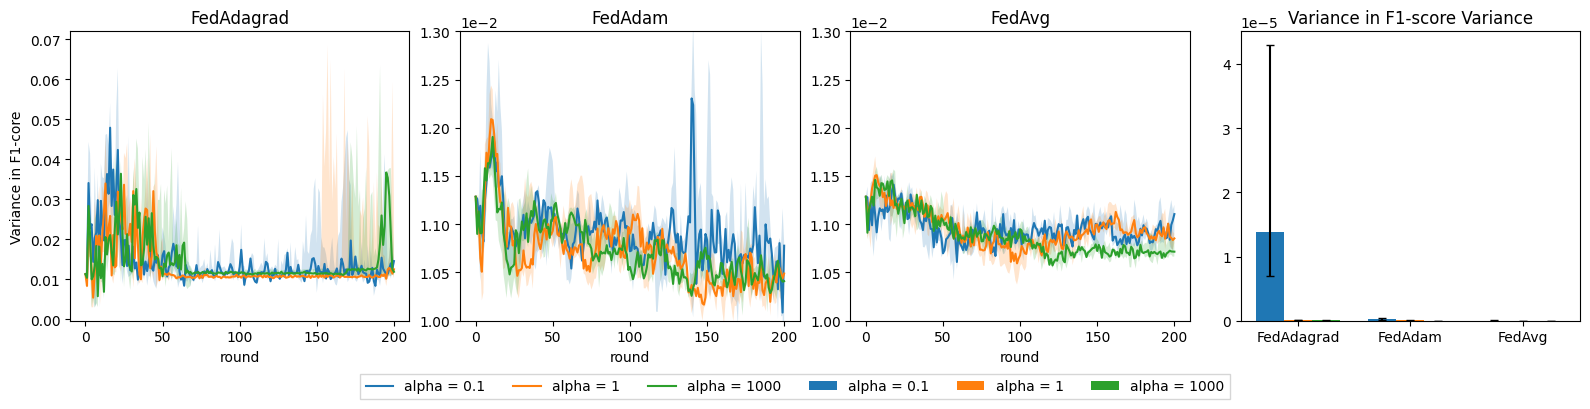

In [1270]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Variance in F1-score Variance")
axs[0].set_ylabel("Variance in F1-core")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_f1_var_stacked = np.array(
    [ada_c01_run1_f1_var, ada_c01_run2_f1_var, ada_c01_run3_f1_var]
)
axs[0].plot(np.median(ada_c01_f1_var_stacked, axis=0), label="alpha = 0.1")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c01_f1_var_stacked, axis=0),
    np.min(ada_c01_f1_var_stacked, axis=0),
    alpha=0.2,
)

ada_c1_f1_var_stacked = np.array(
    [ada_c1_run1_f1_var, ada_c1_run2_f1_var, ada_c1_run3_f1_var]
)
axs[0].plot(np.median(ada_c1_f1_var_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c1_f1_var_stacked, axis=0),
    np.min(ada_c1_f1_var_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_f1_var_stacked = np.array(
    [ada_c1000_run1_f1_var, ada_c1000_run2_f1_var, ada_c1000_run3_f1_var]
)
axs[0].plot(np.median(ada_c1000_f1_var_stacked, axis=0), label="alpha = 1000")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c1000_f1_var_stacked, axis=0),
    np.min(ada_c1000_f1_var_stacked, axis=0),
    alpha=0.2,
)

adam_c01_f1_var_stacked = np.array(
    [adam_c01_run1_f1_var, adam_c01_run2_f1_var, adam_c01_run3_f1_var]
)
axs[1].plot(np.median(adam_c01_f1_var_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c01_f1_var_stacked, axis=0),
    np.min(adam_c01_f1_var_stacked, axis=0),
    alpha=0.2,
)

adam_c1_f1_var_stacked = np.array(
    [adam_c1_run1_f1_var, adam_c1_run2_f1_var, adam_c1_run3_f1_var]
)
axs[1].plot(np.median(adam_c1_f1_var_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c1_f1_var_stacked, axis=0),
    np.min(adam_c1_f1_var_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_f1_var_stacked = np.array(
    [adam_c1000_run1_f1_var, adam_c1000_run2_f1_var, adam_c1000_run3_f1_var]
)
axs[1].plot(np.median(adam_c1000_f1_var_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c1000_f1_var_stacked, axis=0),
    np.min(adam_c1000_f1_var_stacked, axis=0),
    alpha=0.2,
)

avg_c01_f1_var_stacked = np.array(
    [avg_c01_run1_f1_var, avg_c01_run2_f1_var, avg_c01_run3_f1_var]
)
axs[2].plot(np.median(avg_c01_f1_var_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c01_f1_var_stacked, axis=0),
    np.min(avg_c01_f1_var_stacked, axis=0),
    alpha=0.2,
)

avg_c1_f1_var_stacked = np.array(
    [avg_c1_run1_f1_var, avg_c1_run2_f1_var, avg_c1_run3_f1_var]
)
axs[2].plot(np.median(avg_c1_f1_var_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c1_f1_var_stacked, axis=0),
    np.min(avg_c1_f1_var_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_f1_var_stacked = np.array(
    [avg_c1000_run1_f1_var, avg_c1000_run2_f1_var, avg_c1000_run3_f1_var]
)
axs[2].plot(np.median(avg_c1000_f1_var_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c1000_f1_var_stacked, axis=0),
    np.min(avg_c1000_f1_var_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_f1_var_stacked_var = np.var(ada_c01_f1_var_stacked[:, 126:151], axis=-1)
ada_c1_f1_var_stacked_var = np.var(ada_c1_f1_var_stacked[:, 126:151], axis=-1)
ada_c1000_f1_var_stacked_var = np.var(ada_c1000_f1_var_stacked[:, 126:151], axis=-1)

adam_c01_f1_var_stacked_var = np.var(adam_c01_f1_var_stacked[:, 176:201], axis=-1)
adam_c1_f1_var_stacked_var = np.var(adam_c1_f1_var_stacked[:, 176:201], axis=-1)
adam_c1000_f1_var_stacked_var = np.var(adam_c1000_f1_var_stacked[:, 176:201], axis=-1)

avg_c01_f1_var_stacked_var = np.var(avg_c01_f1_var_stacked[:, 176:201], axis=-1)
avg_c1_f1_var_stacked_var = np.var(avg_c1_f1_var_stacked[:, 176:201], axis=-1)
avg_c1000_f1_var_stacked_var = np.var(avg_c1000_f1_var_stacked[:, 176:201], axis=-1)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

f1_var = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_f1_var_stacked_var),
            np.median(adam_c01_f1_var_stacked_var),
            np.median(avg_c01_f1_var_stacked_var),
        ],
        [
            ada_c01_f1_var_stacked_var.min(),
            adam_c01_f1_var_stacked_var.min(),
            avg_c01_f1_var_stacked_var.min(),
        ],
        [
            ada_c01_f1_var_stacked_var.max(),
            adam_c01_f1_var_stacked_var.max(),
            avg_c01_f1_var_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_f1_var_stacked_var),
            np.median(adam_c1_f1_var_stacked_var),
            np.median(avg_c1_f1_var_stacked_var),
        ],
        [
            ada_c1_f1_var_stacked_var.min(),
            adam_c1_f1_var_stacked_var.min(),
            avg_c1_f1_var_stacked_var.min(),
        ],
        [
            ada_c1_f1_var_stacked_var.max(),
            adam_c1_f1_var_stacked_var.max(),
            avg_c1_f1_var_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_f1_var_stacked_var),
            np.median(adam_c1000_f1_var_stacked_var),
            np.median(avg_c1000_f1_var_stacked_var),
        ],
        [
            ada_c1000_f1_var_stacked_var.min(),
            adam_c1000_f1_var_stacked_var.min(),
            avg_c1000_f1_var_stacked_var.min(),
        ],
        [
            ada_c1000_f1_var_stacked_var.max(),
            adam_c1000_f1_var_stacked_var.max(),
            avg_c1000_f1_var_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in f1_var.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0.01, 0.013)
plt.setp([axs[1:3]], ylim=custom_ylim)
# custom_ylim = (0, 0.0000005)
# plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.03), fancybox=False, shadow=False, ncol=6
)
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


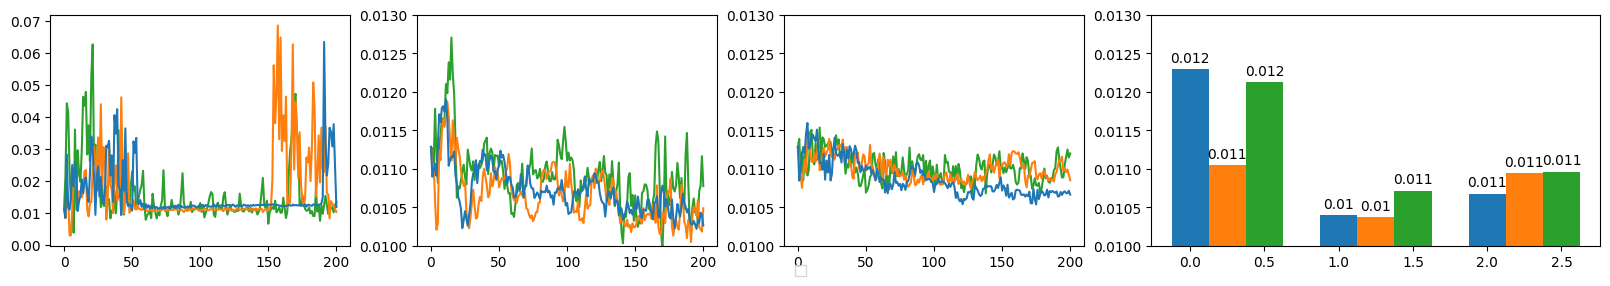

In [903]:
fig, axs = plt.subplots(1, 4, figsize=(20, 3), width_ratios=[2, 2, 2, 3])

axs[0].plot(ada_c1000_run2_f1_var, zorder=10)
axs[0].plot(ada_c1_run2_f1_var, zorder=5)
axs[0].plot(ada_c01_run2_f1_var, zorder=0)
axs[1].plot(adam_c1000_run2_f1_var, zorder=10)
axs[1].plot(adam_c1_run2_f1_var, zorder=5)
axs[1].plot(adam_c01_run2_f1_var, zorder=0)
axs[2].plot(avg_c1000_run2_f1_var, zorder=10)
axs[2].plot(avg_c1_run2_f1_var, zorder=5)
axs[2].plot(avg_c01_run2_f1_var, zorder=0)

algorithms = ("FedAdam_B0.9", "FedAdam_B0.5", "FedAvg")
variance = {
    "alpha = 1000": (
        np.array(ada_c1000_run2_f1_var)[100:125].mean(),
        np.array(adam_c1000_run2_f1_var)[175:].mean(),
        np.array(avg_c1000_run2_f1_var)[175:].mean(),
    ),
    "alpha = 1": (
        np.array(ada_c1_run2_f1_var)[100:125].mean(),
        np.array(adam_c1_run2_f1_var)[175:].mean(),
        np.array(avg_c1_run2_f1_var)[175:].mean(),
    ),
    "alpha = 0.1": (
        np.array(ada_c01_run2_f1_var)[100:125].mean(),
        np.array(adam_c01_run2_f1_var)[175:].mean(),
        np.array(avg_c01_run2_f1_var)[175:].mean(),
    ),
}

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in variance.items():
    offset = width * multiplier
    rects = axs[3].bar(x + offset, measurement, width)
    # axs[3].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

custom_ylim = (0.01, 0.013)
plt.setp([axs[1:]], ylim=custom_ylim)

fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.07), fancybox=False, shadow=False, ncol=6
)
plt.show()

In [1042]:
ada_c1000_run1_random_activation = []
for random_activation in ada_c1000_run1["metrics_centralized"]["random_activation"]:
    ada_c1000_run1_random_activation.append(np.array(random_activation[1][0]).var())
ada_c1_run1_random_activation = []
for random_activation in ada_c1_run1["metrics_centralized"]["random_activation"]:
    ada_c1_run1_random_activation.append(np.array(random_activation[1][0]).var())
ada_c01_run1_random_activation = []
for random_activation in ada_c01_run1["metrics_centralized"]["random_activation"]:
    ada_c01_run1_random_activation.append(np.array(random_activation[1][0]).var())

adam_c1000_run1_random_activation = []
for random_activation in adam_c1000_run1["metrics_centralized"]["random_activation"]:
    adam_c1000_run1_random_activation.append(np.array(random_activation[1][0]).var())
adam_c1_run1_random_activation = []
for random_activation in adam_c1_run1["metrics_centralized"]["random_activation"]:
    adam_c1_run1_random_activation.append(np.array(random_activation[1][0]).var())
adam_c01_run1_random_activation = []
for random_activation in adam_c01_run1["metrics_centralized"]["random_activation"]:
    adam_c01_run1_random_activation.append(np.array(random_activation[1][0]).var())

avg_c1000_run1_random_activation = []
for random_activation in avg_c1000_run1["metrics_centralized"]["random_activation"]:
    avg_c1000_run1_random_activation.append(np.array(random_activation[1][0]).var())
avg_c1_run1_random_activation = []
for random_activation in avg_c1_run1["metrics_centralized"]["random_activation"]:
    avg_c1_run1_random_activation.append(np.array(random_activation[1][0]).var())
avg_c01_run1_random_activation = []
for random_activation in avg_c01_run1["metrics_centralized"]["random_activation"]:
    avg_c01_run1_random_activation.append(np.array(random_activation[1][0]).var())

ada_c1000_run2_random_activation = []
for random_activation in ada_c1000_run2["metrics_centralized"]["random_activation"]:
    ada_c1000_run2_random_activation.append(np.array(random_activation[1][0]).var())
ada_c1_run2_random_activation = []
for random_activation in ada_c1_run2["metrics_centralized"]["random_activation"]:
    ada_c1_run2_random_activation.append(np.array(random_activation[1][0]).var())
ada_c01_run2_random_activation = []
for random_activation in ada_c01_run2["metrics_centralized"]["random_activation"]:
    ada_c01_run2_random_activation.append(np.array(random_activation[1][0]).var())

adam_c1000_run2_random_activation = []
for random_activation in adam_c1000_run2["metrics_centralized"]["random_activation"]:
    adam_c1000_run2_random_activation.append(np.array(random_activation[1][0]).var())
adam_c1_run2_random_activation = []
for random_activation in adam_c1_run2["metrics_centralized"]["random_activation"]:
    adam_c1_run2_random_activation.append(np.array(random_activation[1][0]).var())
adam_c01_run2_random_activation = []
for random_activation in adam_c01_run2["metrics_centralized"]["random_activation"]:
    adam_c01_run2_random_activation.append(np.array(random_activation[1][0]).var())

avg_c1000_run2_random_activation = []
for random_activation in avg_c1000_run2["metrics_centralized"]["random_activation"]:
    avg_c1000_run2_random_activation.append(np.array(random_activation[1][0]).var())
avg_c1_run2_random_activation = []
for random_activation in avg_c1_run2["metrics_centralized"]["random_activation"]:
    avg_c1_run2_random_activation.append(np.array(random_activation[1][0]).var())
avg_c01_run2_random_activation = []
for random_activation in avg_c01_run2["metrics_centralized"]["random_activation"]:
    avg_c01_run2_random_activation.append(np.array(random_activation[1][0]).var())

ada_c1000_run3_random_activation = []
for random_activation in ada_c1000_run3["metrics_centralized"]["random_activation"]:
    ada_c1000_run3_random_activation.append(np.array(random_activation[1][0]).var())
ada_c1_run3_random_activation = []
for random_activation in ada_c1_run3["metrics_centralized"]["random_activation"]:
    ada_c1_run3_random_activation.append(np.array(random_activation[1][0]).var())
ada_c01_run3_random_activation = []
for random_activation in ada_c01_run3["metrics_centralized"]["random_activation"]:
    ada_c01_run3_random_activation.append(np.array(random_activation[1][0]).var())

adam_c1000_run3_random_activation = []
for random_activation in adam_c1000_run3["metrics_centralized"]["random_activation"]:
    adam_c1000_run3_random_activation.append(np.array(random_activation[1][0]).var())
adam_c1_run3_random_activation = []
for random_activation in adam_c1_run3["metrics_centralized"]["random_activation"]:
    adam_c1_run3_random_activation.append(np.array(random_activation[1][0]).var())
adam_c01_run3_random_activation = []
for random_activation in adam_c01_run3["metrics_centralized"]["random_activation"]:
    adam_c01_run3_random_activation.append(np.array(random_activation[1][0]).var())

avg_c1000_run3_random_activation = []
for random_activation in avg_c1000_run3["metrics_centralized"]["random_activation"]:
    avg_c1000_run3_random_activation.append(np.array(random_activation[1][0]).var())
avg_c1_run3_random_activation = []
for random_activation in avg_c1_run3["metrics_centralized"]["random_activation"]:
    avg_c1_run3_random_activation.append(np.array(random_activation[1][0]).var())
avg_c01_run3_random_activation = []
for random_activation in avg_c01_run3["metrics_centralized"]["random_activation"]:
    avg_c01_run3_random_activation.append(np.array(random_activation[1][0]).var())

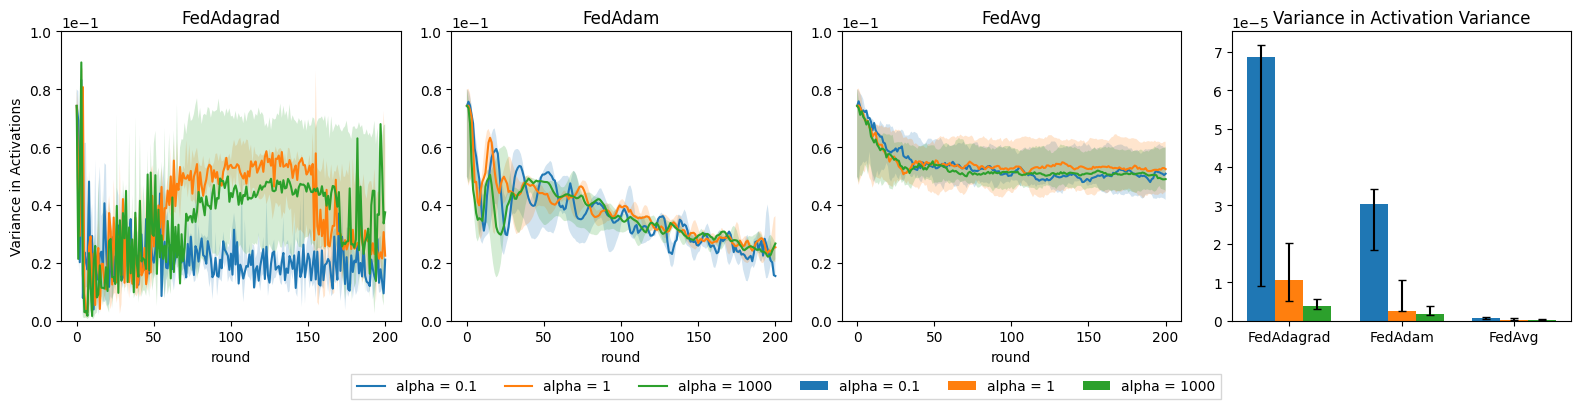

In [1299]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Variance in Activation Variance")
axs[0].set_ylabel("Variance in Activations")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_random_activation_stacked = np.array([
    ada_c01_run1_random_activation,
    ada_c01_run2_random_activation,
    ada_c01_run3_random_activation,
])
axs[0].plot(np.median(ada_c01_random_activation_stacked, axis=0), label="alpha = 0.1")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c01_random_activation_stacked, axis=0),
    np.min(ada_c01_random_activation_stacked, axis=0),
    alpha=0.2,
)

ada_c1_random_activation_stacked = np.array([
    ada_c1_run1_random_activation,
    ada_c1_run2_random_activation,
    ada_c1_run3_random_activation,
])
axs[0].plot(np.median(ada_c1_random_activation_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c1_random_activation_stacked, axis=0),
    np.min(ada_c1_random_activation_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_random_activation_stacked = np.array([
    ada_c1000_run1_random_activation,
    ada_c1000_run2_random_activation,
    ada_c1000_run3_random_activation,
])
axs[0].plot(
    np.median(ada_c1000_random_activation_stacked, axis=0), label="alpha = 1000"
)
axs[0].fill_between(
    [x for x in range(201)],
    np.max(ada_c1000_random_activation_stacked, axis=0),
    np.min(ada_c1000_random_activation_stacked, axis=0),
    alpha=0.2,
)

adam_c01_random_activation_stacked = np.array([
    adam_c01_run1_random_activation,
    adam_c01_run2_random_activation,
    adam_c01_run3_random_activation,
])
axs[1].plot(np.median(adam_c01_random_activation_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c01_random_activation_stacked, axis=0),
    np.min(adam_c01_random_activation_stacked, axis=0),
    alpha=0.2,
)

adam_c1_random_activation_stacked = np.array([
    adam_c1_run1_random_activation,
    adam_c1_run2_random_activation,
    adam_c1_run3_random_activation,
])
axs[1].plot(np.median(adam_c1_random_activation_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c1_random_activation_stacked, axis=0),
    np.min(adam_c1_random_activation_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_random_activation_stacked = np.array([
    adam_c1000_run1_random_activation,
    adam_c1000_run2_random_activation,
    adam_c1000_run3_random_activation,
])
axs[1].plot(np.median(adam_c1000_random_activation_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(201)],
    np.max(adam_c1000_random_activation_stacked, axis=0),
    np.min(adam_c1000_random_activation_stacked, axis=0),
    alpha=0.2,
)

avg_c01_random_activation_stacked = np.array([
    avg_c01_run1_random_activation,
    avg_c01_run2_random_activation,
    avg_c01_run3_random_activation,
])
axs[2].plot(np.median(avg_c01_random_activation_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c01_random_activation_stacked, axis=0),
    np.min(avg_c01_random_activation_stacked, axis=0),
    alpha=0.2,
)

avg_c1_random_activation_stacked = np.array([
    avg_c1_run1_random_activation,
    avg_c1_run2_random_activation,
    avg_c1_run3_random_activation,
])
axs[2].plot(np.median(avg_c1_random_activation_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c1_random_activation_stacked, axis=0),
    np.min(avg_c1_random_activation_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_random_activation_stacked = np.array([
    avg_c1000_run1_random_activation,
    avg_c1000_run2_random_activation,
    avg_c1000_run3_random_activation,
])
axs[2].plot(np.median(avg_c1000_random_activation_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(201)],
    np.max(avg_c1000_random_activation_stacked, axis=0),
    np.min(avg_c1000_random_activation_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_random_activation_stacked_var = np.var(
    ada_c01_random_activation_stacked[:, 126:151], axis=-1
)
ada_c1_random_activation_stacked_var = np.var(
    ada_c1_random_activation_stacked[:, 126:151], axis=-1
)
ada_c1000_random_activation_stacked_var = np.var(
    ada_c1000_random_activation_stacked[:, 126:151], axis=-1
)

adam_c01_random_activation_stacked_var = np.var(
    adam_c01_random_activation_stacked[:, 176:201], axis=-1
)
adam_c1_random_activation_stacked_var = np.var(
    adam_c1_random_activation_stacked[:, 176:201], axis=-1
)
adam_c1000_random_activation_stacked_var = np.var(
    adam_c1000_random_activation_stacked[:, 176:201], axis=-1
)

avg_c01_random_activation_stacked_var = np.var(
    avg_c01_random_activation_stacked[:, 176:201], axis=-1
)
avg_c1_random_activation_stacked_var = np.var(
    avg_c1_random_activation_stacked[:, 176:201], axis=-1
)
avg_c1000_random_activation_stacked_var = np.var(
    avg_c1000_random_activation_stacked[:, 176:201], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

random_activation = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_random_activation_stacked_var),
            np.median(adam_c01_random_activation_stacked_var),
            np.median(avg_c01_random_activation_stacked_var),
        ],
        [
            ada_c01_random_activation_stacked_var.min(),
            adam_c01_random_activation_stacked_var.min(),
            avg_c01_random_activation_stacked_var.min(),
        ],
        [
            ada_c01_random_activation_stacked_var.max(),
            adam_c01_random_activation_stacked_var.max(),
            avg_c01_random_activation_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_random_activation_stacked_var),
            np.median(adam_c1_random_activation_stacked_var),
            np.median(avg_c1_random_activation_stacked_var),
        ],
        [
            ada_c1_random_activation_stacked_var.min(),
            adam_c1_random_activation_stacked_var.min(),
            avg_c1_random_activation_stacked_var.min(),
        ],
        [
            ada_c1_random_activation_stacked_var.max(),
            adam_c1_random_activation_stacked_var.max(),
            avg_c1_random_activation_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_random_activation_stacked_var),
            np.median(adam_c1000_random_activation_stacked_var),
            np.median(avg_c1000_random_activation_stacked_var),
        ],
        [
            ada_c1000_random_activation_stacked_var.min(),
            adam_c1000_random_activation_stacked_var.min(),
            avg_c1000_random_activation_stacked_var.min(),
        ],
        [
            ada_c1000_random_activation_stacked_var.max(),
            adam_c1000_random_activation_stacked_var.max(),
            avg_c1000_random_activation_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in random_activation.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0, 0.1)
plt.setp([axs[:3]], ylim=custom_ylim)
# custom_ylim = (0, 0.0000006)
# plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.03), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

In [1055]:
from numpy import linalg as LA

ada_c1000_run1_random_activation_difference = []
for i in range(len(ada_c1000_run1["metrics_centralized"]["random_activation"]) - 1):
    ada_c1000_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c1000_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c1000_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

ada_c1_run1_random_activation_difference = []
for i in range(len(ada_c1_run1["metrics_centralized"]["random_activation"]) - 1):
    ada_c1_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c1_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c1_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

ada_c01_run1_random_activation_difference = []
for i in range(len(ada_c01_run1["metrics_centralized"]["random_activation"]) - 1):
    ada_c01_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c01_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c01_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c1000_run1_random_activation_difference = []
for i in range(len(adam_c1000_run1["metrics_centralized"]["random_activation"]) - 1):
    adam_c1000_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c1000_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c1000_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c1_run1_random_activation_difference = []
for i in range(len(adam_c1_run1["metrics_centralized"]["random_activation"]) - 1):
    adam_c1_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c1_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c1_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c01_run1_random_activation_difference = []
for i in range(len(adam_c01_run1["metrics_centralized"]["random_activation"]) - 1):
    adam_c01_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c01_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c01_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )


avg_c1000_run1_random_activation_difference = []
for i in range(len(avg_c1000_run1["metrics_centralized"]["random_activation"]) - 1):
    avg_c1000_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c1000_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c1000_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

avg_c1_run1_random_activation_difference = []
for i in range(len(avg_c1_run1["metrics_centralized"]["random_activation"]) - 1):
    avg_c1_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c1_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c1_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

avg_c01_run1_random_activation_difference = []
for i in range(len(avg_c01_run1["metrics_centralized"]["random_activation"]) - 1):
    avg_c01_run1_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c01_run1["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c01_run1["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )


ada_c1000_run2_random_activation_difference = []
for i in range(len(ada_c1000_run2["metrics_centralized"]["random_activation"]) - 1):
    ada_c1000_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c1000_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c1000_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

ada_c1_run2_random_activation_difference = []
for i in range(len(ada_c1_run2["metrics_centralized"]["random_activation"]) - 1):
    ada_c1_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c1_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c1_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

ada_c01_run2_random_activation_difference = []
for i in range(len(ada_c01_run2["metrics_centralized"]["random_activation"]) - 1):
    ada_c01_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c01_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c01_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c1000_run2_random_activation_difference = []
for i in range(len(adam_c1000_run2["metrics_centralized"]["random_activation"]) - 1):
    adam_c1000_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c1000_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c1000_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c1_run2_random_activation_difference = []
for i in range(len(adam_c1_run2["metrics_centralized"]["random_activation"]) - 1):
    adam_c1_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c1_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c1_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c01_run2_random_activation_difference = []
for i in range(len(adam_c01_run2["metrics_centralized"]["random_activation"]) - 1):
    adam_c01_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c01_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c01_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )


avg_c1000_run2_random_activation_difference = []
for i in range(len(avg_c1000_run2["metrics_centralized"]["random_activation"]) - 1):
    avg_c1000_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c1000_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c1000_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

avg_c1_run2_random_activation_difference = []
for i in range(len(avg_c1_run2["metrics_centralized"]["random_activation"]) - 1):
    avg_c1_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c1_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c1_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

avg_c01_run2_random_activation_difference = []
for i in range(len(avg_c01_run2["metrics_centralized"]["random_activation"]) - 1):
    avg_c01_run2_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c01_run2["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c01_run2["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )


ada_c1000_run3_random_activation_difference = []
for i in range(len(ada_c1000_run3["metrics_centralized"]["random_activation"]) - 1):
    ada_c1000_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c1000_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c1000_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

ada_c1_run3_random_activation_difference = []
for i in range(len(ada_c1_run3["metrics_centralized"]["random_activation"]) - 1):
    ada_c1_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c1_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c1_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

ada_c01_run3_random_activation_difference = []
for i in range(len(ada_c01_run3["metrics_centralized"]["random_activation"]) - 1):
    ada_c01_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                ada_c01_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                ada_c01_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c1000_run3_random_activation_difference = []
for i in range(len(adam_c1000_run3["metrics_centralized"]["random_activation"]) - 1):
    adam_c1000_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c1000_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c1000_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c1_run3_random_activation_difference = []
for i in range(len(adam_c1_run3["metrics_centralized"]["random_activation"]) - 1):
    adam_c1_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c1_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c1_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

adam_c01_run3_random_activation_difference = []
for i in range(len(adam_c01_run3["metrics_centralized"]["random_activation"]) - 1):
    adam_c01_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                adam_c01_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                adam_c01_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )


avg_c1000_run3_random_activation_difference = []
for i in range(len(avg_c1000_run3["metrics_centralized"]["random_activation"]) - 1):
    avg_c1000_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c1000_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c1000_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

avg_c1_run3_random_activation_difference = []
for i in range(len(avg_c1_run3["metrics_centralized"]["random_activation"]) - 1):
    avg_c1_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c1_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c1_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

avg_c01_run3_random_activation_difference = []
for i in range(len(avg_c01_run3["metrics_centralized"]["random_activation"]) - 1):
    avg_c01_run3_random_activation_difference.append(
        LA.norm(
            np.array(
                avg_c01_run3["metrics_centralized"]["random_activation"][i + 1][1][0]
            )
            - np.array(
                avg_c01_run3["metrics_centralized"]["random_activation"][i][1][0]
            ),
            2,
        )
    )

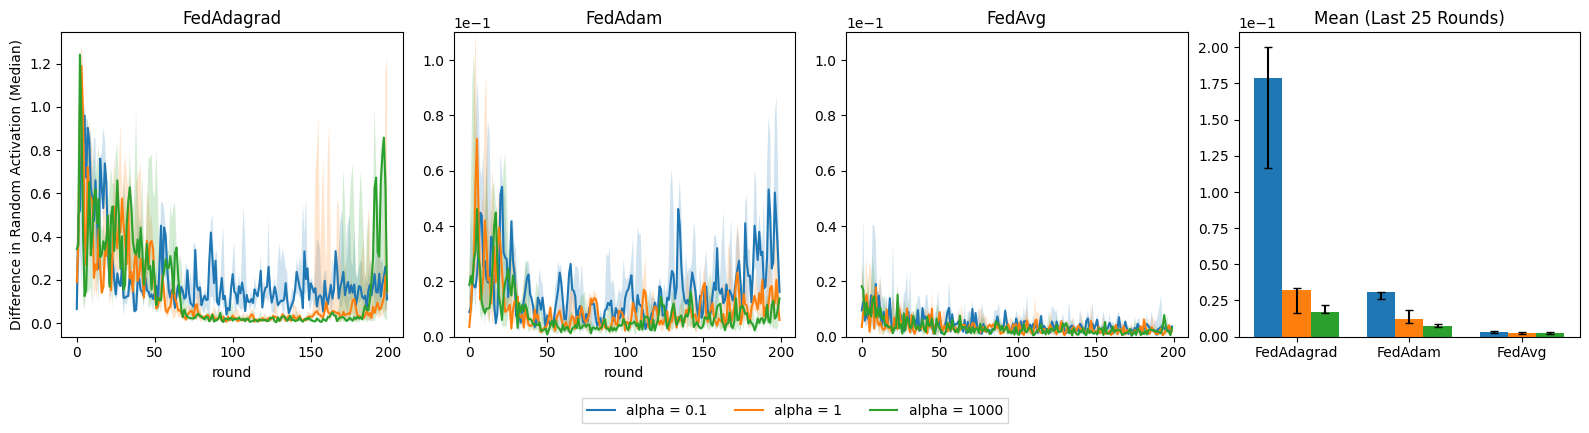

In [1059]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Mean (Last 25 Rounds)")
axs[0].set_ylabel("Difference in Random Activation (Median)")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_random_activation_difference_stacked = np.array([
    ada_c01_run1_random_activation_difference,
    ada_c01_run2_random_activation_difference,
    ada_c01_run3_random_activation_difference,
])
axs[0].plot(
    np.median(ada_c01_random_activation_difference_stacked, axis=0), label="alpha = 0.1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_random_activation_difference_stacked, axis=0),
    np.min(ada_c01_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

ada_c1_random_activation_difference_stacked = np.array([
    ada_c1_run1_random_activation_difference,
    ada_c1_run2_random_activation_difference,
    ada_c1_run3_random_activation_difference,
])
axs[0].plot(
    np.median(ada_c1_random_activation_difference_stacked, axis=0), label="alpha = 1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_random_activation_difference_stacked, axis=0),
    np.min(ada_c1_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_random_activation_difference_stacked = np.array([
    ada_c1000_run1_random_activation_difference,
    ada_c1000_run2_random_activation_difference,
    ada_c1000_run3_random_activation_difference,
])
axs[0].plot(
    np.median(ada_c1000_random_activation_difference_stacked, axis=0),
    label="alpha = 1000",
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_random_activation_difference_stacked, axis=0),
    np.min(ada_c1000_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

adam_c01_random_activation_difference_stacked = np.array([
    adam_c01_run1_random_activation_difference,
    adam_c01_run2_random_activation_difference,
    adam_c01_run3_random_activation_difference,
])
axs[1].plot(np.median(adam_c01_random_activation_difference_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_random_activation_difference_stacked, axis=0),
    np.min(adam_c01_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

adam_c1_random_activation_difference_stacked = np.array([
    adam_c1_run1_random_activation_difference,
    adam_c1_run2_random_activation_difference,
    adam_c1_run3_random_activation_difference,
])
axs[1].plot(np.median(adam_c1_random_activation_difference_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_random_activation_difference_stacked, axis=0),
    np.min(adam_c1_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_random_activation_difference_stacked = np.array([
    adam_c1000_run1_random_activation_difference,
    adam_c1000_run2_random_activation_difference,
    adam_c1000_run3_random_activation_difference,
])
axs[1].plot(np.median(adam_c1000_random_activation_difference_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_random_activation_difference_stacked, axis=0),
    np.min(adam_c1000_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

avg_c01_random_activation_difference_stacked = np.array([
    avg_c01_run1_random_activation_difference,
    avg_c01_run2_random_activation_difference,
    avg_c01_run3_random_activation_difference,
])
axs[2].plot(np.median(avg_c01_random_activation_difference_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_random_activation_difference_stacked, axis=0),
    np.min(avg_c01_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

avg_c1_random_activation_difference_stacked = np.array([
    avg_c1_run1_random_activation_difference,
    avg_c1_run2_random_activation_difference,
    avg_c1_run3_random_activation_difference,
])
axs[2].plot(np.median(avg_c1_random_activation_difference_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_random_activation_difference_stacked, axis=0),
    np.min(avg_c1_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_random_activation_difference_stacked = np.array([
    avg_c1000_run1_random_activation_difference,
    avg_c1000_run2_random_activation_difference,
    avg_c1000_run3_random_activation_difference,
])
axs[2].plot(np.median(avg_c1000_random_activation_difference_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_random_activation_difference_stacked, axis=0),
    np.min(avg_c1000_random_activation_difference_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_random_activation_difference_stacked_var = np.mean(
    ada_c01_random_activation_difference_stacked[:, 125:150], axis=-1
)
ada_c1_random_activation_difference_stacked_var = np.mean(
    ada_c1_random_activation_difference_stacked[:, 125:150], axis=-1
)
ada_c1000_random_activation_difference_stacked_var = np.mean(
    ada_c1000_random_activation_difference_stacked[:, 125:150], axis=-1
)

adam_c01_random_activation_difference_stacked_var = np.mean(
    adam_c01_random_activation_difference_stacked[:, 175:200], axis=-1
)
adam_c1_random_activation_difference_stacked_var = np.mean(
    adam_c1_random_activation_difference_stacked[:, 175:200], axis=-1
)
adam_c1000_random_activation_difference_stacked_var = np.mean(
    adam_c1000_random_activation_difference_stacked[:, 175:200], axis=-1
)

avg_c01_random_activation_difference_stacked_var = np.mean(
    avg_c01_random_activation_difference_stacked[:, 175:200], axis=-1
)
avg_c1_random_activation_difference_stacked_var = np.mean(
    avg_c1_random_activation_difference_stacked[:, 175:200], axis=-1
)
avg_c1000_random_activation_difference_stacked_var = np.mean(
    avg_c1000_random_activation_difference_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

random_activation_difference = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_random_activation_difference_stacked_var),
            np.median(adam_c01_random_activation_difference_stacked_var),
            np.median(avg_c01_random_activation_difference_stacked_var),
        ],
        [
            ada_c01_random_activation_difference_stacked_var.min(),
            adam_c01_random_activation_difference_stacked_var.min(),
            avg_c01_random_activation_difference_stacked_var.min(),
        ],
        [
            ada_c01_random_activation_difference_stacked_var.max(),
            adam_c01_random_activation_difference_stacked_var.max(),
            avg_c01_random_activation_difference_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_random_activation_difference_stacked_var),
            np.median(adam_c1_random_activation_difference_stacked_var),
            np.median(avg_c1_random_activation_difference_stacked_var),
        ],
        [
            ada_c1_random_activation_difference_stacked_var.min(),
            adam_c1_random_activation_difference_stacked_var.min(),
            avg_c1_random_activation_difference_stacked_var.min(),
        ],
        [
            ada_c1_random_activation_difference_stacked_var.max(),
            adam_c1_random_activation_difference_stacked_var.max(),
            avg_c1_random_activation_difference_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_random_activation_difference_stacked_var),
            np.median(adam_c1000_random_activation_difference_stacked_var),
            np.median(avg_c1000_random_activation_difference_stacked_var),
        ],
        [
            ada_c1000_random_activation_difference_stacked_var.min(),
            adam_c1000_random_activation_difference_stacked_var.min(),
            avg_c1000_random_activation_difference_stacked_var.min(),
        ],
        [
            ada_c1000_random_activation_difference_stacked_var.max(),
            adam_c1000_random_activation_difference_stacked_var.max(),
            avg_c1000_random_activation_difference_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in random_activation_difference.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0, 0.11)
plt.setp([axs[1:3]], ylim=custom_ylim)
# custom_ylim = (0, 0.0000006)
# plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

In [1064]:
ada_c1000_run1_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1000_run1["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    ada_c1000_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c1_run1_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1_run1["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c1_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c01_run1_kl_activation_mean_sum = []
for kl_activation_mean in ada_c01_run1["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c01_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

adam_c1000_run1_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1000_run1["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c1000_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c1_run1_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1_run1["metrics_distributed_fit"]["kl_activation_mean"]:
    adam_c1_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c01_run1_kl_activation_mean_sum = []
for kl_activation_mean in adam_c01_run1["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c01_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

avg_c1000_run1_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1000_run1["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    avg_c1000_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c1_run1_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1_run1["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c1_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c01_run1_kl_activation_mean_sum = []
for kl_activation_mean in avg_c01_run1["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c01_run1_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

ada_c1000_run2_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1000_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    ada_c1000_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c1_run2_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c1_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in ada_c01_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c01_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

adam_c1000_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1000_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c1000_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c1_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    adam_c1_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_c01_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c01_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

avg_c1000_run2_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1000_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    avg_c1000_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c1_run2_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c1_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in avg_c01_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c01_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

ada_c1000_run3_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1000_run3["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    ada_c1000_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c1_run3_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1_run3["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c1_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c01_run3_kl_activation_mean_sum = []
for kl_activation_mean in ada_c01_run3["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c01_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

adam_c1000_run3_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1000_run3["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c1000_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c1_run3_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1_run3["metrics_distributed_fit"]["kl_activation_mean"]:
    adam_c1_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c01_run3_kl_activation_mean_sum = []
for kl_activation_mean in adam_c01_run3["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c01_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

avg_c1000_run3_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1000_run3["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    avg_c1000_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c1_run3_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1_run3["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c1_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c01_run3_kl_activation_mean_sum = []
for kl_activation_mean in avg_c01_run3["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c01_run3_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

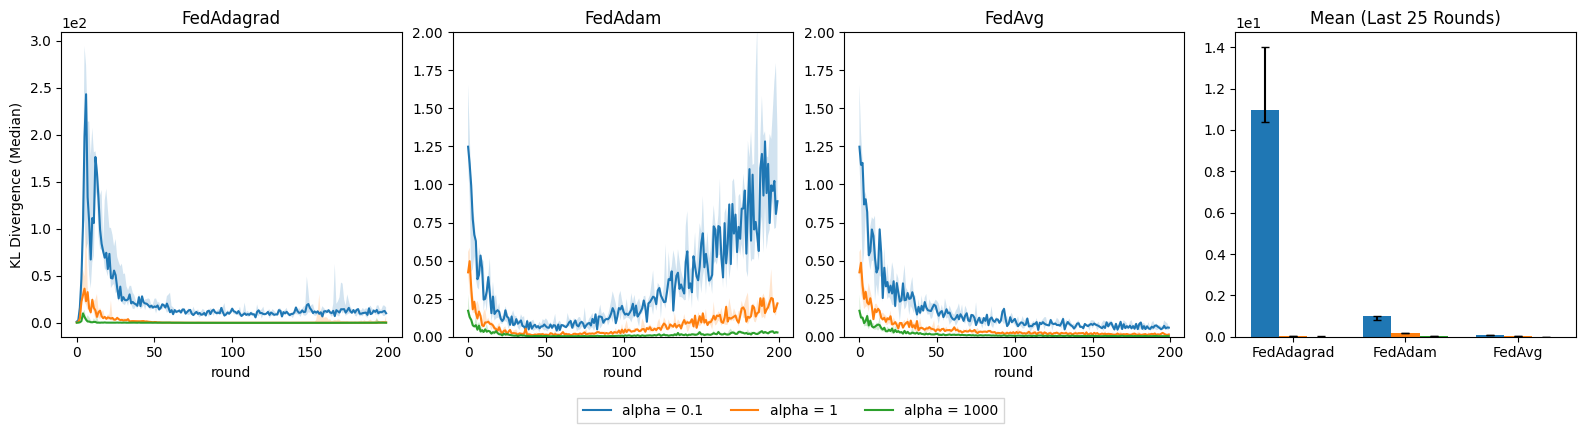

In [1085]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Mean (Last 25 Rounds)")
axs[0].set_ylabel("KL Divergence (Median)")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_kl_activation_mean_sum_stacked = np.array([
    ada_c01_run1_kl_activation_mean_sum,
    ada_c01_run2_kl_activation_mean_sum,
    ada_c01_run3_kl_activation_mean_sum,
])
axs[0].plot(
    np.median(ada_c01_kl_activation_mean_sum_stacked, axis=0), label="alpha = 0.1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_kl_activation_mean_sum_stacked, axis=0),
    np.min(ada_c01_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

ada_c1_kl_activation_mean_sum_stacked = np.array([
    ada_c1_run1_kl_activation_mean_sum,
    ada_c1_run2_kl_activation_mean_sum,
    ada_c1_run3_kl_activation_mean_sum,
])
axs[0].plot(np.median(ada_c1_kl_activation_mean_sum_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_kl_activation_mean_sum_stacked, axis=0),
    np.min(ada_c1_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_kl_activation_mean_sum_stacked = np.array([
    ada_c1000_run1_kl_activation_mean_sum,
    ada_c1000_run2_kl_activation_mean_sum,
    ada_c1000_run3_kl_activation_mean_sum,
])
axs[0].plot(
    np.median(ada_c1000_kl_activation_mean_sum_stacked, axis=0), label="alpha = 1000"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_kl_activation_mean_sum_stacked, axis=0),
    np.min(ada_c1000_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c01_kl_activation_mean_sum_stacked = np.array([
    adam_c01_run1_kl_activation_mean_sum,
    adam_c01_run2_kl_activation_mean_sum,
    adam_c01_run3_kl_activation_mean_sum,
])
axs[1].plot(np.median(adam_c01_kl_activation_mean_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_kl_activation_mean_sum_stacked, axis=0),
    np.min(adam_c01_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c1_kl_activation_mean_sum_stacked = np.array([
    adam_c1_run1_kl_activation_mean_sum,
    adam_c1_run2_kl_activation_mean_sum,
    adam_c1_run3_kl_activation_mean_sum,
])
axs[1].plot(np.median(adam_c1_kl_activation_mean_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_kl_activation_mean_sum_stacked, axis=0),
    np.min(adam_c1_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_kl_activation_mean_sum_stacked = np.array([
    adam_c1000_run1_kl_activation_mean_sum,
    adam_c1000_run2_kl_activation_mean_sum,
    adam_c1000_run3_kl_activation_mean_sum,
])
axs[1].plot(np.median(adam_c1000_kl_activation_mean_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_kl_activation_mean_sum_stacked, axis=0),
    np.min(adam_c1000_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c01_kl_activation_mean_sum_stacked = np.array([
    avg_c01_run1_kl_activation_mean_sum,
    avg_c01_run2_kl_activation_mean_sum,
    avg_c01_run3_kl_activation_mean_sum,
])
axs[2].plot(np.median(avg_c01_kl_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_kl_activation_mean_sum_stacked, axis=0),
    np.min(avg_c01_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c1_kl_activation_mean_sum_stacked = np.array([
    avg_c1_run1_kl_activation_mean_sum,
    avg_c1_run2_kl_activation_mean_sum,
    avg_c1_run3_kl_activation_mean_sum,
])
axs[2].plot(np.median(avg_c1_kl_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_kl_activation_mean_sum_stacked, axis=0),
    np.min(avg_c1_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_kl_activation_mean_sum_stacked = np.array([
    avg_c1000_run1_kl_activation_mean_sum,
    avg_c1000_run2_kl_activation_mean_sum,
    avg_c1000_run3_kl_activation_mean_sum,
])
axs[2].plot(np.median(avg_c1000_kl_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_kl_activation_mean_sum_stacked, axis=0),
    np.min(avg_c1000_kl_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_kl_activation_mean_sum_stacked_var = np.mean(
    ada_c01_kl_activation_mean_sum_stacked[:, 125:150], axis=-1
)
ada_c1_kl_activation_mean_sum_stacked_var = np.mean(
    ada_c1_kl_activation_mean_sum_stacked[:, 125:150], axis=-1
)
ada_c1000_kl_activation_mean_sum_stacked_var = np.mean(
    ada_c1000_kl_activation_mean_sum_stacked[:, 125:150], axis=-1
)

adam_c01_kl_activation_mean_sum_stacked_var = np.mean(
    adam_c01_kl_activation_mean_sum_stacked[:, 175:200], axis=-1
)
adam_c1_kl_activation_mean_sum_stacked_var = np.mean(
    adam_c1_kl_activation_mean_sum_stacked[:, 175:200], axis=-1
)
adam_c1000_kl_activation_mean_sum_stacked_var = np.mean(
    adam_c1000_kl_activation_mean_sum_stacked[:, 175:200], axis=-1
)

avg_c01_kl_activation_mean_sum_stacked_var = np.mean(
    avg_c01_kl_activation_mean_sum_stacked[:, 175:200], axis=-1
)
avg_c1_kl_activation_mean_sum_stacked_var = np.mean(
    avg_c1_kl_activation_mean_sum_stacked[:, 175:200], axis=-1
)
avg_c1000_kl_activation_mean_sum_stacked_var = np.mean(
    avg_c1000_kl_activation_mean_sum_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

kl_activation_mean_sum = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_kl_activation_mean_sum_stacked_var),
            np.median(adam_c01_kl_activation_mean_sum_stacked_var),
            np.median(avg_c01_kl_activation_mean_sum_stacked_var),
        ],
        [
            ada_c01_kl_activation_mean_sum_stacked_var.min(),
            adam_c01_kl_activation_mean_sum_stacked_var.min(),
            avg_c01_kl_activation_mean_sum_stacked_var.min(),
        ],
        [
            ada_c01_kl_activation_mean_sum_stacked_var.max(),
            adam_c01_kl_activation_mean_sum_stacked_var.max(),
            avg_c01_kl_activation_mean_sum_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_kl_activation_mean_sum_stacked_var),
            np.median(adam_c1_kl_activation_mean_sum_stacked_var),
            np.median(avg_c1_kl_activation_mean_sum_stacked_var),
        ],
        [
            ada_c1_kl_activation_mean_sum_stacked_var.min(),
            adam_c1_kl_activation_mean_sum_stacked_var.min(),
            avg_c1_kl_activation_mean_sum_stacked_var.min(),
        ],
        [
            ada_c1_kl_activation_mean_sum_stacked_var.max(),
            adam_c1_kl_activation_mean_sum_stacked_var.max(),
            avg_c1_kl_activation_mean_sum_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_kl_activation_mean_sum_stacked_var),
            np.median(adam_c1000_kl_activation_mean_sum_stacked_var),
            np.median(avg_c1000_kl_activation_mean_sum_stacked_var),
        ],
        [
            ada_c1000_kl_activation_mean_sum_stacked_var.min(),
            adam_c1000_kl_activation_mean_sum_stacked_var.min(),
            avg_c1000_kl_activation_mean_sum_stacked_var.min(),
        ],
        [
            ada_c1000_kl_activation_mean_sum_stacked_var.max(),
            adam_c1000_kl_activation_mean_sum_stacked_var.max(),
            avg_c1000_kl_activation_mean_sum_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in kl_activation_mean_sum.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0, 2)
plt.setp([axs[1:3]], ylim=custom_ylim)
# custom_ylim = (0, 0.0000006)
# plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


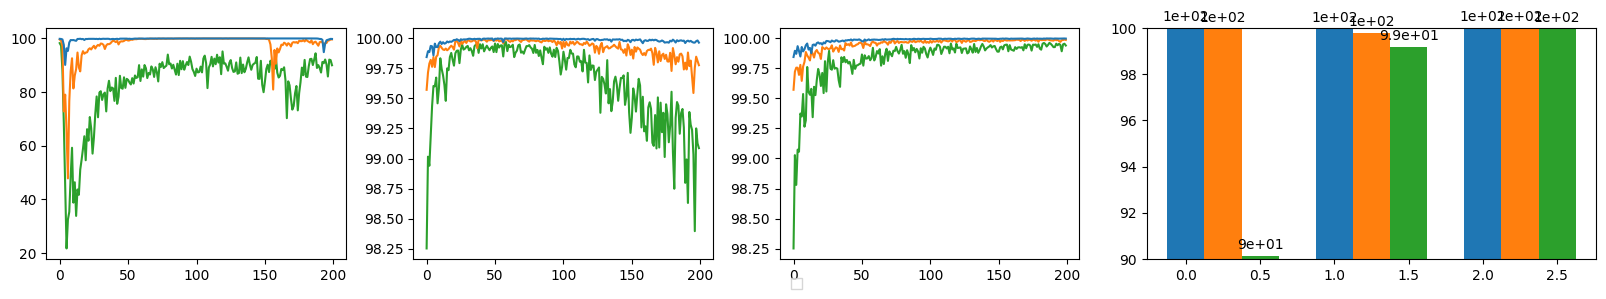

In [707]:
fig, axs = plt.subplots(1, 4, figsize=(20, 3), width_ratios=[2, 2, 2, 3])

axs[0].plot(ada_c1000_run2_cs_activation_mean_sum, zorder=10)
axs[0].plot(ada_c1_run2_cs_activation_mean_sum, zorder=5)
axs[0].plot(ada_c01_run2_cs_activation_mean_sum)
axs[1].plot(adam_c1000_run2_cs_activation_mean_sum, zorder=10)
axs[1].plot(adam_c1_run2_cs_activation_mean_sum, zorder=5)
axs[1].plot(adam_c01_run2_cs_activation_mean_sum)
axs[2].plot(avg_c1000_run2_cs_activation_mean_sum, zorder=10)
axs[2].plot(avg_c1_run2_cs_activation_mean_sum, zorder=5)
axs[2].plot(avg_c01_run2_cs_activation_mean_sum)


algorithms = ("FedAdam_B0.9", "FedAdam_B0.5", "FedAvg")
mean = {
    "alpha = 1000": (
        np.array(ada_c1000_run2_cs_activation_mean_sum)[100:125].mean(),
        np.array(adam_c1000_run2_cs_activation_mean_sum)[175:].mean(),
        np.array(avg_c1000_run2_cs_activation_mean_sum)[175:].mean(),
    ),
    "alpha = 1": (
        np.array(ada_c1_run2_cs_activation_mean_sum)[100:125].mean(),
        np.array(adam_c1_run2_cs_activation_mean_sum)[175:].mean(),
        np.array(avg_c1_run2_cs_activation_mean_sum)[175:].mean(),
    ),
    "alpha = 0.1": (
        np.array(ada_c01_run2_cs_activation_mean_sum)[100:125].mean(),
        np.array(adam_c01_run2_cs_activation_mean_sum)[175:].mean(),
        np.array(avg_c01_run2_cs_activation_mean_sum)[175:].mean(),
    ),
}

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in mean.items():
    offset = width * multiplier
    rects = axs[3].bar(x + offset, measurement, width)
    axs[3].bar_label(rects, padding=3, fmt="{:.2}")
    multiplier += 1

custom_ylim = (90, 100)
plt.setp([axs[-1:]], ylim=custom_ylim)

fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.07), fancybox=False, shadow=False, ncol=6
)
plt.show()

In [708]:
ada_c1000_run2_cs_activation_sum = []
for cs_activation in ada_c1000_run2["metrics_distributed_fit"]["cs_activation"]:
    ada_c1000_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())
ada_c1_run2_cs_activation_sum = []
for cs_activation in ada_c1_run2["metrics_distributed_fit"]["cs_activation"]:
    ada_c1_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())
ada_c01_run2_cs_activation_sum = []
for cs_activation in ada_c01_run2["metrics_distributed_fit"]["cs_activation"]:
    ada_c01_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())

adam_c1000_run2_cs_activation_sum = []
for cs_activation in adam_c1000_run2["metrics_distributed_fit"]["cs_activation"]:
    adam_c1000_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())
adam_c1_run2_cs_activation_sum = []
for cs_activation in adam_c1_run2["metrics_distributed_fit"]["cs_activation"]:
    adam_c1_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())
adam_c01_run2_cs_activation_sum = []
for cs_activation in adam_c01_run2["metrics_distributed_fit"]["cs_activation"]:
    adam_c01_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())

avg_c1000_run2_cs_activation_sum = []
for cs_activation in avg_c1000_run2["metrics_distributed_fit"]["cs_activation"]:
    avg_c1000_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())
avg_c1_run2_cs_activation_sum = []
for cs_activation in avg_c1_run2["metrics_distributed_fit"]["cs_activation"]:
    avg_c1_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())
avg_c01_run2_cs_activation_sum = []
for cs_activation in avg_c01_run2["metrics_distributed_fit"]["cs_activation"]:
    avg_c01_run2_cs_activation_sum.append(np.array(cs_activation[1]).sum())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


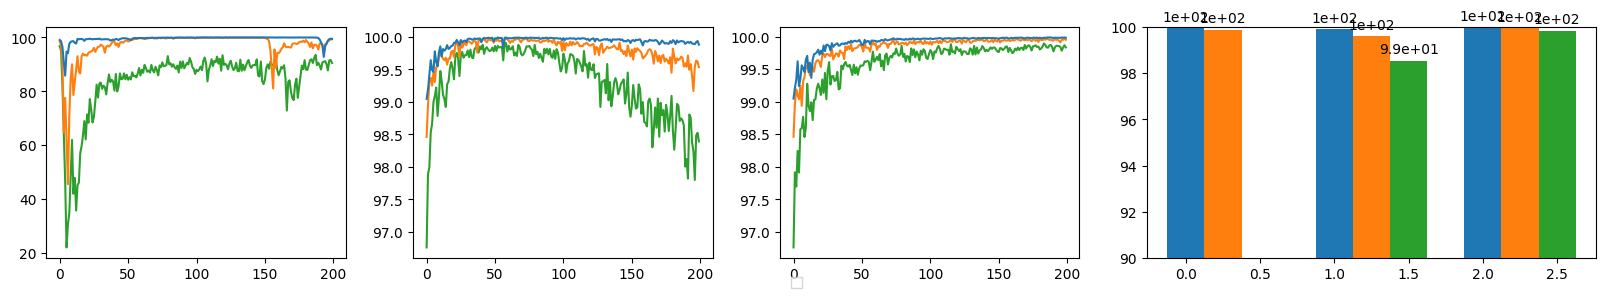

In [709]:
fig, axs = plt.subplots(1, 4, figsize=(20, 3), width_ratios=[2, 2, 2, 3])

axs[0].plot(ada_c1000_run2_cs_activation_sum, zorder=10)
axs[0].plot(ada_c1_run2_cs_activation_sum, zorder=5)
axs[0].plot(ada_c01_run2_cs_activation_sum)
axs[1].plot(adam_c1000_run2_cs_activation_sum, zorder=10)
axs[1].plot(adam_c1_run2_cs_activation_sum, zorder=5)
axs[1].plot(adam_c01_run2_cs_activation_sum)
axs[2].plot(avg_c1000_run2_cs_activation_sum, zorder=10)
axs[2].plot(avg_c1_run2_cs_activation_sum, zorder=5)
axs[2].plot(avg_c01_run2_cs_activation_sum)


algorithms = ("FedAdam_B0.9", "FedAdam_B0.5", "FedAvg")
mean = {
    "alpha = 1000": (
        np.array(ada_c1000_run2_cs_activation_sum)[100:125].mean(),
        np.array(adam_c1000_run2_cs_activation_sum)[175:].mean(),
        np.array(avg_c1000_run2_cs_activation_sum)[175:].mean(),
    ),
    "alpha = 1": (
        np.array(ada_c1_run2_cs_activation_sum)[100:125].mean(),
        np.array(adam_c1_run2_cs_activation_sum)[175:].mean(),
        np.array(avg_c1_run2_cs_activation_sum)[175:].mean(),
    ),
    "alpha = 0.1": (
        np.array(ada_c01_run2_cs_activation_sum)[100:125].mean(),
        np.array(adam_c01_run2_cs_activation_sum)[175:].mean(),
        np.array(avg_c01_run2_cs_activation_sum)[175:].mean(),
    ),
}

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in mean.items():
    offset = width * multiplier
    rects = axs[3].bar(x + offset, measurement, width)
    axs[3].bar_label(rects, padding=3, fmt="{:.2}")
    multiplier += 1

custom_ylim = (90, 100)
plt.setp([axs[-1:]], ylim=custom_ylim)

fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.07), fancybox=False, shadow=False, ncol=6
)
plt.show()

In [1080]:
ada_c1000_run1_kl_server_before_mean = []
for kl_server_before_mean in ada_c1000_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c1000_run1_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
ada_c1_run1_kl_server_before_mean = []
for kl_server_before_mean in ada_c1_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c1_run1_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
ada_c01_run1_kl_server_before_mean = []
for kl_server_before_mean in ada_c01_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c01_run1_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

adam_c1000_run1_kl_server_before_mean = []
for kl_server_before_mean in adam_c1000_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c1000_run1_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
adam_c1_run1_kl_server_before_mean = []
for kl_server_before_mean in adam_c1_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c1_run1_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
adam_c01_run1_kl_server_before_mean = []
for kl_server_before_mean in adam_c01_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c01_run1_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

avg_c1000_run1_kl_server_before_mean = []
for kl_server_before_mean in avg_c1000_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c1000_run1_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
avg_c1_run1_kl_server_before_mean = []
for kl_server_before_mean in avg_c1_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c1_run1_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
avg_c01_run1_kl_server_before_mean = []
for kl_server_before_mean in avg_c01_run1["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c01_run1_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())


ada_c1000_run3_kl_server_before_mean = []
for kl_server_before_mean in ada_c1000_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c1000_run3_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
ada_c1_run3_kl_server_before_mean = []
for kl_server_before_mean in ada_c1_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c1_run3_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
ada_c01_run3_kl_server_before_mean = []
for kl_server_before_mean in ada_c01_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c01_run3_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

adam_c1000_run3_kl_server_before_mean = []
for kl_server_before_mean in adam_c1000_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c1000_run3_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
adam_c1_run3_kl_server_before_mean = []
for kl_server_before_mean in adam_c1_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c1_run3_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
adam_c01_run3_kl_server_before_mean = []
for kl_server_before_mean in adam_c01_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c01_run3_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

avg_c1000_run3_kl_server_before_mean = []
for kl_server_before_mean in avg_c1000_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c1000_run3_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
avg_c1_run3_kl_server_before_mean = []
for kl_server_before_mean in avg_c1_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c1_run3_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
avg_c01_run3_kl_server_before_mean = []
for kl_server_before_mean in avg_c01_run3["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c01_run3_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())


ada_c1000_run2_kl_server_before_mean = []
for kl_server_before_mean in ada_c1000_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c1000_run2_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
ada_c1_run2_kl_server_before_mean = []
for kl_server_before_mean in ada_c1_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c1_run2_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
ada_c01_run2_kl_server_before_mean = []
for kl_server_before_mean in ada_c01_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    ada_c01_run2_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

adam_c1000_run2_kl_server_before_mean = []
for kl_server_before_mean in adam_c1000_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c1000_run2_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
adam_c1_run2_kl_server_before_mean = []
for kl_server_before_mean in adam_c1_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c1_run2_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
adam_c01_run2_kl_server_before_mean = []
for kl_server_before_mean in adam_c01_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    adam_c01_run2_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

avg_c1000_run2_kl_server_before_mean = []
for kl_server_before_mean in avg_c1000_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c1000_run2_kl_server_before_mean.append(
        np.array(kl_server_before_mean[1]).sum()
    )
avg_c1_run2_kl_server_before_mean = []
for kl_server_before_mean in avg_c1_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c1_run2_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())
avg_c01_run2_kl_server_before_mean = []
for kl_server_before_mean in avg_c01_run2["metrics_distributed_fit"][
    "kl_server_before_mean"
]:
    avg_c01_run2_kl_server_before_mean.append(np.array(kl_server_before_mean[1]).sum())

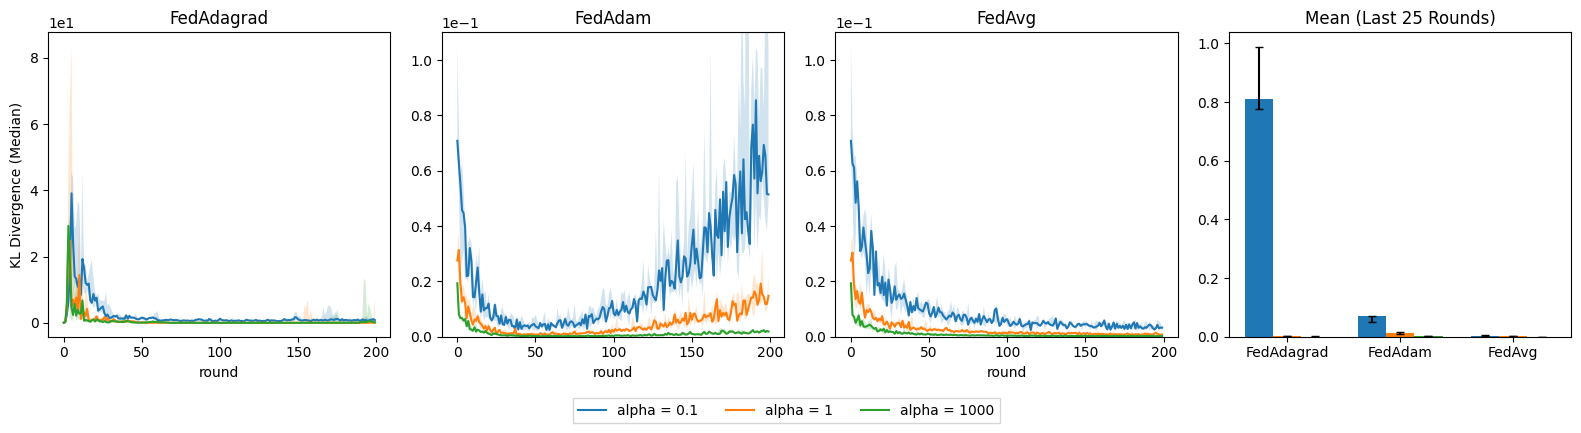

In [1086]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Mean (Last 25 Rounds)")
axs[0].set_ylabel("KL Divergence (Median)")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_kl_server_before_mean_stacked = np.array([
    ada_c01_run1_kl_server_before_mean,
    ada_c01_run2_kl_server_before_mean,
    ada_c01_run3_kl_server_before_mean,
])
axs[0].plot(
    np.median(ada_c01_kl_server_before_mean_stacked, axis=0), label="alpha = 0.1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_kl_server_before_mean_stacked, axis=0),
    np.min(ada_c01_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

ada_c1_kl_server_before_mean_stacked = np.array([
    ada_c1_run1_kl_server_before_mean,
    ada_c1_run2_kl_server_before_mean,
    ada_c1_run3_kl_server_before_mean,
])
axs[0].plot(np.median(ada_c1_kl_server_before_mean_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_kl_server_before_mean_stacked, axis=0),
    np.min(ada_c1_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_kl_server_before_mean_stacked = np.array([
    ada_c1000_run1_kl_server_before_mean,
    ada_c1000_run2_kl_server_before_mean,
    ada_c1000_run3_kl_server_before_mean,
])
axs[0].plot(
    np.median(ada_c1000_kl_server_before_mean_stacked, axis=0), label="alpha = 1000"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_kl_server_before_mean_stacked, axis=0),
    np.min(ada_c1000_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c01_kl_server_before_mean_stacked = np.array([
    adam_c01_run1_kl_server_before_mean,
    adam_c01_run2_kl_server_before_mean,
    adam_c01_run3_kl_server_before_mean,
])
axs[1].plot(np.median(adam_c01_kl_server_before_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_kl_server_before_mean_stacked, axis=0),
    np.min(adam_c01_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c1_kl_server_before_mean_stacked = np.array([
    adam_c1_run1_kl_server_before_mean,
    adam_c1_run2_kl_server_before_mean,
    adam_c1_run3_kl_server_before_mean,
])
axs[1].plot(np.median(adam_c1_kl_server_before_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_kl_server_before_mean_stacked, axis=0),
    np.min(adam_c1_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_kl_server_before_mean_stacked = np.array([
    adam_c1000_run1_kl_server_before_mean,
    adam_c1000_run2_kl_server_before_mean,
    adam_c1000_run3_kl_server_before_mean,
])
axs[1].plot(np.median(adam_c1000_kl_server_before_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_kl_server_before_mean_stacked, axis=0),
    np.min(adam_c1000_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c01_kl_server_before_mean_stacked = np.array([
    avg_c01_run1_kl_server_before_mean,
    avg_c01_run2_kl_server_before_mean,
    avg_c01_run3_kl_server_before_mean,
])
axs[2].plot(np.median(avg_c01_kl_server_before_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_kl_server_before_mean_stacked, axis=0),
    np.min(avg_c01_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c1_kl_server_before_mean_stacked = np.array([
    avg_c1_run1_kl_server_before_mean,
    avg_c1_run2_kl_server_before_mean,
    avg_c1_run3_kl_server_before_mean,
])
axs[2].plot(np.median(avg_c1_kl_server_before_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_kl_server_before_mean_stacked, axis=0),
    np.min(avg_c1_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_kl_server_before_mean_stacked = np.array([
    avg_c1000_run1_kl_server_before_mean,
    avg_c1000_run2_kl_server_before_mean,
    avg_c1000_run3_kl_server_before_mean,
])
axs[2].plot(np.median(avg_c1000_kl_server_before_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_kl_server_before_mean_stacked, axis=0),
    np.min(avg_c1000_kl_server_before_mean_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_kl_server_before_mean_stacked_var = np.mean(
    ada_c01_kl_server_before_mean_stacked[:, 125:150], axis=-1
)
ada_c1_kl_server_before_mean_stacked_var = np.mean(
    ada_c1_kl_server_before_mean_stacked[:, 125:150], axis=-1
)
ada_c1000_kl_server_before_mean_stacked_var = np.mean(
    ada_c1000_kl_server_before_mean_stacked[:, 125:150], axis=-1
)

adam_c01_kl_server_before_mean_stacked_var = np.mean(
    adam_c01_kl_server_before_mean_stacked[:, 175:200], axis=-1
)
adam_c1_kl_server_before_mean_stacked_var = np.mean(
    adam_c1_kl_server_before_mean_stacked[:, 175:200], axis=-1
)
adam_c1000_kl_server_before_mean_stacked_var = np.mean(
    adam_c1000_kl_server_before_mean_stacked[:, 175:200], axis=-1
)

avg_c01_kl_server_before_mean_stacked_var = np.mean(
    avg_c01_kl_server_before_mean_stacked[:, 175:200], axis=-1
)
avg_c1_kl_server_before_mean_stacked_var = np.mean(
    avg_c1_kl_server_before_mean_stacked[:, 175:200], axis=-1
)
avg_c1000_kl_server_before_mean_stacked_var = np.mean(
    avg_c1000_kl_server_before_mean_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

kl_server_before_mean = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_kl_server_before_mean_stacked_var),
            np.median(adam_c01_kl_server_before_mean_stacked_var),
            np.median(avg_c01_kl_server_before_mean_stacked_var),
        ],
        [
            ada_c01_kl_server_before_mean_stacked_var.min(),
            adam_c01_kl_server_before_mean_stacked_var.min(),
            avg_c01_kl_server_before_mean_stacked_var.min(),
        ],
        [
            ada_c01_kl_server_before_mean_stacked_var.max(),
            adam_c01_kl_server_before_mean_stacked_var.max(),
            avg_c01_kl_server_before_mean_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_kl_server_before_mean_stacked_var),
            np.median(adam_c1_kl_server_before_mean_stacked_var),
            np.median(avg_c1_kl_server_before_mean_stacked_var),
        ],
        [
            ada_c1_kl_server_before_mean_stacked_var.min(),
            adam_c1_kl_server_before_mean_stacked_var.min(),
            avg_c1_kl_server_before_mean_stacked_var.min(),
        ],
        [
            ada_c1_kl_server_before_mean_stacked_var.max(),
            adam_c1_kl_server_before_mean_stacked_var.max(),
            avg_c1_kl_server_before_mean_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_kl_server_before_mean_stacked_var),
            np.median(adam_c1000_kl_server_before_mean_stacked_var),
            np.median(avg_c1000_kl_server_before_mean_stacked_var),
        ],
        [
            ada_c1000_kl_server_before_mean_stacked_var.min(),
            adam_c1000_kl_server_before_mean_stacked_var.min(),
            avg_c1000_kl_server_before_mean_stacked_var.min(),
        ],
        [
            ada_c1000_kl_server_before_mean_stacked_var.max(),
            adam_c1000_kl_server_before_mean_stacked_var.max(),
            avg_c1000_kl_server_before_mean_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in kl_server_before_mean.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0, 0.11)
plt.setp([axs[1:3]], ylim=custom_ylim)
# custom_ylim = (0, 0.0000006)
# plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

In [1284]:
ada_c1000_run1_cs_gradient_sum = []
for cs_gradients in ada_c1000_run1["metrics_distributed_fit"]["cs_gradients"]:
    ada_c1000_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
ada_c1_run1_cs_gradient_sum = []
for cs_gradients in ada_c1_run1["metrics_distributed_fit"]["cs_gradients"]:
    ada_c1_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
ada_c01_run1_cs_gradient_sum = []
for cs_gradients in ada_c01_run1["metrics_distributed_fit"]["cs_gradients"]:
    ada_c01_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

adam_c1000_run1_cs_gradient_sum = []
for cs_gradients in adam_c1000_run1["metrics_distributed_fit"]["cs_gradients"]:
    adam_c1000_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_c1_run1_cs_gradient_sum = []
for cs_gradients in adam_c1_run1["metrics_distributed_fit"]["cs_gradients"]:
    adam_c1_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_c01_run1_cs_gradient_sum = []
for cs_gradients in adam_c01_run1["metrics_distributed_fit"]["cs_gradients"]:
    adam_c01_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

avg_c1000_run1_cs_gradient_sum = []
for cs_gradients in avg_c1000_run1["metrics_distributed_fit"]["cs_gradients"]:
    avg_c1000_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
avg_c1_run1_cs_gradient_sum = []
for cs_gradients in avg_c1_run1["metrics_distributed_fit"]["cs_gradients"]:
    avg_c1_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
avg_c01_run1_cs_gradient_sum = []
for cs_gradients in avg_c01_run1["metrics_distributed_fit"]["cs_gradients"]:
    avg_c01_run1_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)


ada_c1000_run3_cs_gradient_sum = []
for cs_gradients in ada_c1000_run3["metrics_distributed_fit"]["cs_gradients"]:
    ada_c1000_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
ada_c1_run3_cs_gradient_sum = []
for cs_gradients in ada_c1_run3["metrics_distributed_fit"]["cs_gradients"]:
    ada_c1_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
ada_c01_run3_cs_gradient_sum = []
for cs_gradients in ada_c01_run3["metrics_distributed_fit"]["cs_gradients"]:
    ada_c01_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

adam_c1000_run3_cs_gradient_sum = []
for cs_gradients in adam_c1000_run3["metrics_distributed_fit"]["cs_gradients"]:
    adam_c1000_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_c1_run3_cs_gradient_sum = []
for cs_gradients in adam_c1_run3["metrics_distributed_fit"]["cs_gradients"]:
    adam_c1_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_c01_run3_cs_gradient_sum = []
for cs_gradients in adam_c01_run3["metrics_distributed_fit"]["cs_gradients"]:
    adam_c01_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

avg_c1000_run3_cs_gradient_sum = []
for cs_gradients in avg_c1000_run3["metrics_distributed_fit"]["cs_gradients"]:
    avg_c1000_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
avg_c1_run3_cs_gradient_sum = []
for cs_gradients in avg_c1_run3["metrics_distributed_fit"]["cs_gradients"]:
    avg_c1_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
avg_c01_run3_cs_gradient_sum = []
for cs_gradients in avg_c01_run3["metrics_distributed_fit"]["cs_gradients"]:
    avg_c01_run3_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)


ada_c1000_run2_cs_gradient_sum = []
for cs_gradients in ada_c1000_run2["metrics_distributed_fit"]["cs_gradients"]:
    ada_c1000_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
ada_c1_run2_cs_gradient_sum = []
for cs_gradients in ada_c1_run2["metrics_distributed_fit"]["cs_gradients"]:
    ada_c1_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
ada_c01_run2_cs_gradient_sum = []
for cs_gradients in ada_c01_run2["metrics_distributed_fit"]["cs_gradients"]:
    ada_c01_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

adam_c1000_run2_cs_gradient_sum = []
for cs_gradients in adam_c1000_run2["metrics_distributed_fit"]["cs_gradients"]:
    adam_c1000_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_c1_run2_cs_gradient_sum = []
for cs_gradients in adam_c1_run2["metrics_distributed_fit"]["cs_gradients"]:
    adam_c1_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
adam_c01_run2_cs_gradient_sum = []
for cs_gradients in adam_c01_run2["metrics_distributed_fit"]["cs_gradients"]:
    adam_c01_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

avg_c1000_run2_cs_gradient_sum = []
for cs_gradients in avg_c1000_run2["metrics_distributed_fit"]["cs_gradients"]:
    avg_c1000_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
avg_c1_run2_cs_gradient_sum = []
for cs_gradients in avg_c1_run2["metrics_distributed_fit"]["cs_gradients"]:
    avg_c1_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)
avg_c01_run2_cs_gradient_sum = []
for cs_gradients in avg_c01_run2["metrics_distributed_fit"]["cs_gradients"]:
    avg_c01_run2_cs_gradient_sum.append((np.array(cs_gradients[1]).sum() - 10) / 90)

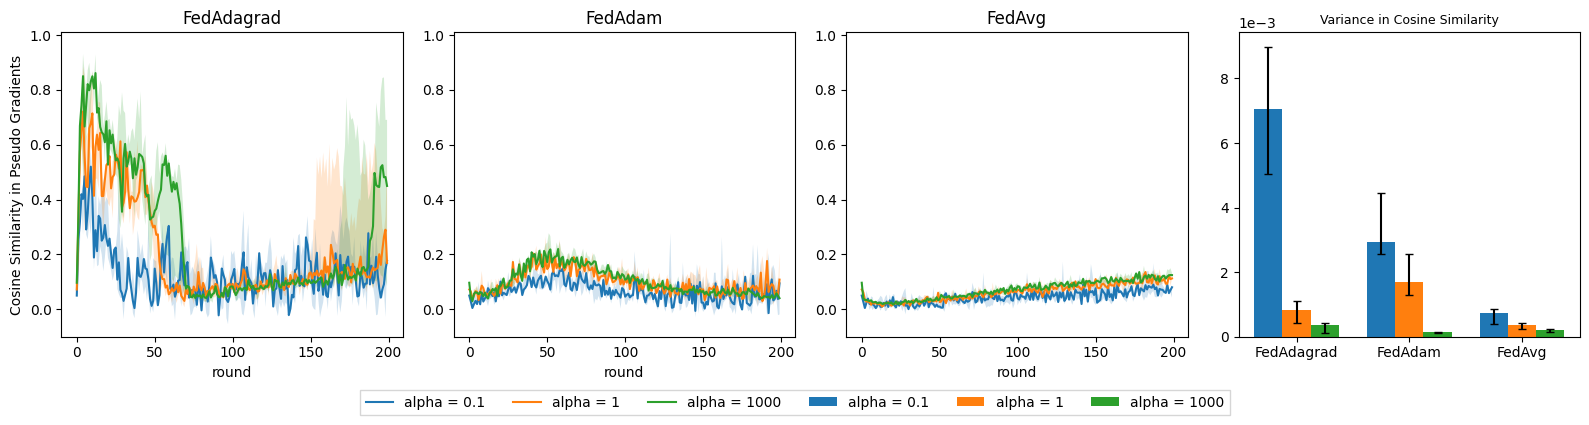

In [1374]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Variance in Cosine Similarity", fontsize=9)
axs[0].set_ylabel("Cosine Similarity in Pseudo Gradients")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_cs_gradient_sum_stacked = np.array([
    ada_c01_run1_cs_gradient_sum,
    ada_c01_run2_cs_gradient_sum,
    ada_c01_run3_cs_gradient_sum,
])
axs[0].plot(np.median(ada_c01_cs_gradient_sum_stacked, axis=0), label="alpha = 0.1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_cs_gradient_sum_stacked, axis=0),
    np.min(ada_c01_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

ada_c1_cs_gradient_sum_stacked = np.array([
    ada_c1_run1_cs_gradient_sum,
    ada_c1_run2_cs_gradient_sum,
    ada_c1_run3_cs_gradient_sum,
])
axs[0].plot(np.median(ada_c1_cs_gradient_sum_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_cs_gradient_sum_stacked, axis=0),
    np.min(ada_c1_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_cs_gradient_sum_stacked = np.array([
    ada_c1000_run1_cs_gradient_sum,
    ada_c1000_run2_cs_gradient_sum,
    ada_c1000_run3_cs_gradient_sum,
])
axs[0].plot(np.median(ada_c1000_cs_gradient_sum_stacked, axis=0), label="alpha = 1000")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_cs_gradient_sum_stacked, axis=0),
    np.min(ada_c1000_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c01_cs_gradient_sum_stacked = np.array([
    adam_c01_run1_cs_gradient_sum,
    adam_c01_run2_cs_gradient_sum,
    adam_c01_run3_cs_gradient_sum,
])
axs[1].plot(np.median(adam_c01_cs_gradient_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_cs_gradient_sum_stacked, axis=0),
    np.min(adam_c01_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c1_cs_gradient_sum_stacked = np.array([
    adam_c1_run1_cs_gradient_sum,
    adam_c1_run2_cs_gradient_sum,
    adam_c1_run3_cs_gradient_sum,
])
axs[1].plot(np.median(adam_c1_cs_gradient_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_cs_gradient_sum_stacked, axis=0),
    np.min(adam_c1_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_cs_gradient_sum_stacked = np.array([
    adam_c1000_run1_cs_gradient_sum,
    adam_c1000_run2_cs_gradient_sum,
    adam_c1000_run3_cs_gradient_sum,
])
axs[1].plot(np.median(adam_c1000_cs_gradient_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_cs_gradient_sum_stacked, axis=0),
    np.min(adam_c1000_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c01_cs_gradient_sum_stacked = np.array([
    avg_c01_run1_cs_gradient_sum,
    avg_c01_run2_cs_gradient_sum,
    avg_c01_run3_cs_gradient_sum,
])
axs[2].plot(np.median(avg_c01_cs_gradient_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_cs_gradient_sum_stacked, axis=0),
    np.min(avg_c01_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c1_cs_gradient_sum_stacked = np.array([
    avg_c1_run1_cs_gradient_sum,
    avg_c1_run2_cs_gradient_sum,
    avg_c1_run3_cs_gradient_sum,
])
axs[2].plot(np.median(avg_c1_cs_gradient_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_cs_gradient_sum_stacked, axis=0),
    np.min(avg_c1_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_cs_gradient_sum_stacked = np.array([
    avg_c1000_run1_cs_gradient_sum,
    avg_c1000_run2_cs_gradient_sum,
    avg_c1000_run3_cs_gradient_sum,
])
axs[2].plot(np.median(avg_c1000_cs_gradient_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_cs_gradient_sum_stacked, axis=0),
    np.min(avg_c1000_cs_gradient_sum_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_cs_gradient_sum_stacked_var = np.var(
    ada_c01_cs_gradient_sum_stacked[:, 125:150], axis=-1
)
ada_c1_cs_gradient_sum_stacked_var = np.var(
    ada_c1_cs_gradient_sum_stacked[:, 125:150], axis=-1
)
ada_c1000_cs_gradient_sum_stacked_var = np.var(
    ada_c1000_cs_gradient_sum_stacked[:, 125:150], axis=-1
)

adam_c01_cs_gradient_sum_stacked_var = np.var(
    adam_c01_cs_gradient_sum_stacked[:, 175:200], axis=-1
)
adam_c1_cs_gradient_sum_stacked_var = np.var(
    adam_c1_cs_gradient_sum_stacked[:, 175:200], axis=-1
)
adam_c1000_cs_gradient_sum_stacked_var = np.var(
    adam_c1000_cs_gradient_sum_stacked[:, 175:200], axis=-1
)

avg_c01_cs_gradient_sum_stacked_var = np.var(
    avg_c01_cs_gradient_sum_stacked[:, 175:200], axis=-1
)
avg_c1_cs_gradient_sum_stacked_var = np.var(
    avg_c1_cs_gradient_sum_stacked[:, 175:200], axis=-1
)
avg_c1000_cs_gradient_sum_stacked_var = np.var(
    avg_c1000_cs_gradient_sum_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

cs_gradient_sum = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_cs_gradient_sum_stacked_var),
            np.median(adam_c01_cs_gradient_sum_stacked_var),
            np.median(avg_c01_cs_gradient_sum_stacked_var),
        ],
        [
            ada_c01_cs_gradient_sum_stacked_var.min(),
            adam_c01_cs_gradient_sum_stacked_var.min(),
            avg_c01_cs_gradient_sum_stacked_var.min(),
        ],
        [
            ada_c01_cs_gradient_sum_stacked_var.max(),
            adam_c01_cs_gradient_sum_stacked_var.max(),
            avg_c01_cs_gradient_sum_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_cs_gradient_sum_stacked_var),
            np.median(adam_c1_cs_gradient_sum_stacked_var),
            np.median(avg_c1_cs_gradient_sum_stacked_var),
        ],
        [
            ada_c1_cs_gradient_sum_stacked_var.min(),
            adam_c1_cs_gradient_sum_stacked_var.min(),
            avg_c1_cs_gradient_sum_stacked_var.min(),
        ],
        [
            ada_c1_cs_gradient_sum_stacked_var.max(),
            adam_c1_cs_gradient_sum_stacked_var.max(),
            avg_c1_cs_gradient_sum_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_cs_gradient_sum_stacked_var),
            np.median(adam_c1000_cs_gradient_sum_stacked_var),
            np.median(avg_c1000_cs_gradient_sum_stacked_var),
        ],
        [
            ada_c1000_cs_gradient_sum_stacked_var.min(),
            adam_c1000_cs_gradient_sum_stacked_var.min(),
            avg_c1000_cs_gradient_sum_stacked_var.min(),
        ],
        [
            ada_c1000_cs_gradient_sum_stacked_var.max(),
            adam_c1000_cs_gradient_sum_stacked_var.max(),
            avg_c1000_cs_gradient_sum_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in cs_gradient_sum.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (-0.1, 1.01)
plt.setp([axs[:3]], ylim=custom_ylim)
# custom_ylim = (0, 0.0000006)
# plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.03), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

In [781]:
ada_c1000_run2_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1000_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    ada_c1000_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c1_run2_kl_activation_mean_sum = []
for kl_activation_mean in ada_c1_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c1_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
ada_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in ada_c01_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    ada_c01_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

adam_c1000_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1000_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c1000_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c1_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_c1_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    adam_c1_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
adam_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in adam_c01_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    adam_c01_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

avg_c1000_run2_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1000_run2["metrics_distributed_fit"][
    "kl_activation_mean"
]:
    avg_c1000_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c1_run2_kl_activation_mean_sum = []
for kl_activation_mean in avg_c1_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c1_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())
avg_c01_run2_kl_activation_mean_sum = []
for kl_activation_mean in avg_c01_run2["metrics_distributed_fit"]["kl_activation_mean"]:
    avg_c01_run2_kl_activation_mean_sum.append(np.array(kl_activation_mean[1]).sum())

/var/folders/8p/rl0cc1cx5h5301dxt0kcg54h0000gn/T/ipykernel_35772/3103816960.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


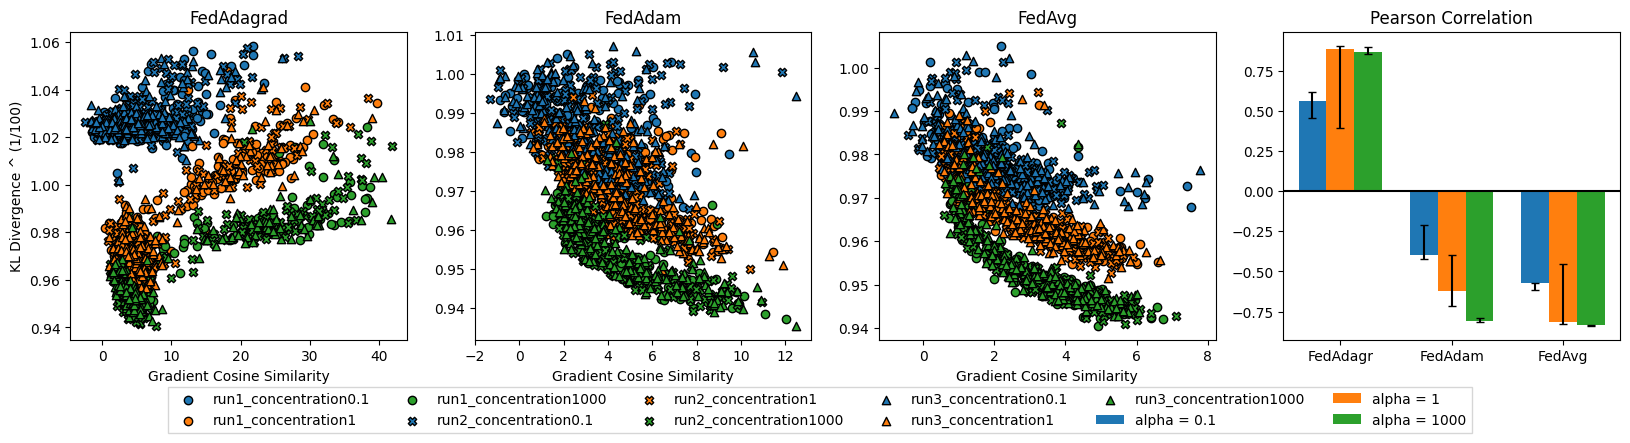

In [1172]:
from scipy.stats.stats import pearsonr

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Pearson Correlation")

axs[0].scatter(
    np.array(ada_c01_run2_cs_gradient_sum),
    np.array(ada_c01_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    label="run1_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run2_cs_gradient_sum),
    np.array(ada_c1_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    label="run1_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run2_cs_gradient_sum),
    np.array(ada_c1000_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    label="run1_concentration1000",
)


axs[0].scatter(
    np.array(ada_c01_run1_cs_gradient_sum),
    np.array(ada_c01_run1_kl_activation_mean_sum) ** (1 / 100),
    color="tab:blue",
    marker="X",
    edgecolor="black",
    label="run2_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run1_cs_gradient_sum),
    np.array(ada_c1_run1_kl_activation_mean_sum) ** (1 / 100),
    color="tab:orange",
    marker="X",
    edgecolor="black",
    label="run2_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run1_cs_gradient_sum),
    np.array(ada_c1000_run1_kl_activation_mean_sum) ** (1 / 100),
    color="tab:green",
    marker="X",
    edgecolor="black",
    label="run2_concentration1000",
)


axs[0].scatter(
    np.array(ada_c01_run3_cs_gradient_sum),
    np.array(ada_c01_run3_kl_activation_mean_sum) ** (1 / 100),
    color="tab:blue",
    marker="^",
    edgecolor="black",
    label="run3_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run3_cs_gradient_sum),
    np.array(ada_c1_run3_kl_activation_mean_sum) ** (1 / 100),
    color="tab:orange",
    marker="^",
    edgecolor="black",
    label="run3_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run3_cs_gradient_sum),
    np.array(ada_c1000_run3_kl_activation_mean_sum) ** (1 / 100),
    color="tab:green",
    marker="^",
    edgecolor="black",
    label="run3_concentration1000",
)


axs[1].scatter(
    np.array(adam_c01_run2_cs_gradient_sum),
    np.array(adam_c01_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
)
axs[1].scatter(
    np.array(adam_c1_run2_cs_gradient_sum),
    np.array(adam_c1_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
)
axs[1].scatter(
    np.array(adam_c1000_run2_cs_gradient_sum),
    np.array(adam_c1000_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
)

axs[1].scatter(
    np.array(adam_c01_run1_cs_gradient_sum),
    np.array(adam_c01_run1_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[1].scatter(
    np.array(adam_c1_run1_cs_gradient_sum),
    np.array(adam_c1_run1_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[1].scatter(
    np.array(adam_c1000_run1_cs_gradient_sum),
    np.array(adam_c1000_run1_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[1].scatter(
    np.array(adam_c01_run3_cs_gradient_sum),
    np.array(adam_c01_run3_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[1].scatter(
    np.array(adam_c1_run3_cs_gradient_sum),
    np.array(adam_c1_run3_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[1].scatter(
    np.array(adam_c1000_run3_cs_gradient_sum),
    np.array(adam_c1000_run3_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[2].scatter(
    np.array(avg_c01_run2_cs_gradient_sum),
    np.array(avg_c01_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
)
axs[2].scatter(
    np.array(avg_c1_run2_cs_gradient_sum),
    np.array(avg_c1_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
)
axs[2].scatter(
    np.array(avg_c1000_run2_cs_gradient_sum),
    np.array(avg_c1000_run2_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
)

axs[2].scatter(
    np.array(avg_c01_run1_cs_gradient_sum),
    np.array(avg_c01_run1_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[2].scatter(
    np.array(avg_c1_run1_cs_gradient_sum),
    np.array(avg_c1_run1_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[2].scatter(
    np.array(avg_c1000_run1_cs_gradient_sum),
    np.array(avg_c1000_run1_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[2].scatter(
    np.array(avg_c01_run3_cs_gradient_sum),
    np.array(avg_c01_run3_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[2].scatter(
    np.array(avg_c1_run3_cs_gradient_sum),
    np.array(avg_c1_run3_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[2].scatter(
    np.array(avg_c1000_run3_cs_gradient_sum),
    np.array(avg_c1000_run3_kl_activation_mean_sum) ** (1 / 100),
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[0].set_ylabel("KL Divergence ^ (1/100)")
axs[0].set_xlabel("Gradient Cosine Similarity")
axs[1].set_xlabel("Gradient Cosine Similarity")
axs[2].set_xlabel("Gradient Cosine Similarity")

algorithms = ("FedAdagr", "FedAdam", "FedAvg")

ada_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c01_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c01_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c01_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c01_run3_cs_gradient_sum),
    )[0],
])
ada_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c1_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c01_run3_cs_gradient_sum),
    )[0],
])
ada_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c1000_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1000_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1000_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(ada_c1000_run3_cs_gradient_sum),
    )[0],
])

adam_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c01_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c01_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c01_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c01_run3_cs_gradient_sum),
    )[0],
])
adam_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c1_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c01_run3_cs_gradient_sum),
    )[0],
])
adam_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c1000_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1000_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1000_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(adam_c1000_run3_cs_gradient_sum),
    )[0],
])

avg_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c01_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c01_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c01_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c01_run3_cs_gradient_sum),
    )[0],
])
avg_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c1_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c01_run3_cs_gradient_sum),
    )[0],
])
avg_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c1000_run1_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1000_run2_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1000_run3_kl_activation_mean_sum) ** (1 / 100),
        np.array(avg_c1000_run3_cs_gradient_sum),
    )[0],
])

corr = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_pearson_stacked),
            np.median(adam_c01_pearson_stacked),
            np.median(avg_c01_pearson_stacked),
        ],
        [
            ada_c01_pearson_stacked.min(),
            adam_c01_pearson_stacked.min(),
            avg_c01_pearson_stacked.min(),
        ],
        [
            ada_c01_pearson_stacked.max(),
            adam_c01_pearson_stacked.max(),
            avg_c01_pearson_stacked.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_pearson_stacked),
            np.median(adam_c1_pearson_stacked),
            np.median(avg_c1_pearson_stacked),
        ],
        [
            ada_c1_pearson_stacked.min(),
            adam_c1_pearson_stacked.min(),
            avg_c1_pearson_stacked.min(),
        ],
        [
            ada_c1_pearson_stacked.max(),
            adam_c1_pearson_stacked.max(),
            avg_c1_pearson_stacked.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_pearson_stacked),
            np.median(adam_c1000_pearson_stacked),
            np.median(avg_c1000_pearson_stacked),
        ],
        [
            ada_c1000_pearson_stacked.min(),
            adam_c1000_pearson_stacked.min(),
            avg_c1000_pearson_stacked.min(),
        ],
        [
            ada_c1000_pearson_stacked.max(),
            adam_c1000_pearson_stacked.max(),
            avg_c1000_pearson_stacked.max(),
        ],
    ]),
}

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in corr.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

# custom_ylim = (9, 10.2)
# plt.setp([axs], ylim=custom_ylim)
axs[3].set_xticks(x + width, algorithms)
axs[3].axhline(y=0, color="black", linestyle="-")

fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
plt.show()

/var/folders/8p/rl0cc1cx5h5301dxt0kcg54h0000gn/T/ipykernel_35772/3810166613.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


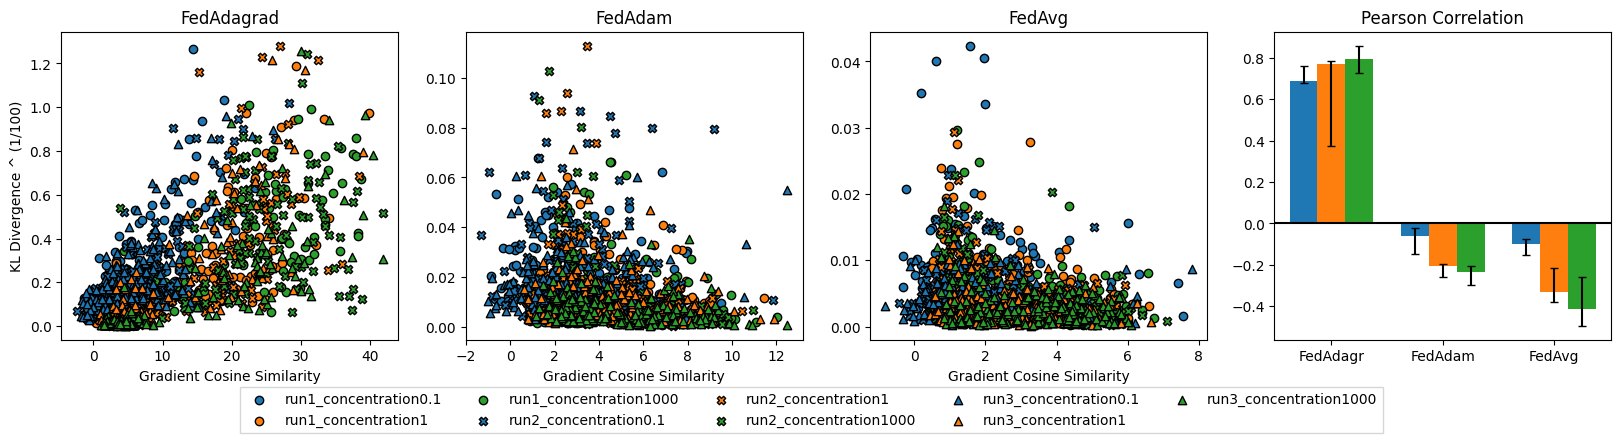

In [1152]:
from scipy.stats.stats import pearsonr

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Pearson Correlation")

axs[0].scatter(
    np.array(ada_c01_run2_cs_gradient_sum),
    np.array(ada_c01_run2_random_activation_difference),
    edgecolor="black",
    label="run1_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run2_cs_gradient_sum),
    np.array(ada_c1_run2_random_activation_difference),
    edgecolor="black",
    label="run1_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run2_cs_gradient_sum),
    np.array(ada_c1000_run2_random_activation_difference),
    edgecolor="black",
    label="run1_concentration1000",
)


axs[0].scatter(
    np.array(ada_c01_run1_cs_gradient_sum),
    np.array(ada_c01_run1_random_activation_difference),
    color="tab:blue",
    marker="X",
    edgecolor="black",
    label="run2_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run1_cs_gradient_sum),
    np.array(ada_c1_run1_random_activation_difference),
    color="tab:orange",
    marker="X",
    edgecolor="black",
    label="run2_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run1_cs_gradient_sum),
    np.array(ada_c1000_run1_random_activation_difference),
    color="tab:green",
    marker="X",
    edgecolor="black",
    label="run2_concentration1000",
)


axs[0].scatter(
    np.array(ada_c01_run3_cs_gradient_sum),
    np.array(ada_c01_run3_random_activation_difference),
    color="tab:blue",
    marker="^",
    edgecolor="black",
    label="run3_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run3_cs_gradient_sum),
    np.array(ada_c1_run3_random_activation_difference),
    color="tab:orange",
    marker="^",
    edgecolor="black",
    label="run3_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run3_cs_gradient_sum),
    np.array(ada_c1000_run3_random_activation_difference),
    color="tab:green",
    marker="^",
    edgecolor="black",
    label="run3_concentration1000",
)


axs[1].scatter(
    np.array(adam_c01_run2_cs_gradient_sum),
    np.array(adam_c01_run2_random_activation_difference),
    edgecolor="black",
)
axs[1].scatter(
    np.array(adam_c1_run2_cs_gradient_sum),
    np.array(adam_c1_run2_random_activation_difference),
    edgecolor="black",
)
axs[1].scatter(
    np.array(adam_c1000_run2_cs_gradient_sum),
    np.array(adam_c1000_run2_random_activation_difference),
    edgecolor="black",
)

axs[1].scatter(
    np.array(adam_c01_run1_cs_gradient_sum),
    np.array(adam_c01_run1_random_activation_difference),
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[1].scatter(
    np.array(adam_c1_run1_cs_gradient_sum),
    np.array(adam_c1_run1_random_activation_difference),
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[1].scatter(
    np.array(adam_c1000_run1_cs_gradient_sum),
    np.array(adam_c1000_run1_random_activation_difference),
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[1].scatter(
    np.array(adam_c01_run3_cs_gradient_sum),
    np.array(adam_c01_run3_random_activation_difference),
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[1].scatter(
    np.array(adam_c1_run3_cs_gradient_sum),
    np.array(adam_c1_run3_random_activation_difference),
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[1].scatter(
    np.array(adam_c1000_run3_cs_gradient_sum),
    np.array(adam_c1000_run3_random_activation_difference),
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[2].scatter(
    np.array(avg_c01_run2_cs_gradient_sum),
    np.array(avg_c01_run2_random_activation_difference),
    edgecolor="black",
)
axs[2].scatter(
    np.array(avg_c1_run2_cs_gradient_sum),
    np.array(avg_c1_run2_random_activation_difference),
    edgecolor="black",
)
axs[2].scatter(
    np.array(avg_c1000_run2_cs_gradient_sum),
    np.array(avg_c1000_run2_random_activation_difference),
    edgecolor="black",
)

axs[2].scatter(
    np.array(avg_c01_run1_cs_gradient_sum),
    np.array(avg_c01_run1_random_activation_difference),
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[2].scatter(
    np.array(avg_c1_run1_cs_gradient_sum),
    np.array(avg_c1_run1_random_activation_difference),
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[2].scatter(
    np.array(avg_c1000_run1_cs_gradient_sum),
    np.array(avg_c1000_run1_random_activation_difference),
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[2].scatter(
    np.array(avg_c01_run3_cs_gradient_sum),
    np.array(avg_c01_run3_random_activation_difference),
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[2].scatter(
    np.array(avg_c1_run3_cs_gradient_sum),
    np.array(avg_c1_run3_random_activation_difference),
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[2].scatter(
    np.array(avg_c1000_run3_cs_gradient_sum),
    np.array(avg_c1000_run3_random_activation_difference),
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[0].set_ylabel("KL Divergence ^ (1/100)")
axs[0].set_xlabel("Gradient Cosine Similarity")
axs[1].set_xlabel("Gradient Cosine Similarity")
axs[2].set_xlabel("Gradient Cosine Similarity")

algorithms = ("FedAdagr", "FedAdam", "FedAvg")

ada_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c01_run1_random_activation_difference),
        np.array(ada_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c01_run2_random_activation_difference),
        np.array(ada_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c01_run3_random_activation_difference),
        np.array(ada_c01_run3_cs_gradient_sum),
    )[0],
])
ada_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c1_run1_random_activation_difference),
        np.array(ada_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1_run2_random_activation_difference),
        np.array(ada_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1_run3_random_activation_difference),
        np.array(ada_c01_run3_cs_gradient_sum),
    )[0],
])
ada_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c1000_run1_random_activation_difference),
        np.array(ada_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1000_run2_random_activation_difference),
        np.array(ada_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1000_run3_random_activation_difference),
        np.array(ada_c1000_run3_cs_gradient_sum),
    )[0],
])

adam_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c01_run1_random_activation_difference),
        np.array(adam_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c01_run2_random_activation_difference),
        np.array(adam_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c01_run3_random_activation_difference),
        np.array(adam_c01_run3_cs_gradient_sum),
    )[0],
])
adam_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c1_run1_random_activation_difference),
        np.array(adam_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1_run2_random_activation_difference),
        np.array(adam_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1_run3_random_activation_difference),
        np.array(adam_c01_run3_cs_gradient_sum),
    )[0],
])
adam_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c1000_run1_random_activation_difference),
        np.array(adam_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1000_run2_random_activation_difference),
        np.array(adam_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1000_run3_random_activation_difference),
        np.array(adam_c1000_run3_cs_gradient_sum),
    )[0],
])

avg_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c01_run1_random_activation_difference),
        np.array(avg_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c01_run2_random_activation_difference),
        np.array(avg_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c01_run3_random_activation_difference),
        np.array(avg_c01_run3_cs_gradient_sum),
    )[0],
])
avg_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c1_run1_random_activation_difference),
        np.array(avg_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1_run2_random_activation_difference),
        np.array(avg_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1_run3_random_activation_difference),
        np.array(avg_c01_run3_cs_gradient_sum),
    )[0],
])
avg_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c1000_run1_random_activation_difference),
        np.array(avg_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1000_run2_random_activation_difference),
        np.array(avg_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1000_run3_random_activation_difference),
        np.array(avg_c1000_run3_cs_gradient_sum),
    )[0],
])

corr = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_pearson_stacked),
            np.median(adam_c01_pearson_stacked),
            np.median(avg_c01_pearson_stacked),
        ],
        [
            ada_c01_pearson_stacked.min(),
            adam_c01_pearson_stacked.min(),
            avg_c01_pearson_stacked.min(),
        ],
        [
            ada_c01_pearson_stacked.max(),
            adam_c01_pearson_stacked.max(),
            avg_c01_pearson_stacked.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_pearson_stacked),
            np.median(adam_c1_pearson_stacked),
            np.median(avg_c1_pearson_stacked),
        ],
        [
            ada_c1_pearson_stacked.min(),
            adam_c1_pearson_stacked.min(),
            avg_c1_pearson_stacked.min(),
        ],
        [
            ada_c1_pearson_stacked.max(),
            adam_c1_pearson_stacked.max(),
            avg_c1_pearson_stacked.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_pearson_stacked),
            np.median(adam_c1000_pearson_stacked),
            np.median(avg_c1000_pearson_stacked),
        ],
        [
            ada_c1000_pearson_stacked.min(),
            adam_c1000_pearson_stacked.min(),
            avg_c1000_pearson_stacked.min(),
        ],
        [
            ada_c1000_pearson_stacked.max(),
            adam_c1000_pearson_stacked.max(),
            avg_c1000_pearson_stacked.max(),
        ],
    ]),
}

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in corr.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

# custom_ylim = (9, 10.2)
# plt.setp([axs], ylim=custom_ylim)
axs[3].set_xticks(x + width, algorithms)
axs[3].axhline(y=0, color="black", linestyle="-")

fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=5
)
plt.show()

In [1130]:
ada_c01_run1_accuracy_difference = (
    np.array(ada_c01_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c01_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
ada_c1_run1_accuracy_difference = (
    np.array(ada_c1_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c1_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
ada_c1000_run1_accuracy_difference = (
    np.array(ada_c1000_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c1000_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

ada_c01_run2_accuracy_difference = (
    np.array(ada_c01_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c01_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
ada_c1_run2_accuracy_difference = (
    np.array(ada_c1_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c1_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
ada_c1000_run2_accuracy_difference = (
    np.array(ada_c1000_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c1000_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

ada_c01_run3_accuracy_difference = (
    np.array(ada_c01_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c01_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
ada_c1_run3_accuracy_difference = (
    np.array(ada_c1_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c1_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
ada_c1000_run3_accuracy_difference = (
    np.array(ada_c1000_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(ada_c1000_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)


adam_c01_run1_accuracy_difference = (
    np.array(adam_c01_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c01_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
adam_c1_run1_accuracy_difference = (
    np.array(adam_c1_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c1_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
adam_c1000_run1_accuracy_difference = (
    np.array(adam_c1000_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c1000_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

adam_c01_run2_accuracy_difference = (
    np.array(adam_c01_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c01_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
adam_c1_run2_accuracy_difference = (
    np.array(adam_c1_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c1_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
adam_c1000_run2_accuracy_difference = (
    np.array(adam_c1000_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c1000_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

adam_c01_run3_accuracy_difference = (
    np.array(adam_c01_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c01_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
adam_c1_run3_accuracy_difference = (
    np.array(adam_c1_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c1_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
adam_c1000_run3_accuracy_difference = (
    np.array(adam_c1000_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(adam_c1000_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)


avg_c01_run1_accuracy_difference = (
    np.array(avg_c01_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c01_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
avg_c1_run1_accuracy_difference = (
    np.array(avg_c1_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c1_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
avg_c1000_run1_accuracy_difference = (
    np.array(avg_c1000_run1["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c1000_run1["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

avg_c01_run2_accuracy_difference = (
    np.array(avg_c01_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c01_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
avg_c1_run2_accuracy_difference = (
    np.array(avg_c1_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c1_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
avg_c1000_run2_accuracy_difference = (
    np.array(avg_c1000_run2["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c1000_run2["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

avg_c01_run3_accuracy_difference = (
    np.array(avg_c01_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c01_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
avg_c1_run3_accuracy_difference = (
    np.array(avg_c1_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c1_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)
avg_c1000_run3_accuracy_difference = (
    np.array(avg_c1000_run3["metrics_centralized"]["test_accuracy"])[:, 1][1:]
    - np.array(avg_c1000_run3["metrics_centralized"]["test_accuracy"])[:, 1][:-1]
)

/var/folders/8p/rl0cc1cx5h5301dxt0kcg54h0000gn/T/ipykernel_35772/197013218.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


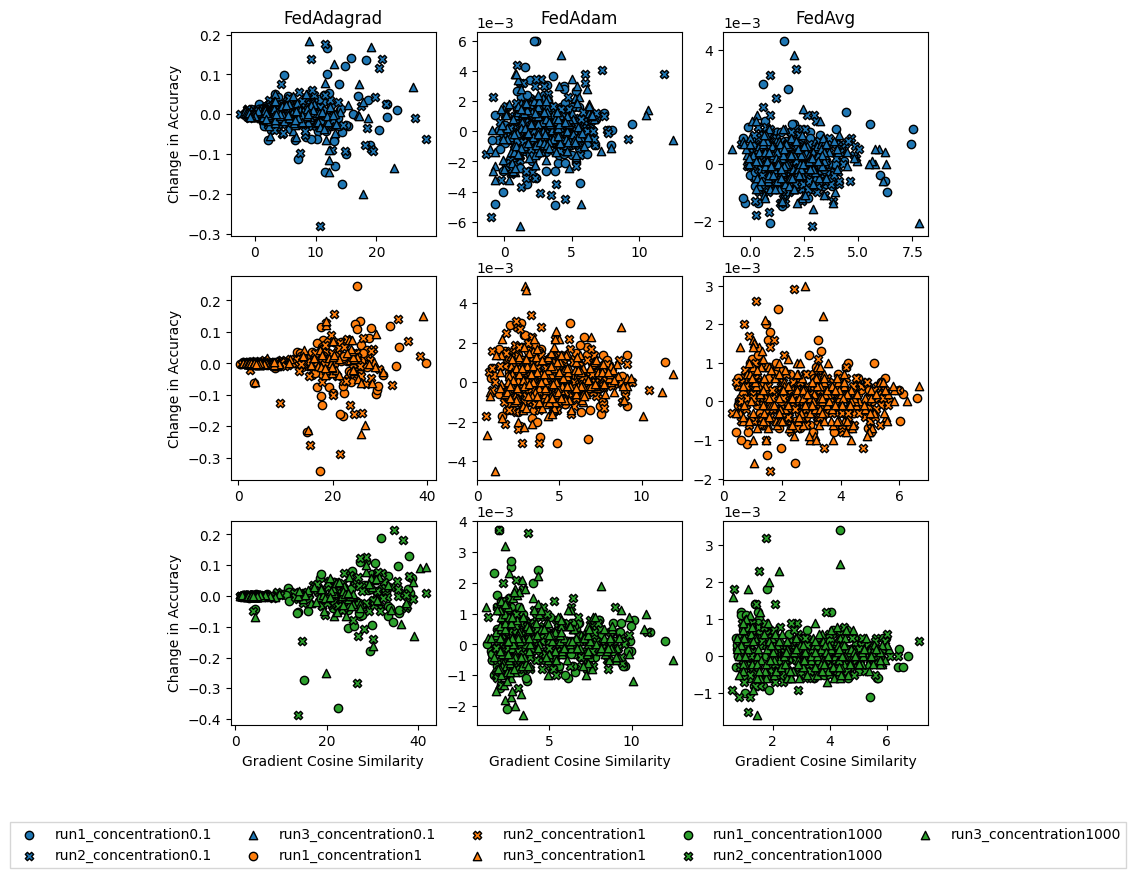

In [1156]:
from scipy.stats.stats import pearsonr

fig, axs = plt.subplots(3, 3, figsize=(9, 9))

axs[0][0].set_title("FedAdagrad")
axs[0][1].set_title("FedAdam")
axs[0][2].set_title("FedAvg")
axs[0][0].set_ylabel("Change in Accuracy")
axs[1][0].set_ylabel("Change in Accuracy")
axs[2][0].set_ylabel("Change in Accuracy")
axs[2][0].set_xlabel("Gradient Cosine Similarity")
axs[2][1].set_xlabel("Gradient Cosine Similarity")
axs[2][2].set_xlabel("Gradient Cosine Similarity")


axs[0][0].scatter(
    np.array(ada_c01_run2_cs_gradient_sum),
    np.array(ada_c01_run2_accuracy_difference),
    color="tab:blue",
    edgecolor="black",
    label="run1_concentration0.1",
)
axs[1][0].scatter(
    np.array(ada_c1_run2_cs_gradient_sum),
    np.array(ada_c1_run2_accuracy_difference),
    color="tab:orange",
    edgecolor="black",
    label="run1_concentration1",
)
axs[2][0].scatter(
    np.array(ada_c1000_run2_cs_gradient_sum),
    np.array(ada_c1000_run2_accuracy_difference),
    color="tab:green",
    edgecolor="black",
    label="run1_concentration1000",
)

axs[0][0].scatter(
    np.array(ada_c01_run1_cs_gradient_sum),
    np.array(ada_c01_run1_accuracy_difference),
    edgecolor="black",
    color="tab:blue",
    marker="X",
    label="run2_concentration0.1",
)
axs[1][0].scatter(
    np.array(ada_c1_run1_cs_gradient_sum),
    np.array(ada_c1_run1_accuracy_difference),
    edgecolor="black",
    color="tab:orange",
    marker="X",
    label="run2_concentration1",
)
axs[2][0].scatter(
    np.array(ada_c1000_run1_cs_gradient_sum),
    np.array(ada_c1000_run1_accuracy_difference),
    edgecolor="black",
    color="tab:green",
    marker="X",
    label="run2_concentration1000",
)

axs[0][0].scatter(
    np.array(ada_c01_run3_cs_gradient_sum),
    np.array(ada_c01_run3_accuracy_difference),
    edgecolor="black",
    color="tab:blue",
    marker="^",
    label="run3_concentration0.1",
)
axs[1][0].scatter(
    np.array(ada_c1_run3_cs_gradient_sum),
    np.array(ada_c1_run3_accuracy_difference),
    edgecolor="black",
    color="tab:orange",
    marker="^",
    label="run3_concentration1",
)
axs[2][0].scatter(
    np.array(ada_c1000_run3_cs_gradient_sum),
    np.array(ada_c1000_run3_accuracy_difference),
    edgecolor="black",
    color="tab:green",
    marker="^",
    label="run3_concentration1000",
)


axs[0][1].scatter(
    np.array(adam_c01_run2_cs_gradient_sum),
    np.array(adam_c01_run2_accuracy_difference),
    color="tab:blue",
    edgecolor="black",
)
axs[1][1].scatter(
    np.array(adam_c1_run2_cs_gradient_sum),
    np.array(adam_c1_run2_accuracy_difference),
    color="tab:orange",
    edgecolor="black",
)
axs[2][1].scatter(
    np.array(adam_c1000_run2_cs_gradient_sum),
    np.array(adam_c1000_run2_accuracy_difference),
    color="tab:green",
    edgecolor="black",
)

axs[0][1].scatter(
    np.array(adam_c01_run1_cs_gradient_sum),
    np.array(adam_c01_run1_accuracy_difference),
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[1][1].scatter(
    np.array(adam_c1_run1_cs_gradient_sum),
    np.array(adam_c1_run1_accuracy_difference),
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[2][1].scatter(
    np.array(adam_c1000_run1_cs_gradient_sum),
    np.array(adam_c1000_run1_accuracy_difference),
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[0][1].scatter(
    np.array(adam_c01_run3_cs_gradient_sum),
    np.array(adam_c01_run3_accuracy_difference),
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[1][1].scatter(
    np.array(adam_c1_run3_cs_gradient_sum),
    np.array(adam_c1_run3_accuracy_difference),
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[2][1].scatter(
    np.array(adam_c1000_run3_cs_gradient_sum),
    np.array(adam_c1000_run3_accuracy_difference),
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[0][2].scatter(
    np.array(avg_c01_run2_cs_gradient_sum),
    np.array(avg_c01_run2_accuracy_difference),
    color="tab:blue",
    edgecolor="black",
)
axs[1][2].scatter(
    np.array(avg_c1_run2_cs_gradient_sum),
    np.array(avg_c1_run2_accuracy_difference),
    color="tab:orange",
    edgecolor="black",
)
axs[2][2].scatter(
    np.array(avg_c1000_run2_cs_gradient_sum),
    np.array(avg_c1000_run2_accuracy_difference),
    color="tab:green",
    edgecolor="black",
)

axs[0][2].scatter(
    np.array(avg_c01_run1_cs_gradient_sum),
    np.array(avg_c01_run1_accuracy_difference),
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[1][2].scatter(
    np.array(avg_c1_run1_cs_gradient_sum),
    np.array(avg_c1_run1_accuracy_difference),
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[2][2].scatter(
    np.array(avg_c1000_run1_cs_gradient_sum),
    np.array(avg_c1000_run1_accuracy_difference),
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[0][2].scatter(
    np.array(avg_c01_run3_cs_gradient_sum),
    np.array(avg_c01_run3_accuracy_difference),
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[1][2].scatter(
    np.array(avg_c1_run3_cs_gradient_sum),
    np.array(avg_c1_run3_accuracy_difference),
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[2][2].scatter(
    np.array(avg_c1000_run3_cs_gradient_sum),
    np.array(avg_c1000_run3_accuracy_difference),
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[0][1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1][1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2][1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[0][2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1][2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2][2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[0][2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1][2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2][2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=5
)
plt.show()

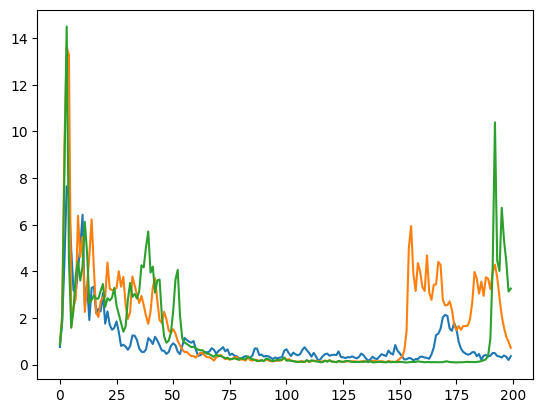

In [1166]:
plt.plot(np.array(ada_c01_run2["metrics_distributed_fit"]["total_gradients"])[:, 1])
plt.plot(np.array(ada_c1_run2["metrics_distributed_fit"]["total_gradients"])[:, 1])
plt.plot(np.array(ada_c1000_run2["metrics_distributed_fit"]["total_gradients"])[:, 1])

In [1302]:
ada_c1000_run1_cs_activation_mean_sum = []
for cs_activation_mean in ada_c1000_run1["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    ada_c1000_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
ada_c1_run1_cs_activation_mean_sum = []
for cs_activation_mean in ada_c1_run1["metrics_distributed_fit"]["cs_activation_mean"]:
    ada_c1_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
ada_c01_run1_cs_activation_mean_sum = []
for cs_activation_mean in ada_c01_run1["metrics_distributed_fit"]["cs_activation_mean"]:
    ada_c01_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

adam_c1000_run1_cs_activation_mean_sum = []
for cs_activation_mean in adam_c1000_run1["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_c1000_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_c1_run1_cs_activation_mean_sum = []
for cs_activation_mean in adam_c1_run1["metrics_distributed_fit"]["cs_activation_mean"]:
    adam_c1_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_c01_run1_cs_activation_mean_sum = []
for cs_activation_mean in adam_c01_run1["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_c01_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

avg_c1000_run1_cs_activation_mean_sum = []
for cs_activation_mean in avg_c1000_run1["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    avg_c1000_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
avg_c1_run1_cs_activation_mean_sum = []
for cs_activation_mean in avg_c1_run1["metrics_distributed_fit"]["cs_activation_mean"]:
    avg_c1_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
avg_c01_run1_cs_activation_mean_sum = []
for cs_activation_mean in avg_c01_run1["metrics_distributed_fit"]["cs_activation_mean"]:
    avg_c01_run1_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

ada_c1000_run2_cs_activation_mean_sum = []
for cs_activation_mean in ada_c1000_run2["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    ada_c1000_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
ada_c1_run2_cs_activation_mean_sum = []
for cs_activation_mean in ada_c1_run2["metrics_distributed_fit"]["cs_activation_mean"]:
    ada_c1_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
ada_c01_run2_cs_activation_mean_sum = []
for cs_activation_mean in ada_c01_run2["metrics_distributed_fit"]["cs_activation_mean"]:
    ada_c01_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

adam_c1000_run2_cs_activation_mean_sum = []
for cs_activation_mean in adam_c1000_run2["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_c1000_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_c1_run2_cs_activation_mean_sum = []
for cs_activation_mean in adam_c1_run2["metrics_distributed_fit"]["cs_activation_mean"]:
    adam_c1_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_c01_run2_cs_activation_mean_sum = []
for cs_activation_mean in adam_c01_run2["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_c01_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

avg_c1000_run2_cs_activation_mean_sum = []
for cs_activation_mean in avg_c1000_run2["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    avg_c1000_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
avg_c1_run2_cs_activation_mean_sum = []
for cs_activation_mean in avg_c1_run2["metrics_distributed_fit"]["cs_activation_mean"]:
    avg_c1_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
avg_c01_run2_cs_activation_mean_sum = []
for cs_activation_mean in avg_c01_run2["metrics_distributed_fit"]["cs_activation_mean"]:
    avg_c01_run2_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

ada_c1000_run3_cs_activation_mean_sum = []
for cs_activation_mean in ada_c1000_run3["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    ada_c1000_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
ada_c1_run3_cs_activation_mean_sum = []
for cs_activation_mean in ada_c1_run3["metrics_distributed_fit"]["cs_activation_mean"]:
    ada_c1_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
ada_c01_run3_cs_activation_mean_sum = []
for cs_activation_mean in ada_c01_run3["metrics_distributed_fit"]["cs_activation_mean"]:
    ada_c01_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

adam_c1000_run3_cs_activation_mean_sum = []
for cs_activation_mean in adam_c1000_run3["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_c1000_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_c1_run3_cs_activation_mean_sum = []
for cs_activation_mean in adam_c1_run3["metrics_distributed_fit"]["cs_activation_mean"]:
    adam_c1_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
adam_c01_run3_cs_activation_mean_sum = []
for cs_activation_mean in adam_c01_run3["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    adam_c01_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

avg_c1000_run3_cs_activation_mean_sum = []
for cs_activation_mean in avg_c1000_run3["metrics_distributed_fit"][
    "cs_activation_mean"
]:
    avg_c1000_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
avg_c1_run3_cs_activation_mean_sum = []
for cs_activation_mean in avg_c1_run3["metrics_distributed_fit"]["cs_activation_mean"]:
    avg_c1_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )
avg_c01_run3_cs_activation_mean_sum = []
for cs_activation_mean in avg_c01_run3["metrics_distributed_fit"]["cs_activation_mean"]:
    avg_c01_run3_cs_activation_mean_sum.append(
        (np.array(cs_activation_mean[1]).sum() - 10) / 90
    )

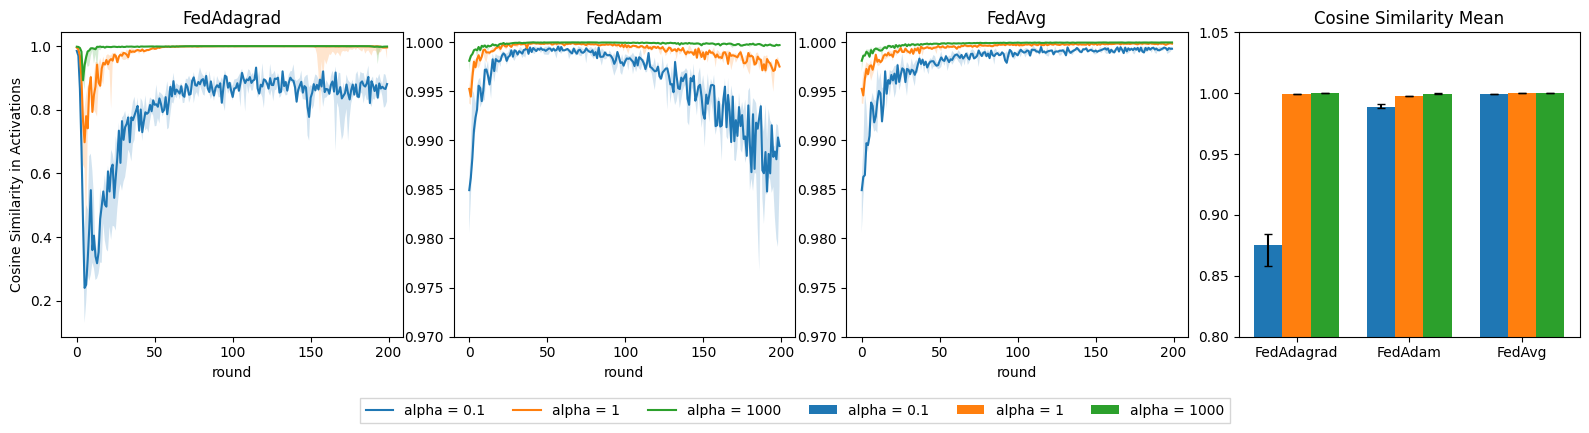

In [1383]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Cosine Similarity Mean")
axs[0].set_ylabel("Cosine Similarity in Activations")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_cs_activation_mean_sum_stacked = np.array([
    ada_c01_run1_cs_activation_mean_sum,
    ada_c01_run2_cs_activation_mean_sum,
    ada_c01_run3_cs_activation_mean_sum,
])
axs[0].plot(
    np.median(ada_c01_cs_activation_mean_sum_stacked, axis=0), label="alpha = 0.1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_cs_activation_mean_sum_stacked, axis=0),
    np.min(ada_c01_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

ada_c1_cs_activation_mean_sum_stacked = np.array([
    ada_c1_run1_cs_activation_mean_sum,
    ada_c1_run2_cs_activation_mean_sum,
    ada_c1_run3_cs_activation_mean_sum,
])
axs[0].plot(np.median(ada_c1_cs_activation_mean_sum_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_cs_activation_mean_sum_stacked, axis=0),
    np.min(ada_c1_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_cs_activation_mean_sum_stacked = np.array([
    ada_c1000_run1_cs_activation_mean_sum,
    ada_c1000_run2_cs_activation_mean_sum,
    ada_c1000_run3_cs_activation_mean_sum,
])
axs[0].plot(
    np.median(ada_c1000_cs_activation_mean_sum_stacked, axis=0), label="alpha = 1000"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_cs_activation_mean_sum_stacked, axis=0),
    np.min(ada_c1000_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c01_cs_activation_mean_sum_stacked = np.array([
    adam_c01_run1_cs_activation_mean_sum,
    adam_c01_run2_cs_activation_mean_sum,
    adam_c01_run3_cs_activation_mean_sum,
])
axs[1].plot(np.median(adam_c01_cs_activation_mean_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_cs_activation_mean_sum_stacked, axis=0),
    np.min(adam_c01_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c1_cs_activation_mean_sum_stacked = np.array([
    adam_c1_run1_cs_activation_mean_sum,
    adam_c1_run2_cs_activation_mean_sum,
    adam_c1_run3_cs_activation_mean_sum,
])
axs[1].plot(np.median(adam_c1_cs_activation_mean_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_cs_activation_mean_sum_stacked, axis=0),
    np.min(adam_c1_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_cs_activation_mean_sum_stacked = np.array([
    adam_c1000_run1_cs_activation_mean_sum,
    adam_c1000_run2_cs_activation_mean_sum,
    adam_c1000_run3_cs_activation_mean_sum,
])
axs[1].plot(np.median(adam_c1000_cs_activation_mean_sum_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_cs_activation_mean_sum_stacked, axis=0),
    np.min(adam_c1000_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c01_cs_activation_mean_sum_stacked = np.array([
    avg_c01_run1_cs_activation_mean_sum,
    avg_c01_run2_cs_activation_mean_sum,
    avg_c01_run3_cs_activation_mean_sum,
])
axs[2].plot(np.median(avg_c01_cs_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_cs_activation_mean_sum_stacked, axis=0),
    np.min(avg_c01_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c1_cs_activation_mean_sum_stacked = np.array([
    avg_c1_run1_cs_activation_mean_sum,
    avg_c1_run2_cs_activation_mean_sum,
    avg_c1_run3_cs_activation_mean_sum,
])
axs[2].plot(np.median(avg_c1_cs_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_cs_activation_mean_sum_stacked, axis=0),
    np.min(avg_c1_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_cs_activation_mean_sum_stacked = np.array([
    avg_c1000_run1_cs_activation_mean_sum,
    avg_c1000_run2_cs_activation_mean_sum,
    avg_c1000_run3_cs_activation_mean_sum,
])
axs[2].plot(np.median(avg_c1000_cs_activation_mean_sum_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_cs_activation_mean_sum_stacked, axis=0),
    np.min(avg_c1000_cs_activation_mean_sum_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_cs_activation_mean_sum_stacked_var = np.mean(
    ada_c01_cs_activation_mean_sum_stacked[:, 125:150], axis=-1
)
ada_c1_cs_activation_mean_sum_stacked_var = np.mean(
    ada_c1_cs_activation_mean_sum_stacked[:, 125:150], axis=-1
)
ada_c1000_cs_activation_mean_sum_stacked_var = np.mean(
    ada_c1000_cs_activation_mean_sum_stacked[:, 125:150], axis=-1
)

adam_c01_cs_activation_mean_sum_stacked_var = np.mean(
    adam_c01_cs_activation_mean_sum_stacked[:, 175:200], axis=-1
)
adam_c1_cs_activation_mean_sum_stacked_var = np.mean(
    adam_c1_cs_activation_mean_sum_stacked[:, 175:200], axis=-1
)
adam_c1000_cs_activation_mean_sum_stacked_var = np.mean(
    adam_c1000_cs_activation_mean_sum_stacked[:, 175:200], axis=-1
)

avg_c01_cs_activation_mean_sum_stacked_var = np.mean(
    avg_c01_cs_activation_mean_sum_stacked[:, 175:200], axis=-1
)
avg_c1_cs_activation_mean_sum_stacked_var = np.mean(
    avg_c1_cs_activation_mean_sum_stacked[:, 175:200], axis=-1
)
avg_c1000_cs_activation_mean_sum_stacked_var = np.mean(
    avg_c1000_cs_activation_mean_sum_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

cs_activation_mean_sum = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_cs_activation_mean_sum_stacked_var),
            np.median(adam_c01_cs_activation_mean_sum_stacked_var),
            np.median(avg_c01_cs_activation_mean_sum_stacked_var),
        ],
        [
            ada_c01_cs_activation_mean_sum_stacked_var.min(),
            adam_c01_cs_activation_mean_sum_stacked_var.min(),
            avg_c01_cs_activation_mean_sum_stacked_var.min(),
        ],
        [
            ada_c01_cs_activation_mean_sum_stacked_var.max(),
            adam_c01_cs_activation_mean_sum_stacked_var.max(),
            avg_c01_cs_activation_mean_sum_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_cs_activation_mean_sum_stacked_var),
            np.median(adam_c1_cs_activation_mean_sum_stacked_var),
            np.median(avg_c1_cs_activation_mean_sum_stacked_var),
        ],
        [
            ada_c1_cs_activation_mean_sum_stacked_var.min(),
            adam_c1_cs_activation_mean_sum_stacked_var.min(),
            avg_c1_cs_activation_mean_sum_stacked_var.min(),
        ],
        [
            ada_c1_cs_activation_mean_sum_stacked_var.max(),
            adam_c1_cs_activation_mean_sum_stacked_var.max(),
            avg_c1_cs_activation_mean_sum_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_cs_activation_mean_sum_stacked_var),
            np.median(adam_c1000_cs_activation_mean_sum_stacked_var),
            np.median(avg_c1000_cs_activation_mean_sum_stacked_var),
        ],
        [
            ada_c1000_cs_activation_mean_sum_stacked_var.min(),
            adam_c1000_cs_activation_mean_sum_stacked_var.min(),
            avg_c1000_cs_activation_mean_sum_stacked_var.min(),
        ],
        [
            ada_c1000_cs_activation_mean_sum_stacked_var.max(),
            adam_c1000_cs_activation_mean_sum_stacked_var.max(),
            avg_c1000_cs_activation_mean_sum_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in cs_activation_mean_sum.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0.97, 1.001)
plt.setp([axs[1:3]], ylim=custom_ylim)
custom_ylim = (0.8, 1.05)
plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

In [1309]:
ada_c1000_run1_cs_server_before_mean = []
for cs_server_before_mean in ada_c1000_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c1000_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
ada_c1_run1_cs_server_before_mean = []
for cs_server_before_mean in ada_c1_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c1_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
ada_c01_run1_cs_server_before_mean = []
for cs_server_before_mean in ada_c01_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c01_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

adam_c1000_run1_cs_server_before_mean = []
for cs_server_before_mean in adam_c1000_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c1000_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
adam_c1_run1_cs_server_before_mean = []
for cs_server_before_mean in adam_c1_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c1_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
adam_c01_run1_cs_server_before_mean = []
for cs_server_before_mean in adam_c01_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c01_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

avg_c1000_run1_cs_server_before_mean = []
for cs_server_before_mean in avg_c1000_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c1000_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
avg_c1_run1_cs_server_before_mean = []
for cs_server_before_mean in avg_c1_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c1_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
avg_c01_run1_cs_server_before_mean = []
for cs_server_before_mean in avg_c01_run1["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c01_run1_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )


ada_c1000_run3_cs_server_before_mean = []
for cs_server_before_mean in ada_c1000_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c1000_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
ada_c1_run3_cs_server_before_mean = []
for cs_server_before_mean in ada_c1_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c1_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
ada_c01_run3_cs_server_before_mean = []
for cs_server_before_mean in ada_c01_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c01_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

adam_c1000_run3_cs_server_before_mean = []
for cs_server_before_mean in adam_c1000_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c1000_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
adam_c1_run3_cs_server_before_mean = []
for cs_server_before_mean in adam_c1_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c1_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
adam_c01_run3_cs_server_before_mean = []
for cs_server_before_mean in adam_c01_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c01_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

avg_c1000_run3_cs_server_before_mean = []
for cs_server_before_mean in avg_c1000_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c1000_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
avg_c1_run3_cs_server_before_mean = []
for cs_server_before_mean in avg_c1_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c1_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
avg_c01_run3_cs_server_before_mean = []
for cs_server_before_mean in avg_c01_run3["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c01_run3_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )


ada_c1000_run2_cs_server_before_mean = []
for cs_server_before_mean in ada_c1000_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c1000_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
ada_c1_run2_cs_server_before_mean = []
for cs_server_before_mean in ada_c1_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c1_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
ada_c01_run2_cs_server_before_mean = []
for cs_server_before_mean in ada_c01_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    ada_c01_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

adam_c1000_run2_cs_server_before_mean = []
for cs_server_before_mean in adam_c1000_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c1000_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
adam_c1_run2_cs_server_before_mean = []
for cs_server_before_mean in adam_c1_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c1_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
adam_c01_run2_cs_server_before_mean = []
for cs_server_before_mean in adam_c01_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    adam_c01_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

avg_c1000_run2_cs_server_before_mean = []
for cs_server_before_mean in avg_c1000_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c1000_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
avg_c1_run2_cs_server_before_mean = []
for cs_server_before_mean in avg_c1_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c1_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )
avg_c01_run2_cs_server_before_mean = []
for cs_server_before_mean in avg_c01_run2["metrics_distributed_fit"][
    "cs_server_before_mean"
]:
    avg_c01_run2_cs_server_before_mean.append(
        np.array(cs_server_before_mean[1]).sum() / 10
    )

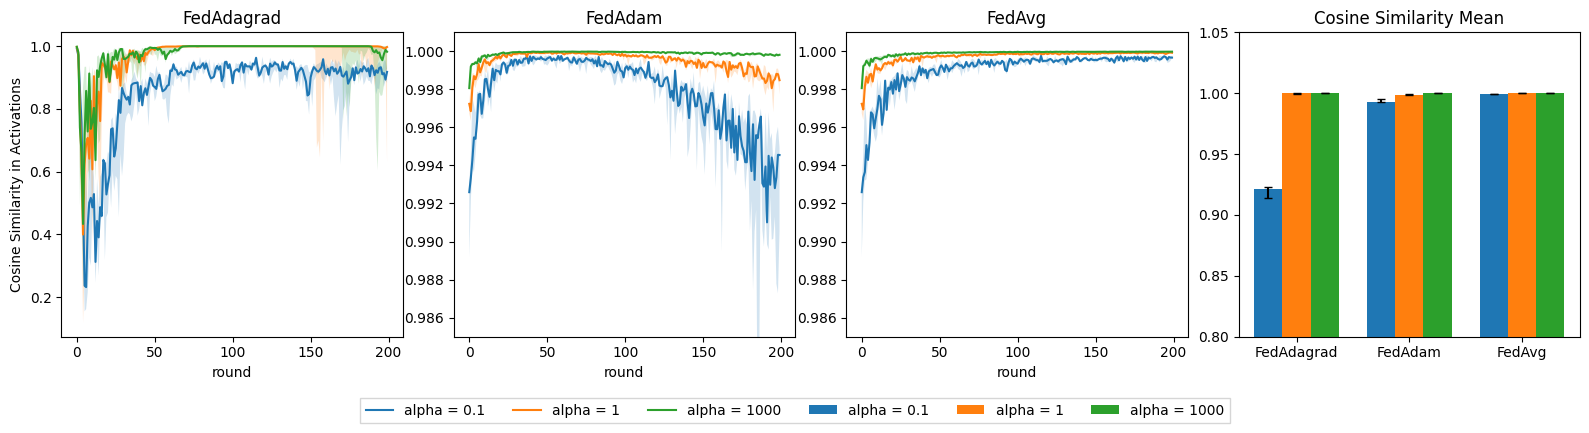

In [1384]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Cosine Similarity Mean")
axs[0].set_ylabel("Cosine Similarity in Activations")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_cs_server_before_mean_stacked = np.array([
    ada_c01_run1_cs_server_before_mean,
    ada_c01_run2_cs_server_before_mean,
    ada_c01_run3_cs_server_before_mean,
])
axs[0].plot(
    np.median(ada_c01_cs_server_before_mean_stacked, axis=0), label="alpha = 0.1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_cs_server_before_mean_stacked, axis=0),
    np.min(ada_c01_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

ada_c1_cs_server_before_mean_stacked = np.array([
    ada_c1_run1_cs_server_before_mean,
    ada_c1_run2_cs_server_before_mean,
    ada_c1_run3_cs_server_before_mean,
])
axs[0].plot(np.median(ada_c1_cs_server_before_mean_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_cs_server_before_mean_stacked, axis=0),
    np.min(ada_c1_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_cs_server_before_mean_stacked = np.array([
    ada_c1000_run1_cs_server_before_mean,
    ada_c1000_run2_cs_server_before_mean,
    ada_c1000_run3_cs_server_before_mean,
])
axs[0].plot(
    np.median(ada_c1000_cs_server_before_mean_stacked, axis=0), label="alpha = 1000"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_cs_server_before_mean_stacked, axis=0),
    np.min(ada_c1000_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c01_cs_server_before_mean_stacked = np.array([
    adam_c01_run1_cs_server_before_mean,
    adam_c01_run2_cs_server_before_mean,
    adam_c01_run3_cs_server_before_mean,
])
axs[1].plot(np.median(adam_c01_cs_server_before_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_cs_server_before_mean_stacked, axis=0),
    np.min(adam_c01_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c1_cs_server_before_mean_stacked = np.array([
    adam_c1_run1_cs_server_before_mean,
    adam_c1_run2_cs_server_before_mean,
    adam_c1_run3_cs_server_before_mean,
])
axs[1].plot(np.median(adam_c1_cs_server_before_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_cs_server_before_mean_stacked, axis=0),
    np.min(adam_c1_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_cs_server_before_mean_stacked = np.array([
    adam_c1000_run1_cs_server_before_mean,
    adam_c1000_run2_cs_server_before_mean,
    adam_c1000_run3_cs_server_before_mean,
])
axs[1].plot(np.median(adam_c1000_cs_server_before_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_cs_server_before_mean_stacked, axis=0),
    np.min(adam_c1000_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c01_cs_server_before_mean_stacked = np.array([
    avg_c01_run1_cs_server_before_mean,
    avg_c01_run2_cs_server_before_mean,
    avg_c01_run3_cs_server_before_mean,
])
axs[2].plot(np.median(avg_c01_cs_server_before_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_cs_server_before_mean_stacked, axis=0),
    np.min(avg_c01_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c1_cs_server_before_mean_stacked = np.array([
    avg_c1_run1_cs_server_before_mean,
    avg_c1_run2_cs_server_before_mean,
    avg_c1_run3_cs_server_before_mean,
])
axs[2].plot(np.median(avg_c1_cs_server_before_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_cs_server_before_mean_stacked, axis=0),
    np.min(avg_c1_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_cs_server_before_mean_stacked = np.array([
    avg_c1000_run1_cs_server_before_mean,
    avg_c1000_run2_cs_server_before_mean,
    avg_c1000_run3_cs_server_before_mean,
])
axs[2].plot(np.median(avg_c1000_cs_server_before_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_cs_server_before_mean_stacked, axis=0),
    np.min(avg_c1000_cs_server_before_mean_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_cs_server_before_mean_stacked_var = np.mean(
    ada_c01_cs_server_before_mean_stacked[:, 125:150], axis=-1
)
ada_c1_cs_server_before_mean_stacked_var = np.mean(
    ada_c1_cs_server_before_mean_stacked[:, 125:150], axis=-1
)
ada_c1000_cs_server_before_mean_stacked_var = np.mean(
    ada_c1000_cs_server_before_mean_stacked[:, 125:150], axis=-1
)

adam_c01_cs_server_before_mean_stacked_var = np.mean(
    adam_c01_cs_server_before_mean_stacked[:, 175:200], axis=-1
)
adam_c1_cs_server_before_mean_stacked_var = np.mean(
    adam_c1_cs_server_before_mean_stacked[:, 175:200], axis=-1
)
adam_c1000_cs_server_before_mean_stacked_var = np.mean(
    adam_c1000_cs_server_before_mean_stacked[:, 175:200], axis=-1
)

avg_c01_cs_server_before_mean_stacked_var = np.mean(
    avg_c01_cs_server_before_mean_stacked[:, 175:200], axis=-1
)
avg_c1_cs_server_before_mean_stacked_var = np.mean(
    avg_c1_cs_server_before_mean_stacked[:, 175:200], axis=-1
)
avg_c1000_cs_server_before_mean_stacked_var = np.mean(
    avg_c1000_cs_server_before_mean_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

cs_server_before_mean = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_cs_server_before_mean_stacked_var),
            np.median(adam_c01_cs_server_before_mean_stacked_var),
            np.median(avg_c01_cs_server_before_mean_stacked_var),
        ],
        [
            ada_c01_cs_server_before_mean_stacked_var.min(),
            adam_c01_cs_server_before_mean_stacked_var.min(),
            avg_c01_cs_server_before_mean_stacked_var.min(),
        ],
        [
            ada_c01_cs_server_before_mean_stacked_var.max(),
            adam_c01_cs_server_before_mean_stacked_var.max(),
            avg_c01_cs_server_before_mean_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_cs_server_before_mean_stacked_var),
            np.median(adam_c1_cs_server_before_mean_stacked_var),
            np.median(avg_c1_cs_server_before_mean_stacked_var),
        ],
        [
            ada_c1_cs_server_before_mean_stacked_var.min(),
            adam_c1_cs_server_before_mean_stacked_var.min(),
            avg_c1_cs_server_before_mean_stacked_var.min(),
        ],
        [
            ada_c1_cs_server_before_mean_stacked_var.max(),
            adam_c1_cs_server_before_mean_stacked_var.max(),
            avg_c1_cs_server_before_mean_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_cs_server_before_mean_stacked_var),
            np.median(adam_c1000_cs_server_before_mean_stacked_var),
            np.median(avg_c1000_cs_server_before_mean_stacked_var),
        ],
        [
            ada_c1000_cs_server_before_mean_stacked_var.min(),
            adam_c1000_cs_server_before_mean_stacked_var.min(),
            avg_c1000_cs_server_before_mean_stacked_var.min(),
        ],
        [
            ada_c1000_cs_server_before_mean_stacked_var.max(),
            adam_c1000_cs_server_before_mean_stacked_var.max(),
            avg_c1000_cs_server_before_mean_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in cs_server_before_mean.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0.985, 1.001)
plt.setp([axs[1:3]], ylim=custom_ylim)
custom_ylim = (0.8, 1.05)
plt.setp([axs[3]], ylim=custom_ylim)

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

In [1312]:
ada_c1000_run1_cs_server_after_mean = []
for cs_server_after_mean in ada_c1000_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c1000_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
ada_c1_run1_cs_server_after_mean = []
for cs_server_after_mean in ada_c1_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c1_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
ada_c01_run1_cs_server_after_mean = []
for cs_server_after_mean in ada_c01_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c01_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

adam_c1000_run1_cs_server_after_mean = []
for cs_server_after_mean in adam_c1000_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c1000_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
adam_c1_run1_cs_server_after_mean = []
for cs_server_after_mean in adam_c1_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c1_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
adam_c01_run1_cs_server_after_mean = []
for cs_server_after_mean in adam_c01_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c01_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

avg_c1000_run1_cs_server_after_mean = []
for cs_server_after_mean in avg_c1000_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c1000_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
avg_c1_run1_cs_server_after_mean = []
for cs_server_after_mean in avg_c1_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c1_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
avg_c01_run1_cs_server_after_mean = []
for cs_server_after_mean in avg_c01_run1["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c01_run1_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )


ada_c1000_run3_cs_server_after_mean = []
for cs_server_after_mean in ada_c1000_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c1000_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
ada_c1_run3_cs_server_after_mean = []
for cs_server_after_mean in ada_c1_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c1_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
ada_c01_run3_cs_server_after_mean = []
for cs_server_after_mean in ada_c01_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c01_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

adam_c1000_run3_cs_server_after_mean = []
for cs_server_after_mean in adam_c1000_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c1000_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
adam_c1_run3_cs_server_after_mean = []
for cs_server_after_mean in adam_c1_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c1_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
adam_c01_run3_cs_server_after_mean = []
for cs_server_after_mean in adam_c01_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c01_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

avg_c1000_run3_cs_server_after_mean = []
for cs_server_after_mean in avg_c1000_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c1000_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
avg_c1_run3_cs_server_after_mean = []
for cs_server_after_mean in avg_c1_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c1_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
avg_c01_run3_cs_server_after_mean = []
for cs_server_after_mean in avg_c01_run3["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c01_run3_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )


ada_c1000_run2_cs_server_after_mean = []
for cs_server_after_mean in ada_c1000_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c1000_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
ada_c1_run2_cs_server_after_mean = []
for cs_server_after_mean in ada_c1_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c1_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
ada_c01_run2_cs_server_after_mean = []
for cs_server_after_mean in ada_c01_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    ada_c01_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

adam_c1000_run2_cs_server_after_mean = []
for cs_server_after_mean in adam_c1000_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c1000_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
adam_c1_run2_cs_server_after_mean = []
for cs_server_after_mean in adam_c1_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c1_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
adam_c01_run2_cs_server_after_mean = []
for cs_server_after_mean in adam_c01_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    adam_c01_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

avg_c1000_run2_cs_server_after_mean = []
for cs_server_after_mean in avg_c1000_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c1000_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
avg_c1_run2_cs_server_after_mean = []
for cs_server_after_mean in avg_c1_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c1_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )
avg_c01_run2_cs_server_after_mean = []
for cs_server_after_mean in avg_c01_run2["metrics_distributed_fit"][
    "cs_server_after_mean"
]:
    avg_c01_run2_cs_server_after_mean.append(
        np.array(cs_server_after_mean[1]).sum() / 10
    )

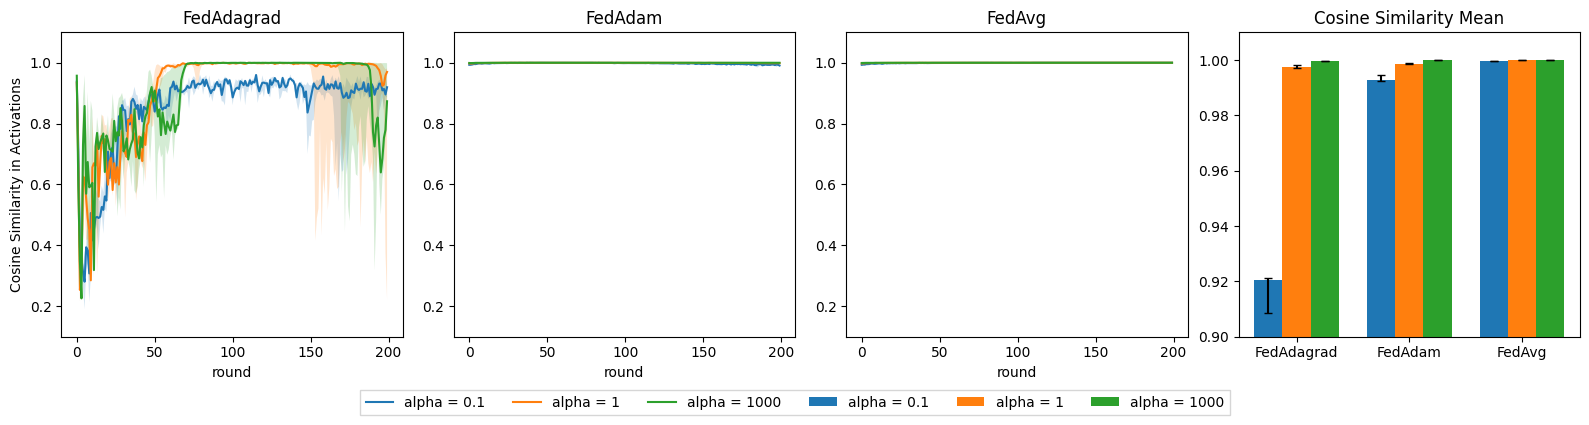

In [1375]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Cosine Similarity Mean")
axs[0].set_ylabel("Cosine Similarity in Activations")
axs[0].set_xlabel("round")
axs[1].set_xlabel("round")
axs[2].set_xlabel("round")


ada_c01_cs_server_after_mean_stacked = np.array([
    ada_c01_run1_cs_server_after_mean,
    ada_c01_run2_cs_server_after_mean,
    ada_c01_run3_cs_server_after_mean,
])
axs[0].plot(
    np.median(ada_c01_cs_server_after_mean_stacked, axis=0), label="alpha = 0.1"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c01_cs_server_after_mean_stacked, axis=0),
    np.min(ada_c01_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

ada_c1_cs_server_after_mean_stacked = np.array([
    ada_c1_run1_cs_server_after_mean,
    ada_c1_run2_cs_server_after_mean,
    ada_c1_run3_cs_server_after_mean,
])
axs[0].plot(np.median(ada_c1_cs_server_after_mean_stacked, axis=0), label="alpha = 1")
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1_cs_server_after_mean_stacked, axis=0),
    np.min(ada_c1_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

ada_c1000_cs_server_after_mean_stacked = np.array([
    ada_c1000_run1_cs_server_after_mean,
    ada_c1000_run2_cs_server_after_mean,
    ada_c1000_run3_cs_server_after_mean,
])
axs[0].plot(
    np.median(ada_c1000_cs_server_after_mean_stacked, axis=0), label="alpha = 1000"
)
axs[0].fill_between(
    [x for x in range(200)],
    np.max(ada_c1000_cs_server_after_mean_stacked, axis=0),
    np.min(ada_c1000_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c01_cs_server_after_mean_stacked = np.array([
    adam_c01_run1_cs_server_after_mean,
    adam_c01_run2_cs_server_after_mean,
    adam_c01_run3_cs_server_after_mean,
])
axs[1].plot(np.median(adam_c01_cs_server_after_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c01_cs_server_after_mean_stacked, axis=0),
    np.min(adam_c01_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c1_cs_server_after_mean_stacked = np.array([
    adam_c1_run1_cs_server_after_mean,
    adam_c1_run2_cs_server_after_mean,
    adam_c1_run3_cs_server_after_mean,
])
axs[1].plot(np.median(adam_c1_cs_server_after_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1_cs_server_after_mean_stacked, axis=0),
    np.min(adam_c1_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

adam_c1000_cs_server_after_mean_stacked = np.array([
    adam_c1000_run1_cs_server_after_mean,
    adam_c1000_run2_cs_server_after_mean,
    adam_c1000_run3_cs_server_after_mean,
])
axs[1].plot(np.median(adam_c1000_cs_server_after_mean_stacked, axis=0))
axs[1].fill_between(
    [x for x in range(200)],
    np.max(adam_c1000_cs_server_after_mean_stacked, axis=0),
    np.min(adam_c1000_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c01_cs_server_after_mean_stacked = np.array([
    avg_c01_run1_cs_server_after_mean,
    avg_c01_run2_cs_server_after_mean,
    avg_c01_run3_cs_server_after_mean,
])
axs[2].plot(np.median(avg_c01_cs_server_after_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c01_cs_server_after_mean_stacked, axis=0),
    np.min(avg_c01_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c1_cs_server_after_mean_stacked = np.array([
    avg_c1_run1_cs_server_after_mean,
    avg_c1_run2_cs_server_after_mean,
    avg_c1_run3_cs_server_after_mean,
])
axs[2].plot(np.median(avg_c1_cs_server_after_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1_cs_server_after_mean_stacked, axis=0),
    np.min(avg_c1_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)

avg_c1000_cs_server_after_mean_stacked = np.array([
    avg_c1000_run1_cs_server_after_mean,
    avg_c1000_run2_cs_server_after_mean,
    avg_c1000_run3_cs_server_after_mean,
])
axs[2].plot(np.median(avg_c1000_cs_server_after_mean_stacked, axis=0))
axs[2].fill_between(
    [x for x in range(200)],
    np.max(avg_c1000_cs_server_after_mean_stacked, axis=0),
    np.min(avg_c1000_cs_server_after_mean_stacked, axis=0),
    alpha=0.2,
)


algorithms = ("FedAdagrad", "FedAdam", "FedAvg")

ada_c01_cs_server_after_mean_stacked_var = np.mean(
    ada_c01_cs_server_after_mean_stacked[:, 125:150], axis=-1
)
ada_c1_cs_server_after_mean_stacked_var = np.mean(
    ada_c1_cs_server_after_mean_stacked[:, 125:150], axis=-1
)
ada_c1000_cs_server_after_mean_stacked_var = np.mean(
    ada_c1000_cs_server_after_mean_stacked[:, 125:150], axis=-1
)

adam_c01_cs_server_after_mean_stacked_var = np.mean(
    adam_c01_cs_server_after_mean_stacked[:, 175:200], axis=-1
)
adam_c1_cs_server_after_mean_stacked_var = np.mean(
    adam_c1_cs_server_after_mean_stacked[:, 175:200], axis=-1
)
adam_c1000_cs_server_after_mean_stacked_var = np.mean(
    adam_c1000_cs_server_after_mean_stacked[:, 175:200], axis=-1
)

avg_c01_cs_server_after_mean_stacked_var = np.mean(
    avg_c01_cs_server_after_mean_stacked[:, 175:200], axis=-1
)
avg_c1_cs_server_after_mean_stacked_var = np.mean(
    avg_c1_cs_server_after_mean_stacked[:, 175:200], axis=-1
)
avg_c1000_cs_server_after_mean_stacked_var = np.mean(
    avg_c1000_cs_server_after_mean_stacked[:, 175:200], axis=-1
)

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

cs_server_after_mean = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_cs_server_after_mean_stacked_var),
            np.median(adam_c01_cs_server_after_mean_stacked_var),
            np.median(avg_c01_cs_server_after_mean_stacked_var),
        ],
        [
            ada_c01_cs_server_after_mean_stacked_var.min(),
            adam_c01_cs_server_after_mean_stacked_var.min(),
            avg_c01_cs_server_after_mean_stacked_var.min(),
        ],
        [
            ada_c01_cs_server_after_mean_stacked_var.max(),
            adam_c01_cs_server_after_mean_stacked_var.max(),
            avg_c01_cs_server_after_mean_stacked_var.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_cs_server_after_mean_stacked_var),
            np.median(adam_c1_cs_server_after_mean_stacked_var),
            np.median(avg_c1_cs_server_after_mean_stacked_var),
        ],
        [
            ada_c1_cs_server_after_mean_stacked_var.min(),
            adam_c1_cs_server_after_mean_stacked_var.min(),
            avg_c1_cs_server_after_mean_stacked_var.min(),
        ],
        [
            ada_c1_cs_server_after_mean_stacked_var.max(),
            adam_c1_cs_server_after_mean_stacked_var.max(),
            avg_c1_cs_server_after_mean_stacked_var.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_cs_server_after_mean_stacked_var),
            np.median(adam_c1000_cs_server_after_mean_stacked_var),
            np.median(avg_c1000_cs_server_after_mean_stacked_var),
        ],
        [
            ada_c1000_cs_server_after_mean_stacked_var.min(),
            adam_c1000_cs_server_after_mean_stacked_var.min(),
            avg_c1000_cs_server_after_mean_stacked_var.min(),
        ],
        [
            ada_c1000_cs_server_after_mean_stacked_var.max(),
            adam_c1000_cs_server_after_mean_stacked_var.max(),
            avg_c1000_cs_server_after_mean_stacked_var.max(),
        ],
    ]),
}

for attribute, measurement in cs_server_after_mean.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

axs[3].set_xticks(x + width, algorithms)

custom_ylim = (0.1, 1.1)
plt.setp([axs[:3]], ylim=custom_ylim)
custom_ylim = (0.9, 1.01)
plt.setp([axs[3]], ylim=custom_ylim)

# from matplotlib.ticker import FormatStrFormatter
# axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.tight_layout()
fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.03), fancybox=False, shadow=False, ncol=6
)
axs[0].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[1].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[2].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
axs[3].ticklabel_format(style="sci", axis="y", scilimits=(0, 0))
plt.subplots_adjust(wspace=0.15, hspace=0.3)

/var/folders/8p/rl0cc1cx5h5301dxt0kcg54h0000gn/T/ipykernel_35772/909124415.py:1: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


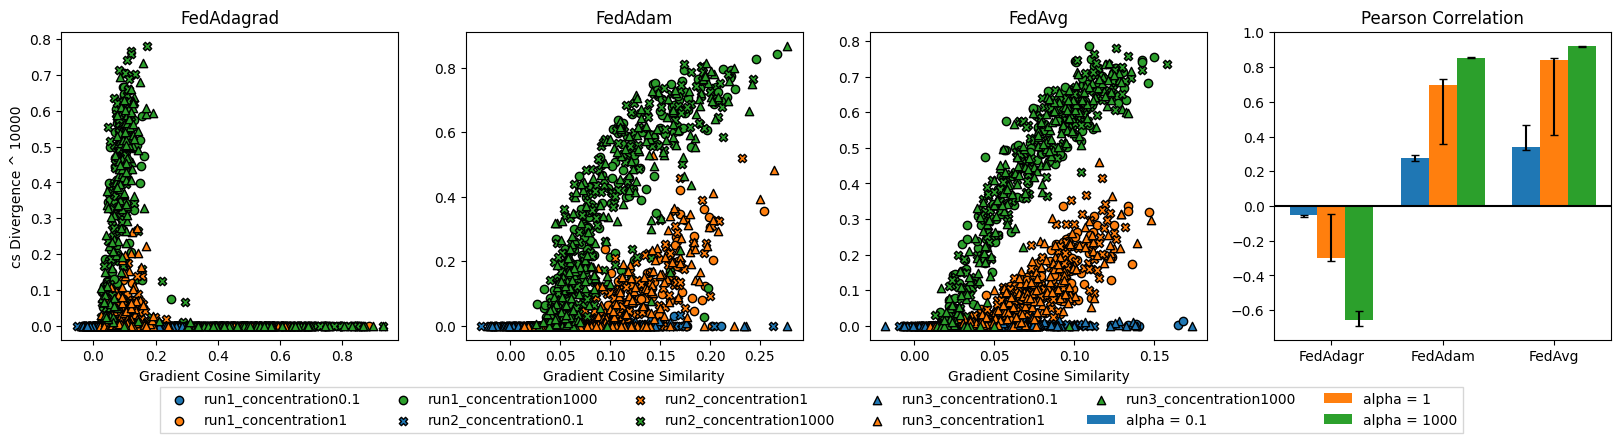

In [1358]:
from scipy.stats.stats import pearsonr

fig, axs = plt.subplots(1, 4, figsize=(20, 4))

axs[0].set_title("FedAdagrad")
axs[1].set_title("FedAdam")
axs[2].set_title("FedAvg")
axs[3].set_title("Pearson Correlation")

axs[0].scatter(
    np.array(ada_c01_run2_cs_gradient_sum),
    np.array(ada_c01_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    label="run1_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run2_cs_gradient_sum),
    np.array(ada_c1_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    label="run1_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run2_cs_gradient_sum),
    np.array(ada_c1000_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    label="run1_concentration1000",
)


axs[0].scatter(
    np.array(ada_c01_run1_cs_gradient_sum),
    np.array(ada_c01_run1_cs_activation_mean_sum) ** 10000,
    color="tab:blue",
    marker="X",
    edgecolor="black",
    label="run2_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run1_cs_gradient_sum),
    np.array(ada_c1_run1_cs_activation_mean_sum) ** 10000,
    color="tab:orange",
    marker="X",
    edgecolor="black",
    label="run2_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run1_cs_gradient_sum),
    np.array(ada_c1000_run1_cs_activation_mean_sum) ** 10000,
    color="tab:green",
    marker="X",
    edgecolor="black",
    label="run2_concentration1000",
)


axs[0].scatter(
    np.array(ada_c01_run3_cs_gradient_sum),
    np.array(ada_c01_run3_cs_activation_mean_sum) ** 10000,
    color="tab:blue",
    marker="^",
    edgecolor="black",
    label="run3_concentration0.1",
)
axs[0].scatter(
    np.array(ada_c1_run3_cs_gradient_sum),
    np.array(ada_c1_run3_cs_activation_mean_sum) ** 10000,
    color="tab:orange",
    marker="^",
    edgecolor="black",
    label="run3_concentration1",
)
axs[0].scatter(
    np.array(ada_c1000_run3_cs_gradient_sum),
    np.array(ada_c1000_run3_cs_activation_mean_sum) ** 10000,
    color="tab:green",
    marker="^",
    edgecolor="black",
    label="run3_concentration1000",
)


axs[1].scatter(
    np.array(adam_c01_run2_cs_gradient_sum),
    np.array(adam_c01_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
)
axs[1].scatter(
    np.array(adam_c1_run2_cs_gradient_sum),
    np.array(adam_c1_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
)
axs[1].scatter(
    np.array(adam_c1000_run2_cs_gradient_sum),
    np.array(adam_c1000_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
)

axs[1].scatter(
    np.array(adam_c01_run1_cs_gradient_sum),
    np.array(adam_c01_run1_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[1].scatter(
    np.array(adam_c1_run1_cs_gradient_sum),
    np.array(adam_c1_run1_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[1].scatter(
    np.array(adam_c1000_run1_cs_gradient_sum),
    np.array(adam_c1000_run1_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[1].scatter(
    np.array(adam_c01_run3_cs_gradient_sum),
    np.array(adam_c01_run3_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[1].scatter(
    np.array(adam_c1_run3_cs_gradient_sum),
    np.array(adam_c1_run3_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[1].scatter(
    np.array(adam_c1000_run3_cs_gradient_sum),
    np.array(adam_c1000_run3_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[2].scatter(
    np.array(avg_c01_run2_cs_gradient_sum),
    np.array(avg_c01_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
)
axs[2].scatter(
    np.array(avg_c1_run2_cs_gradient_sum),
    np.array(avg_c1_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
)
axs[2].scatter(
    np.array(avg_c1000_run2_cs_gradient_sum),
    np.array(avg_c1000_run2_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
)

axs[2].scatter(
    np.array(avg_c01_run1_cs_gradient_sum),
    np.array(avg_c01_run1_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:blue",
    marker="X",
)
axs[2].scatter(
    np.array(avg_c1_run1_cs_gradient_sum),
    np.array(avg_c1_run1_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:orange",
    marker="X",
)
axs[2].scatter(
    np.array(avg_c1000_run1_cs_gradient_sum),
    np.array(avg_c1000_run1_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:green",
    marker="X",
)

axs[2].scatter(
    np.array(avg_c01_run3_cs_gradient_sum),
    np.array(avg_c01_run3_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:blue",
    marker="^",
)
axs[2].scatter(
    np.array(avg_c1_run3_cs_gradient_sum),
    np.array(avg_c1_run3_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:orange",
    marker="^",
)
axs[2].scatter(
    np.array(avg_c1000_run3_cs_gradient_sum),
    np.array(avg_c1000_run3_cs_activation_mean_sum) ** 10000,
    edgecolor="black",
    color="tab:green",
    marker="^",
)


axs[0].set_ylabel("cs Divergence ^ 10000")
axs[0].set_xlabel("Gradient Cosine Similarity")
axs[1].set_xlabel("Gradient Cosine Similarity")
axs[2].set_xlabel("Gradient Cosine Similarity")

algorithms = ("FedAdagr", "FedAdam", "FedAvg")

ada_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c01_run1_cs_activation_mean_sum) ** 10000,
        np.array(ada_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c01_run2_cs_activation_mean_sum) ** 10000,
        np.array(ada_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c01_run3_cs_activation_mean_sum) ** 10000,
        np.array(ada_c01_run3_cs_gradient_sum),
    )[0],
])
ada_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c1_run1_cs_activation_mean_sum) ** 10000,
        np.array(ada_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1_run2_cs_activation_mean_sum) ** 10000,
        np.array(ada_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1_run3_cs_activation_mean_sum) ** 10000,
        np.array(ada_c01_run3_cs_gradient_sum),
    )[0],
])
ada_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(ada_c1000_run1_cs_activation_mean_sum) ** 10000,
        np.array(ada_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1000_run2_cs_activation_mean_sum) ** 10000,
        np.array(ada_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(ada_c1000_run3_cs_activation_mean_sum) ** 10000,
        np.array(ada_c1000_run3_cs_gradient_sum),
    )[0],
])

adam_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c01_run1_cs_activation_mean_sum) ** 10000,
        np.array(adam_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c01_run2_cs_activation_mean_sum) ** 10000,
        np.array(adam_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c01_run3_cs_activation_mean_sum) ** 10000,
        np.array(adam_c01_run3_cs_gradient_sum),
    )[0],
])
adam_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c1_run1_cs_activation_mean_sum) ** 10000,
        np.array(adam_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1_run2_cs_activation_mean_sum) ** 10000,
        np.array(adam_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1_run3_cs_activation_mean_sum) ** 10000,
        np.array(adam_c01_run3_cs_gradient_sum),
    )[0],
])
adam_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(adam_c1000_run1_cs_activation_mean_sum) ** 10000,
        np.array(adam_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1000_run2_cs_activation_mean_sum) ** 10000,
        np.array(adam_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(adam_c1000_run3_cs_activation_mean_sum) ** 10000,
        np.array(adam_c1000_run3_cs_gradient_sum),
    )[0],
])

avg_c01_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c01_run1_cs_activation_mean_sum) ** 10000,
        np.array(avg_c01_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c01_run2_cs_activation_mean_sum) ** 10000,
        np.array(avg_c01_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c01_run3_cs_activation_mean_sum) ** 10000,
        np.array(avg_c01_run3_cs_gradient_sum),
    )[0],
])
avg_c1_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c1_run1_cs_activation_mean_sum) ** 10000,
        np.array(avg_c1_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1_run2_cs_activation_mean_sum) ** 10000,
        np.array(avg_c1_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1_run3_cs_activation_mean_sum) ** 10000,
        np.array(avg_c01_run3_cs_gradient_sum),
    )[0],
])
avg_c1000_pearson_stacked = np.array([
    pearsonr(
        np.array(avg_c1000_run1_cs_activation_mean_sum) ** 10000,
        np.array(avg_c1000_run1_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1000_run2_cs_activation_mean_sum) ** 10000,
        np.array(avg_c1000_run2_cs_gradient_sum),
    )[0],
    pearsonr(
        np.array(avg_c1000_run3_cs_activation_mean_sum) ** 10000,
        np.array(avg_c1000_run3_cs_gradient_sum),
    )[0],
])

corr = {
    "alpha = 0.1": np.array([
        [
            np.median(ada_c01_pearson_stacked),
            np.median(adam_c01_pearson_stacked),
            np.median(avg_c01_pearson_stacked),
        ],
        [
            ada_c01_pearson_stacked.min(),
            adam_c01_pearson_stacked.min(),
            avg_c01_pearson_stacked.min(),
        ],
        [
            ada_c01_pearson_stacked.max(),
            adam_c01_pearson_stacked.max(),
            avg_c01_pearson_stacked.max(),
        ],
    ]),
    "alpha = 1": np.array([
        [
            np.median(ada_c1_pearson_stacked),
            np.median(adam_c1_pearson_stacked),
            np.median(avg_c1_pearson_stacked),
        ],
        [
            ada_c1_pearson_stacked.min(),
            adam_c1_pearson_stacked.min(),
            avg_c1_pearson_stacked.min(),
        ],
        [
            ada_c1_pearson_stacked.max(),
            adam_c1_pearson_stacked.max(),
            avg_c1_pearson_stacked.max(),
        ],
    ]),
    "alpha = 1000": np.array([
        [
            np.median(ada_c1000_pearson_stacked),
            np.median(adam_c1000_pearson_stacked),
            np.median(avg_c1000_pearson_stacked),
        ],
        [
            ada_c1000_pearson_stacked.min(),
            adam_c1000_pearson_stacked.min(),
            avg_c1000_pearson_stacked.min(),
        ],
        [
            ada_c1000_pearson_stacked.max(),
            adam_c1000_pearson_stacked.max(),
            avg_c1000_pearson_stacked.max(),
        ],
    ]),
}

x = np.arange(len(algorithms))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for attribute, measurement in corr.items():
    offset = width * multiplier
    rects = axs[3].bar(
        x + offset,
        measurement[0],
        yerr=[measurement[0] - measurement[1], measurement[2] - measurement[0]],
        capsize=3,
        width=width,
        label=attribute,
    )
    # axs[1].bar_label(rects, padding=3, fmt='{:.2}')
    multiplier += 1

# custom_ylim = (9, 10.2)
# plt.setp([axs], ylim=custom_ylim)
axs[3].set_xticks(x + width, algorithms)
axs[3].axhline(y=0, color="black", linestyle="-")

fig.legend(
    loc="upper center", bbox_to_anchor=(0.5, 0.01), fancybox=False, shadow=False, ncol=6
)
plt.show()

SyntaxError: invalid syntax (2605957932.py, line 105)

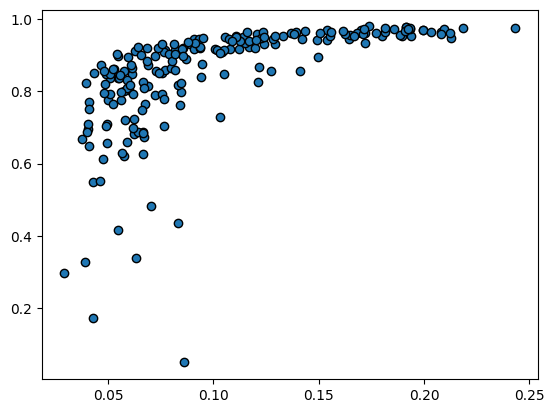

In [1356]:
plt.scatter(
    np.array(adam_c1000_run1_cs_gradient_sum),
    np.array(adam_c1000_run1_cs_activation_mean_sum) ** 1000,
    edgecolor="black",
    label="run1_concentration1000",
)